#  LDSC Results on Maximum CPP annotation (CpGs with at least one mQTL)

In [1]:
library(here)
library(data.table)
library(tidyverse)
library(parallel)
library(glue)
library(ggsci)
library(repr)

here() starts at /scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




## Processing LDSC output

In [39]:
GWAS_key <- c(
    "adhd_jul2017" = "ADHD",
    "pgc_adhd_males" = "ADHD Males",
    "pgc_adhd_females" = "ADHD Females",
    "pts_all_freeze2_overall.results" = "PTSD",
    "pts_all_freeze2_males.results" = "PTSD Males",
    "pts_all_freeze2_females.results" = "PTSD Females",
    "iPSYCH-PGC_ASD_Nov2017" = "ASD",
    "NEW_META_PGC_iPSYCH_ASD_males" = "ASD Males",
    "NEW_META_PGC_iPSYCH_ASD_females" = "ASD Females",
    "PGC_UKB_depression_genome-wide.txt" = "MDD",
    "meta_STDERR_mdd_eur_auto_M1_08_gcOFF_pgc.txt" = "MDD Males",
    "meta_STDERR_mdd_eur_auto_F1_08_gcOFF_pgc.txt" = "MDD Females",
    "meta_STDERR_rmdd_eur_auto_M1_08_gcOFF_pgc.txt.gz" = "RMDD Males",
    "meta_STDERR_rmdd_eur_auto_F1_08_gcOFF_pgc.txt.gz" = "RMDD Females",
    "ocd_aug2017" = "OCD",
    "OCD_meta_male_auto_072416.gz" = "OCD Males",
    "OCD_meta_female_auto_072416.gz" = "OCD Females",
    "anxiety.meta.full.cc.tbl" = "ANX",
    "ukbb_anxiety.gwas.imputed_v3.both_sexes.tsv.gz.fixed" = "UKBB-ANX",
    "ukbb_anxiety.gwas.imputed_v3.male.tsv.gz.fixed" = "UKBB-ANX Males",
    "ukbb_anxiety.gwas.imputed_v3.female.tsv.gz.fixed" = "UKBB-ANX Females",
    "anxiety.meta.full.fs.tbl" = "ANXFS",
    "pgc_bip_2018" = "BIP",
    "meta_STDERR_bip_eur_auto_M1_08_gcOFF_pgc.txt.gz" = "BIP Males",
    "meta_STDERR_bip_eur_auto_F1_08_gcOFF_pgc.txt.gz" = "BIP Females",
    "PGC3_SCZ_wave3_public.v2.tsv" = "SCZ",
    "meta_STDERR_scz_eur_auto_M1_08_gcOFF_pgc.txt.gz" = "SCZ Males",
    "meta_STDERR_scz_eur_auto_F1_08_gcOFF_pgc.txt.gz" = "SCZ Females",
    "pgcAN2.2019-07.vcf.tsv" = "AN",
    "TS_Oct2018" = "TS",
    "pgc.cross.full.2013-03.txt" = "Cross Disorder",
    "AUDIT_UKB_2018_AJP.txt" = "Alcohol (AUDIT)",
    "pgc_alcdep.eur_unrelated.aug2018_release.txt" = "ALC",
    "Cannabis_ICC_23andmetop_UKB_het.txt" = "CUD",
    "tag.cpd.tbl" = "Cigarettes Per Day",
#     "age_asthma_irnt.gwas.imputed_v3.both_sexes.tsv" = "ASTHMA Age(norm)",
#     "age_asthma_irnt.gwas.imputed_v3.female.tsv" = "ASTHMA Age(norm) Females",
#     "age_asthma_irnt.gwas.imputed_v3.male.tsv"= "ASTHMA Age(norm) Males",
#     "age_asthma_raw.gwas.imputed_v3.both_sexes.tsv" = "ASTHMA Age(raw)",
#     "age_asthma_raw.gwas.imputed_v3.female.tsv" = "ASTHMA Age(raw) Females",
#     "age_asthma_raw.gwas.imputed_v3.male.tsv" = "ASTHMA Age(raw) Males",
#     "age_diabetes_irnt.gwas.imputed_v3.both_sexes.tsv" = "DIABETES Age(norm)",
#     "age_diabetes_irnt.gwas.imputed_v3.female.tsv"= "DIABETES Age(norm) Females",
#     "age_diabetes_irnt.gwas.imputed_v3.male.tsv"= "DIABETES Age(norm) Males",
#     "age_diabetes_raw.gwas.imputed_v3.both_sexes.tsv"= "DIABETES Age(raw)",
#     "age_diabetes_raw.gwas.imputed_v3.female.tsv"= "DIABETES Age(raw) Females",
#     "age_diabetes_raw.gwas.imputed_v3.male.tsv"= "DIABETES Age(raw) Males",
    "T1D.UCSC_META" = "Type 1 Diabetes",
#     "age_hay_fever_irnt.gwas.imputed_v3.both_sexes.tsv"= "HAYFEVER Age(norm)",
#     "age_hay_fever_irnt.gwas.imputed_v3.female.tsv"= "HAYFEVER Age(norm) Females",
#     "age_hay_fever_irnt.gwas.imputed_v3.male.tsv"= "HAYFEVER Age(norm) Males",
#     "age_hay_fever_raw.gwas.imputed_v3.both_sexes.tsv"= "HAYFEVER Age(raw)",
#     "age_hay_fever_raw.gwas.imputed_v3.female.tsv"= "HAYFEVER Age(raw) Females",
#     "age_hay_fever_raw.gwas.imputed_v3.male.tsv"= "HAYFEVER Age(raw) Males",
    "CHILD_ONSET_ASTHMA.20180501.allchr.assoc.GC" = "Child Onset Asthma",
#     "hayfever_eczema_irnt.gwas.imputed_v3.both_sexes.tsv" = "Hayfever or Eczema Age(irnt)",
#     "hayfever_eczema_irnt.gwas.imputed_v3.female.tsv" = "Hayfever or Eczema Age(irnt) Females",
#     "hayfever_eczema_irnt.gwas.imputed_v3.male.tsv" = "Hayfever or Eczema Age(irnt) Males",
    "hayfever_eczema_raw.gwas.imputed_v3.both_sexes.tsv" = "Hayfever or Eczema Age(raw)",
    "hayfever_eczema_raw.gwas.imputed_v3.female.tsv" = "Hayfever or Eczema Age(raw) Females",
    "hayfever_eczema_raw.gwas.imputed_v3.male.tsv" = "Hayfever or Eczema Age(raw) Males",
    "Fetal_BW_European_meta.NG2019.txt" = "Birth Weight",
    "EGG-GWAS-BL.txt" = "Birth Length",
    "EGG_BMI_HapMap_DISCOVERY.txt" = "Child BMI",
    "EGG_HC_DISCOVERY.v2.txt" = "Head Circumference",
    "EGG_Obesity_Meta_Analysis_1.txt" = "Child Obesity",
    "EGG_TANNER_females.v2.txt" = "TANNER Stage Females",
    "EGG_TANNER_males_and_females_combined.v2.txt" = "TANNER Stage",
    "EGG_TANNER_males.v2.txt" = "TANNER Stage Males",
    "EGG-TotalGWG-Offspring.txt" = "Gestational Weight Gain",
    "Pubertal_growth_10F_12M_combined.txt" = "Pubertal Growth Start",
    "Pubertal_growth_10F.txt" = "Pubertal Growth Start Females",
    "Pubertal_growth_12M.txt" = "Pubertal Growth Start Males",
    "Pubertal_growth_PGF_PGM_combined.txt" = "Total Pubertal Growth",
    "Pubertal_growth_PGF.txt" = "Total Pubertal Growth Females",
    "Pubertal_growth_PGM.txt" = "Total Pubertal Growth Males",
    "Pubertal_growth_PTF_PTM_combined.txt" = "Late Pubertal Growth",
    "Pubertal_growth_PTF.txt" = "Late Pubertal Growth Females",
    "Pubertal_growth_PTM.txt" = "Late Pubertal Growth Males",
    "ukbb_preeclampsia.gwas.imputed_v3.female.tsv"= "Maternal Pre-Eclampsia (UKBB)",
    "interpreggen.fetal.pe.meta.release.31jan2017"= "Fetal Pre-Eclampsia",
    "mat_all_chrALL_STERR_EU"="Maternal Pre-Eclampsia"
)

In [40]:
gwas_sample_sizes <- function(f){
    N <- fread(f,nrows=1)$N
    GWAS <- str_match(f,".*/(.*).sumstats.gz")[2]
    return(data.table(GWAS=GWAS,N=N))
}

part_heritability_results_independent <- function(path){
    part_heritability <- rbindlist(mclapply(
          dir(
            path,
            pattern = "(marginal_meta|male_specific_meta|female_specific_meta|male_meta|female_meta)_(maxCPPFDR|Cred95FDR|Cred95|maxCPP)_.*.results$",
            full.names = TRUE
          ),
          function(f) {
            labels <- str_match(f, ".*/(marginal_meta|male_specific_meta|female_specific_meta|male_meta|female_meta)_(maxCPPFDR|Cred95FDR|Cred95|maxCPP)_(.*).results$")[-c(1)]
            if (any(is.na(labels))) {
              return(data.table())
            } else {
              dt <- fread(f)[1, !"Category"]
              dt[, 
                `:=`(
                  Coefficient_p=pnorm(abs(`Coefficient_z-score`),lower.tail=F)*2,
                  mQTL_group = labels[1],
                  annotation = labels[2],
                  GWAS = labels[3])]
              return(dt)
            }
          },
        mc.cores=4
    ))
    heritability <- rbindlist(lapply(
      dir(
        path,
        pattern = ".*.log$",
        full.names = TRUE,
        
      ),
      function(f) {
        labels <- str_match(f, ".*/(marginal_meta|male_specific_meta|female_specific_meta|male_meta|female_meta)_(maxCPPFDR|Cred95FDR|Cred95|maxCPP)_(.*).log")[-c(1)]
        if (any(is.na(labels))) {
          return(data.table())
        } else if (nrow(part_heritability[GWAS == labels[3] & annotation == labels[2]]) == 0 ){
          return(data.table())
        }
        else {
          dat <- readLines(f)
          dt <- data.table(
            h2 = as.numeric(str_extract_all(dat[grepl("Total Observed",dat)],"-*\\d+.\\d+")[[1]][1]),
            h2_std_error = as.numeric(str_extract_all(dat[grepl("Total Observed",dat)],"\\d+.\\d+")[[1]][2]),
            total_SNP = as.numeric(str_match(dat[grepl("SNPs remain)", dat)],"\\((\\d+)")[1,2]),
            annotation = labels[2],
            GWAS = labels[3]
          )
          return(dt)
        }
      }
    ))
    heritability <- heritability[which(!duplicated(GWAS))]
    result <- merge(part_heritability,heritability[,-c("annotation")],by=c("GWAS"))
    return(result)
}
annotation_SD <- function(path,file_pattern){
    annots <- rbindlist(mclapply(dir(path,full.names=TRUE,pattern=file_pattern),function(f) fread(f),mc.cores=22))
    return(apply(annots[,-c(1,2,3,4)],2,sd))    
}
pgc_part_heritability_independent_df <- part_heritability_results_independent("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_pgc_original_baseline/")
neonatal_part_heritability_independent_df <- part_heritability_results_independent("/scratch/st-dennisjk-1/wcasazza/delahaye_QC/ldsc_meta_EUR_neonatal_original_baseline/")
all_heritability <- rbind(pgc_part_heritability_independent_df,neonatal_part_heritability_independent_df)
all_heritability <- all_heritability %>% mutate(
        significant_coef = Coefficient_p < 0.05, 
        significant_enrich = Enrichment_p < 0.05,
        GWAS = recode(GWAS, !!!GWAS_key),
        Category = recode(mQTL_group,marginal_meta="Cross-sex", male_specific_meta = "Male-specific", female_specific_meta= "Female-specific",male_meta= "Male-stratified", female_meta="Female-stratified")
    ) %>%
    mutate(GWAS = factor(GWAS,levels=GWAS_key)) %>% na.omit()

### Filtering GWAS by $h^2_z$

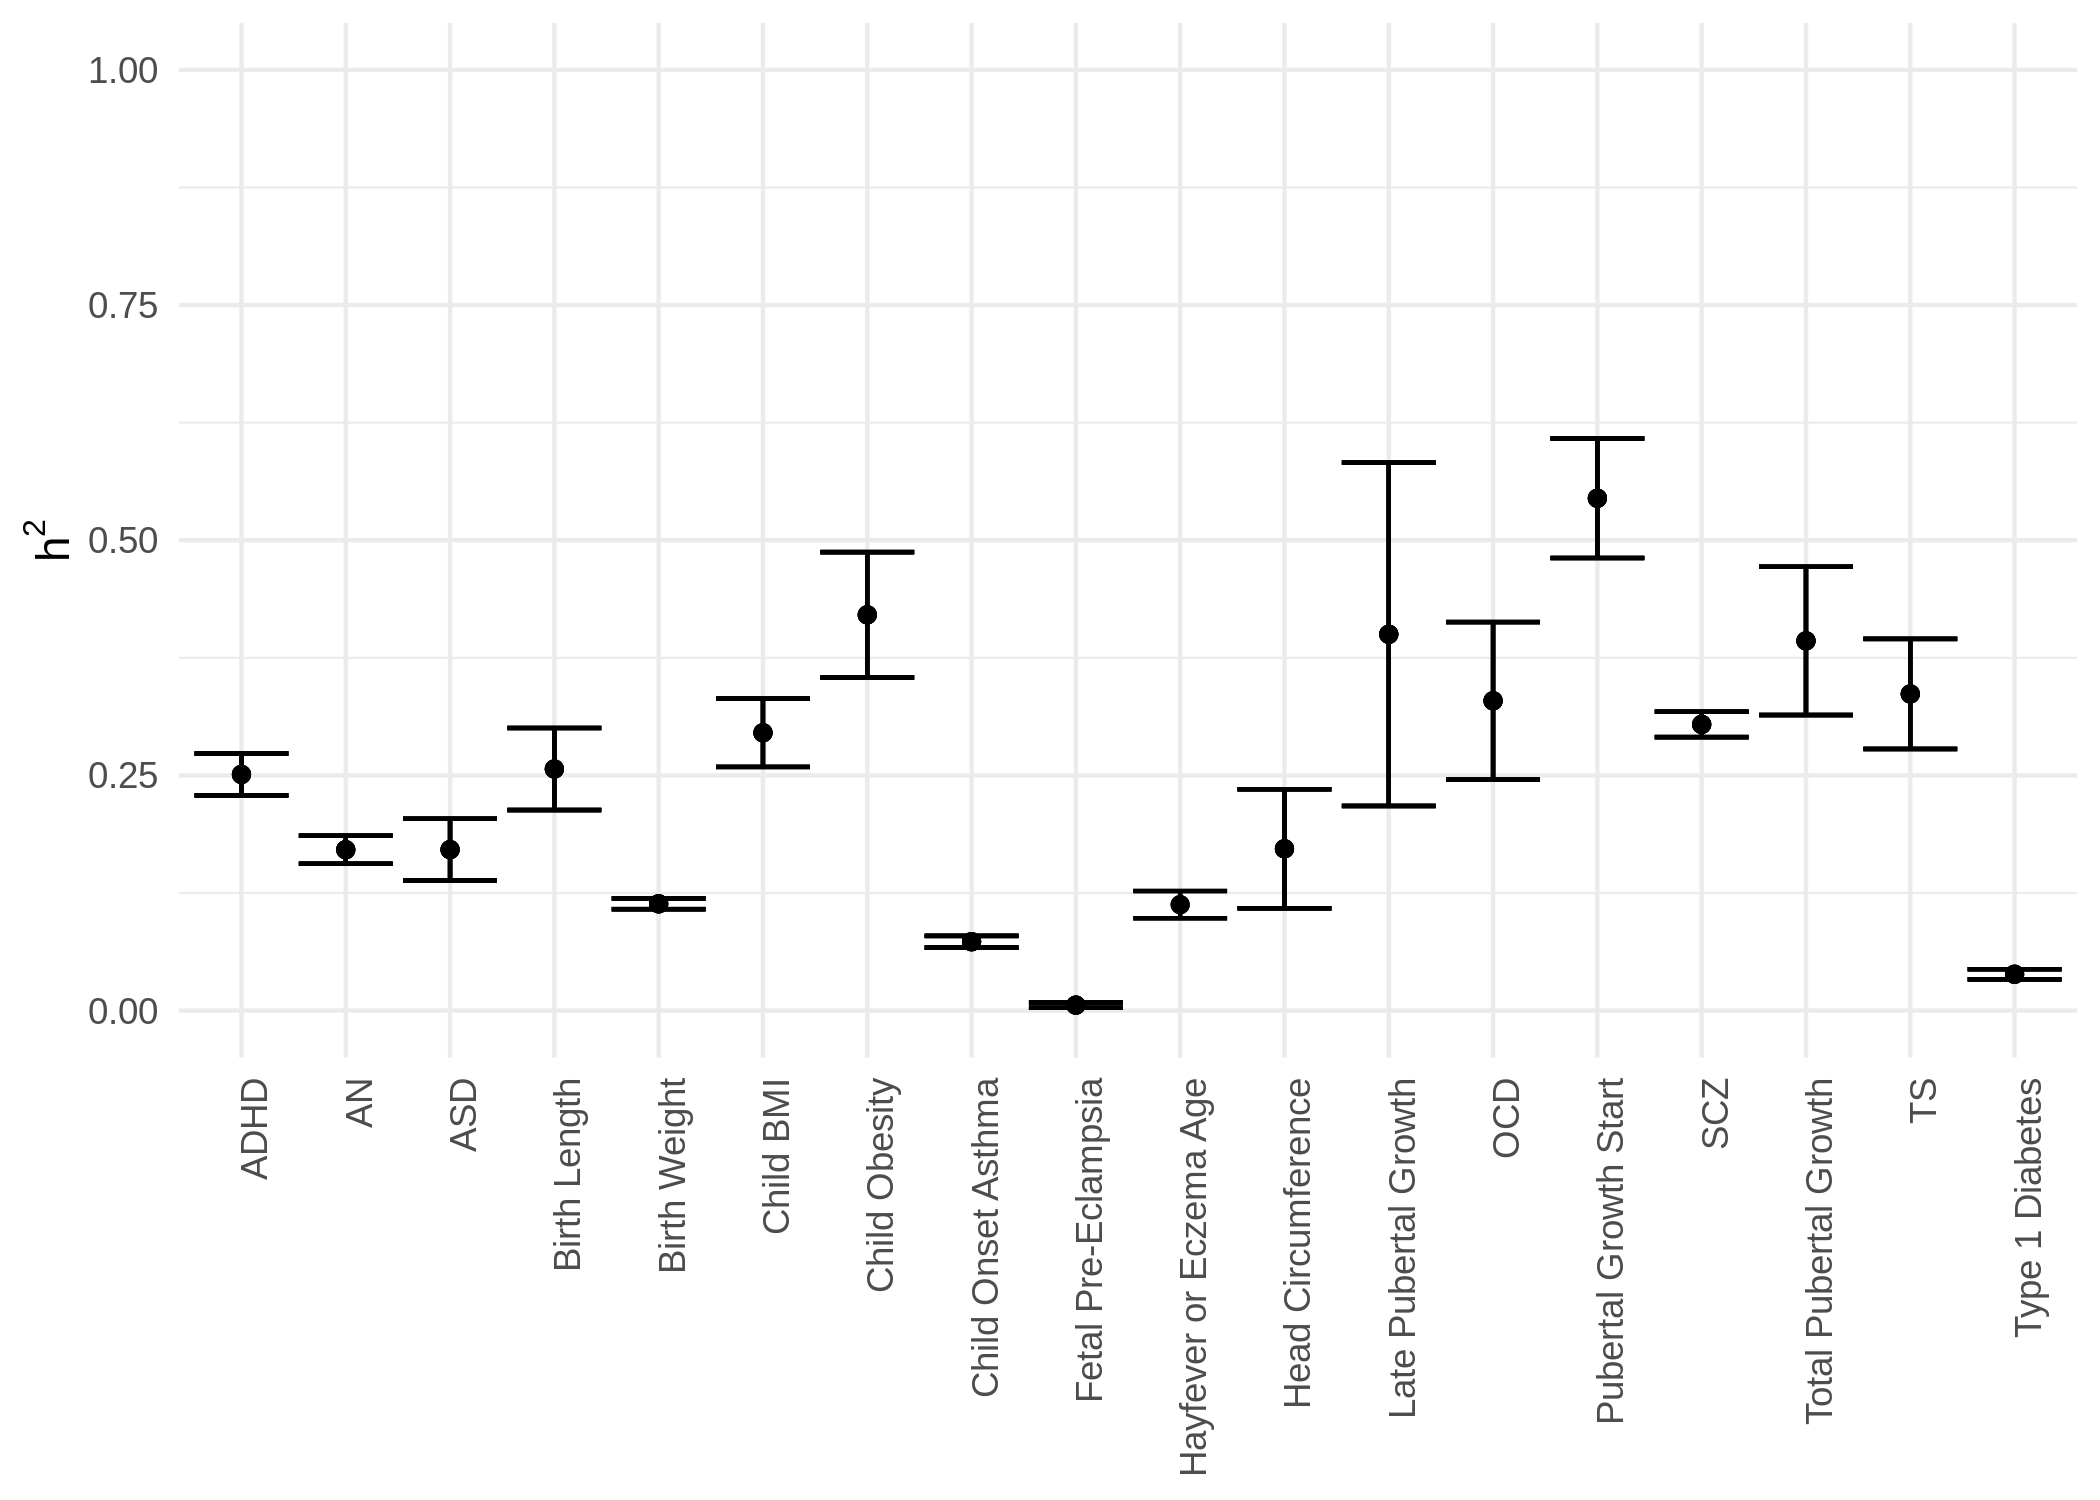

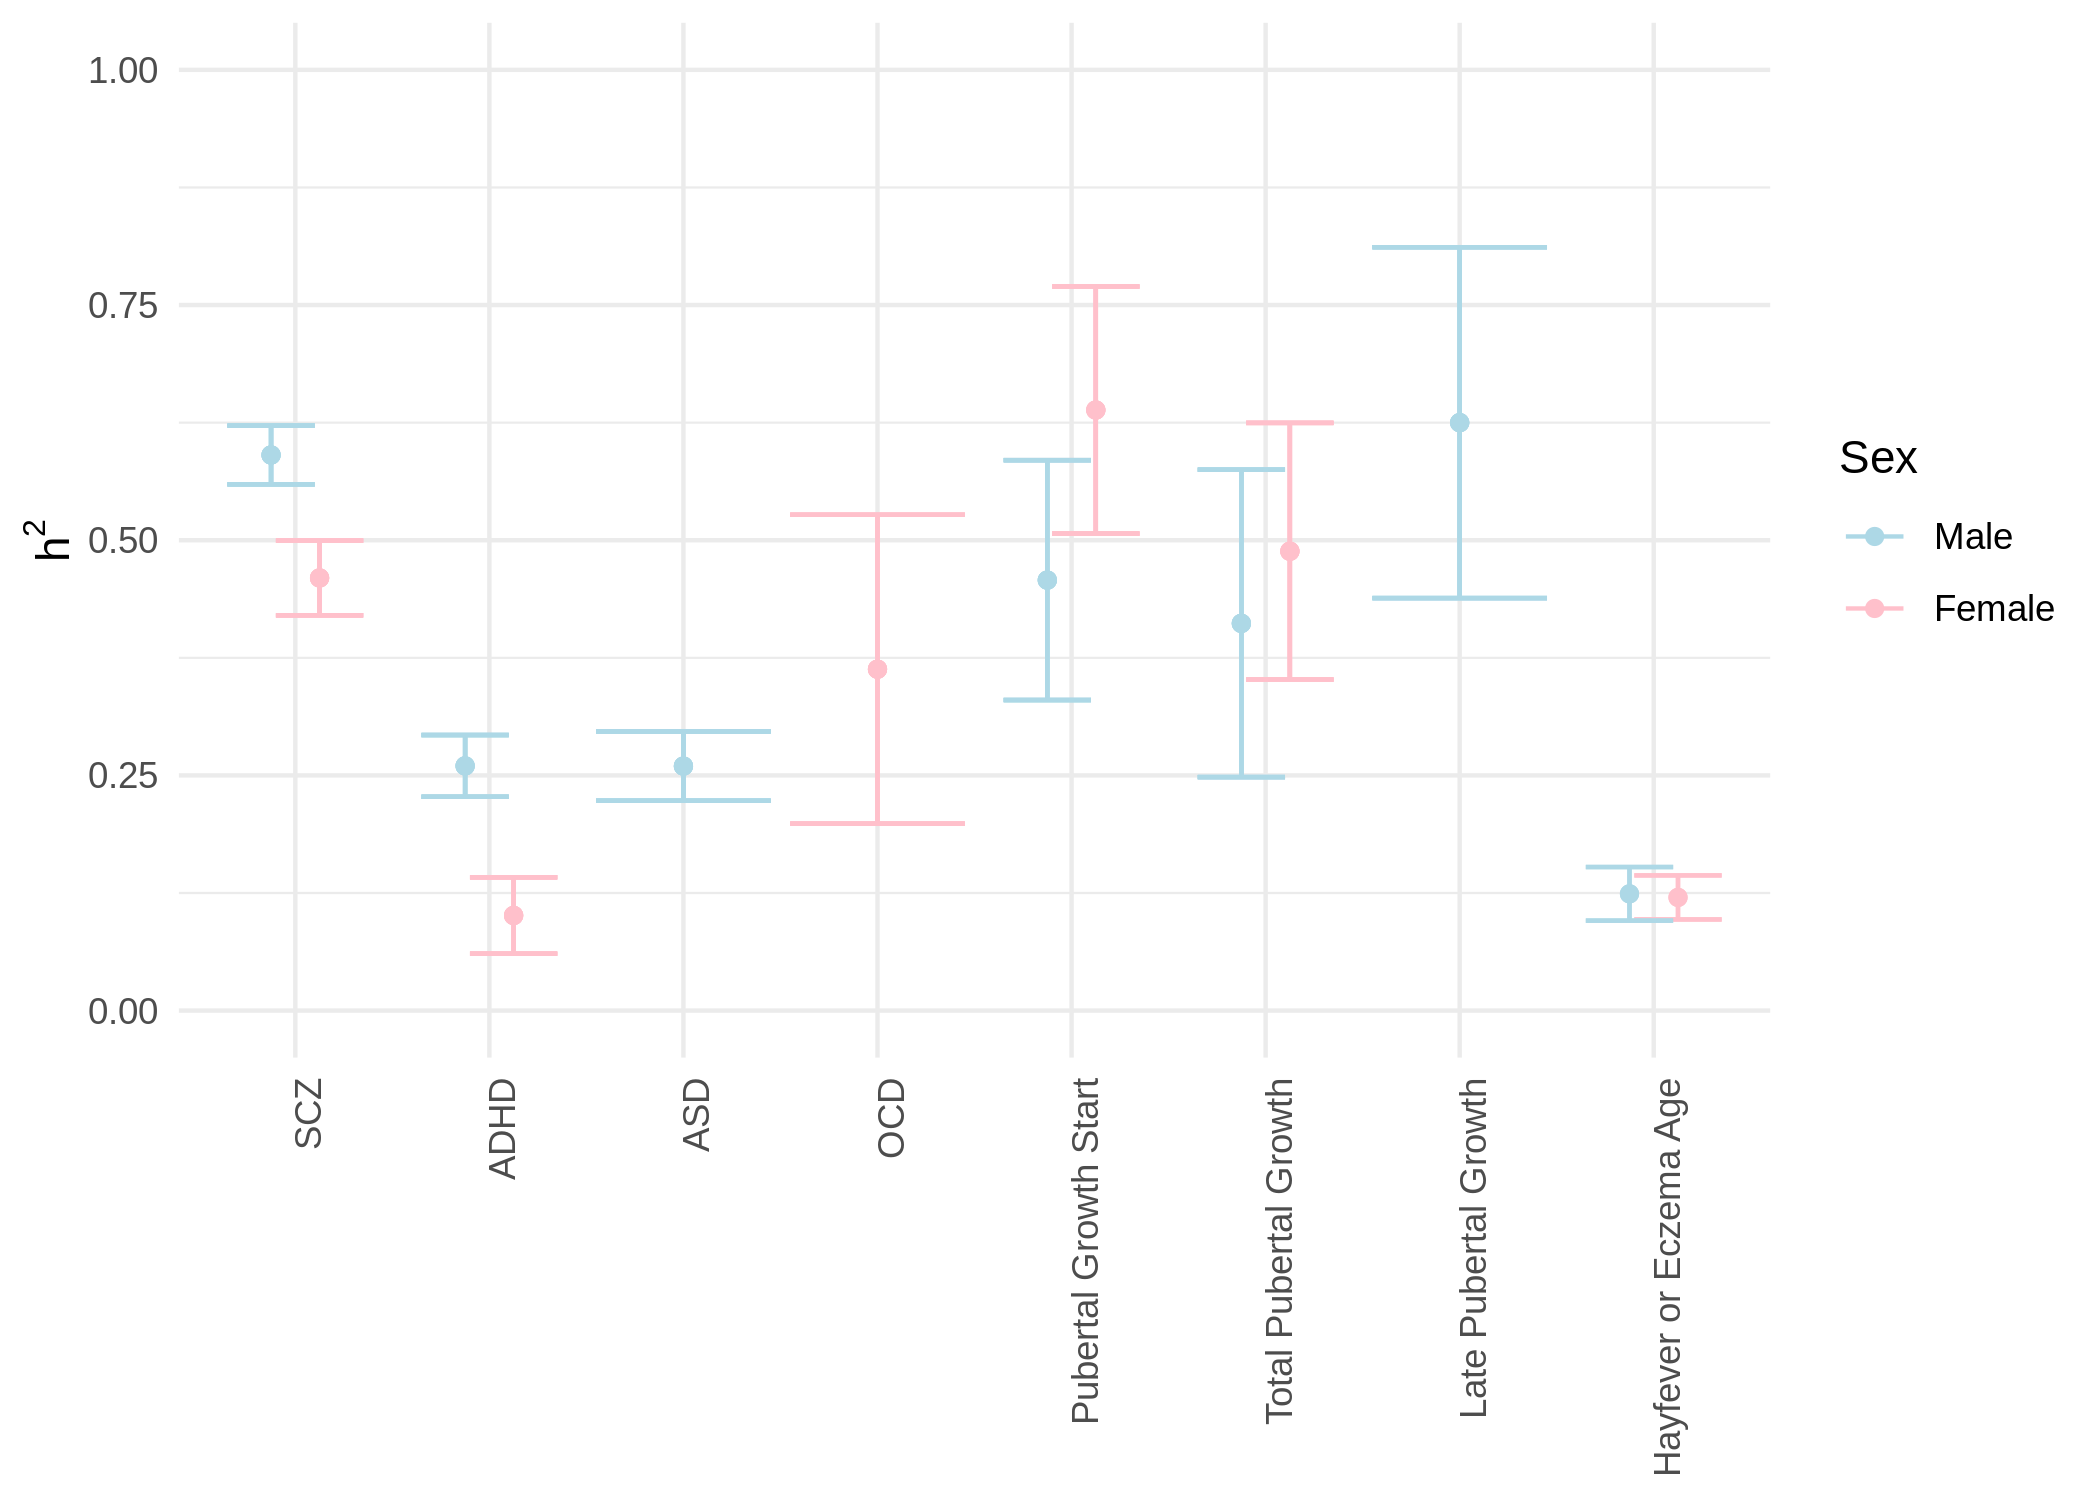

In [42]:
options(width= 10, repr.plot.height= 5, repr.plot.res = 300)
trait_metadata <- fread(here("data","misc_sex_biased_mqtl_tables - GWAS-info.csv"))
selected_GWAS <- trait_metadata[`Median age of onset < 25?` & h2_z  > abs(qnorm(0.05))]$GWAS
h2_plot <- all_heritability[!grepl("Males|Females",GWAS) & GWAS %in% selected_GWAS & Category=="Cross-sex",.(h2=h2,h2_se=h2_std_error,GWAS=gsub("\\(raw\\)","",GWAS))]
ggplot(h2_plot,aes(GWAS,h2,ymin=h2-h2_se,ymax=h2+h2_se)) +
    geom_point()+
    geom_errorbar() + 
    theme_minimal() + 
    labs(y = bquote(h^2),x=NULL)+
    coord_cartesian(ylim= c(0,1)) +
    theme(axis.text.x=element_text(hjust=1,vjust=1,angle=90))



ggplot(all_heritability[
        grepl("Males|Females",GWAS) & GWAS %in% selected_GWAS & Category=="Cross-sex",
        .(h2=h2,h2_se=h2_std_error, GWAS=gsub(" Males| Females","",GWAS),Sex = factor(gsub(".* (Male|Female)s", "\\1",GWAS),levels=c("Male","Female")))
    ] %>% mutate(GWAS = gsub("\\(raw\\)","",GWAS)) %>%mutate(GWAS= factor(GWAS,levels= unique(h2_plot$GWAS))),
    aes(GWAS,h2,ymin=h2-h2_se,ymax=h2+h2_se,color=Sex)) +
        geom_point(position=position_dodge(width=0.5))+
        geom_errorbar(position=position_dodge(width=0.5))+
        scale_color_manual(values=c("lightblue","pink"))+
        coord_cartesian(ylim= c(0,1)) +
        theme_minimal() + 
        labs(y = bquote(h^2),x=NULL)+
        theme(axis.text.x=element_text(hjust=1,vjust=1,angle=90))

### Computing $\tau^*$

In [43]:
if(!file.exists(here("data","maxCPP_Cred95_sd_annot.txt.gz"))){
    all_sd_annot <- list()
    i <- 1
    for(annot in c("maxCPPFDR","Cred95FDR","maxCPP","Cred95")){
        for(qtl_set in c("male_specific_meta","female_specific_meta","marginal_meta","male_meta", "female_meta")){
                annotations <- annotation_SD("/scratch/st-dennisjk-1/wcasazza/1000G_phase3_ldsc/single_delahaye_annotations/",glue("{qtl_set}_maxCPP.*.annot.gz"))
                annotations <- data.table(annot_sd=annotations)
                annotations$annotation <- annot
                annotations$Category <- recode(qtl_set,male_specific_meta= "Male-specific", female_specific_meta = "Female-specific", marginal_meta="Cross-sex", male_meta= "Male-stratified", female_meta="Female-stratified")
                all_sd_annot[[i]] <- annotations
                i <- i+1
        }
    }
    all_sd_annot <- rbindlist(all_sd_annot)
    fwrite(all_sd_annot,here("data","maxCPP_Cred95_sd_annot.txt.gz"),row.names=F,sep="\t",quote=FALSE)
}else{
    all_sd_annot <- fread(here("data","maxCPP_Cred95_sd_annot.txt.gz"))
    unique(all_sd_annot$Category)
}

all_heritability <- merge(all_heritability,all_sd_annot,by=c("annotation","Category"))
all_heritability[,`:=`(tau=(Coefficient * annot_sd)/(h2/total_SNP),tau_std_error = (Coefficient_std_error * annot_sd)/(h2/total_SNP))]
all_heritability[,`:=`(tau_p= 2 * pnorm(-abs(tau/tau_std_error)))]
head(all_heritability[grepl("Eczema",GWAS)])

[1] "Male-specific"    
[2] "Female-specific"  
[3] "Cross-sex"        
[4] "Male-stratified"  
[5] "Female-stratified"

annotation,Category,GWAS,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,⋯,mQTL_group,h2,h2_std_error,total_SNP,significant_coef,significant_enrich,annot_sd,tau,tau_std_error,tau_p
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
Cred95FDR,Cross-sex,Hayfever or Eczema Age(raw),0.4661339,0.55435863,0.04993650,1.1892692,0.1071291,0.07528377,-2.290934e-09,⋯,marginal_meta,0.1126,0.0145,1161669,FALSE,FALSE,0.08441333,-0.0019951138,0.003790736,0.5986708
Cred95FDR,Cross-sex,Hayfever or Eczema Age(raw) Females,0.4661339,0.55139447,0.06410470,1.1829102,0.1375242,0.18524356,-4.000580e-09,⋯,marginal_meta,0.1203,0.0234,1161667,FALSE,FALSE,0.08441333,-0.0032609941,0.005054203,0.5187947
Cred95FDR,Cross-sex,Hayfever or Eczema Age(raw) Males,0.4661339,0.57513664,0.08147745,1.2338444,0.1747941,0.16681176,-5.424299e-10,⋯,marginal_meta,0.1241,0.0285,1161669,FALSE,FALSE,0.08441333,-0.0004286129,0.006116543,0.9441345
Cred95FDR,Female-specific,Hayfever or Eczema Age(raw),0.1058787,0.15931540,0.04020452,1.5046968,0.3797223,0.18906759,4.041579e-10,⋯,female_specific_meta,0.1126,0.0145,1161669,FALSE,FALSE,0.02582878,0.0001076959,0.002299238,0.9626409
Cred95FDR,Female-specific,Hayfever or Eczema Age(raw) Females,0.1058787,0.21404260,0.06592459,2.0215825,0.6226424,0.09829862,1.082435e-08,⋯,female_specific_meta,0.1203,0.0234,1161667,FALSE,FALSE,0.02582878,0.0026997388,0.003788897,0.4761307
Cred95FDR,Female-specific,Hayfever or Eczema Age(raw) Males,0.1058787,0.09775296,0.06286000,0.9232539,0.5936981,0.89319761,-1.535451e-08,⋯,female_specific_meta,0.1241,0.0285,1161669,FALSE,FALSE,0.02582878,-0.0037123637,0.003540797,0.2944293


### Separating into cleaned tables for paper

In [44]:
library(glue)
for(cat in unique(all_heritability$Category)){
    for(annot in c("Cred95","maxCPP","Cred95FDR","maxCPPFDR")){
        dt <- all_heritability %>% filter(Category == cat,annotation == annot) %>%
            mutate(h2_z = h2 / h2_std_error,tau_p=2*pnorm(-abs(tau / tau_std_error))) %>%
            filter(GWAS %in% selected_GWAS) %>% 
            select(-annotation,-Category,-h2_std_error,-total_SNP,-annot_sd,-mQTL_group,-contains("significant")) %>%
            arrange(Enrichment_p)
        fwrite(x=dt,file=here("data",glue("{gsub(' ','-',cat)}-{annot}-ldsc-table.csv")),row.names=F,quote=F,sep=',')
    }
}

In [45]:
head(dt)

GWAS,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score,Coefficient_p,h2,tau,tau_std_error,tau_p,h2_z
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Birth Weight,0.02286776,0.14225449,0.02931176,6.220744,1.2817942,5.181272e-05,1.595888e-07,4.838090e-08,3.298592,0.0009717119,0.1135,0.11764872,0.03566635,0.0009717119,19.912281
Pubertal Growth Start,0.02286776,0.13448304,0.04486072,5.880901,1.9617451,1.158987e-02,7.512501e-07,3.652277e-07,2.056936,0.0396923906,0.5446,0.09885167,0.04805773,0.0396923906,8.576378
SCZ Males,0.02286776,0.06707681,0.01990444,2.933248,0.8704147,2.841419e-02,2.868528e-07,1.854183e-07,1.547057,0.1218493895,0.5906,0.03215698,0.02078590,0.1218493895,18.929487
SCZ,0.02286776,0.05688400,0.01735221,2.487520,0.7588066,5.061871e-02,9.012052e-08,8.002166e-08,1.126202,0.2600801928,0.3042,0.02318152,0.02058381,0.2600801928,22.533333
Child Onset Asthma,0.02286776,0.10746799,0.04340799,4.699541,1.8982180,5.470860e-02,5.961691e-08,4.690145e-08,1.271110,0.2036894374,0.0732,0.06746998,0.05307956,0.2036894374,11.806452
Pubertal Growth Start Females,0.02286776,0.13213705,0.05983200,5.778312,2.6164346,5.563087e-02,8.595655e-07,5.476341e-07,1.569598,0.1165086650,0.6384,0.09941512,0.06333795,0.1165086650,4.862148


## Plotting out Enrichment

###  Maximum CPP Option

Warning message:
“Removed
15 rows
containing
missing
values
(geom_text).”
Warning message:
“Removed
15 rows
containing
missing
values
(geom_col).”


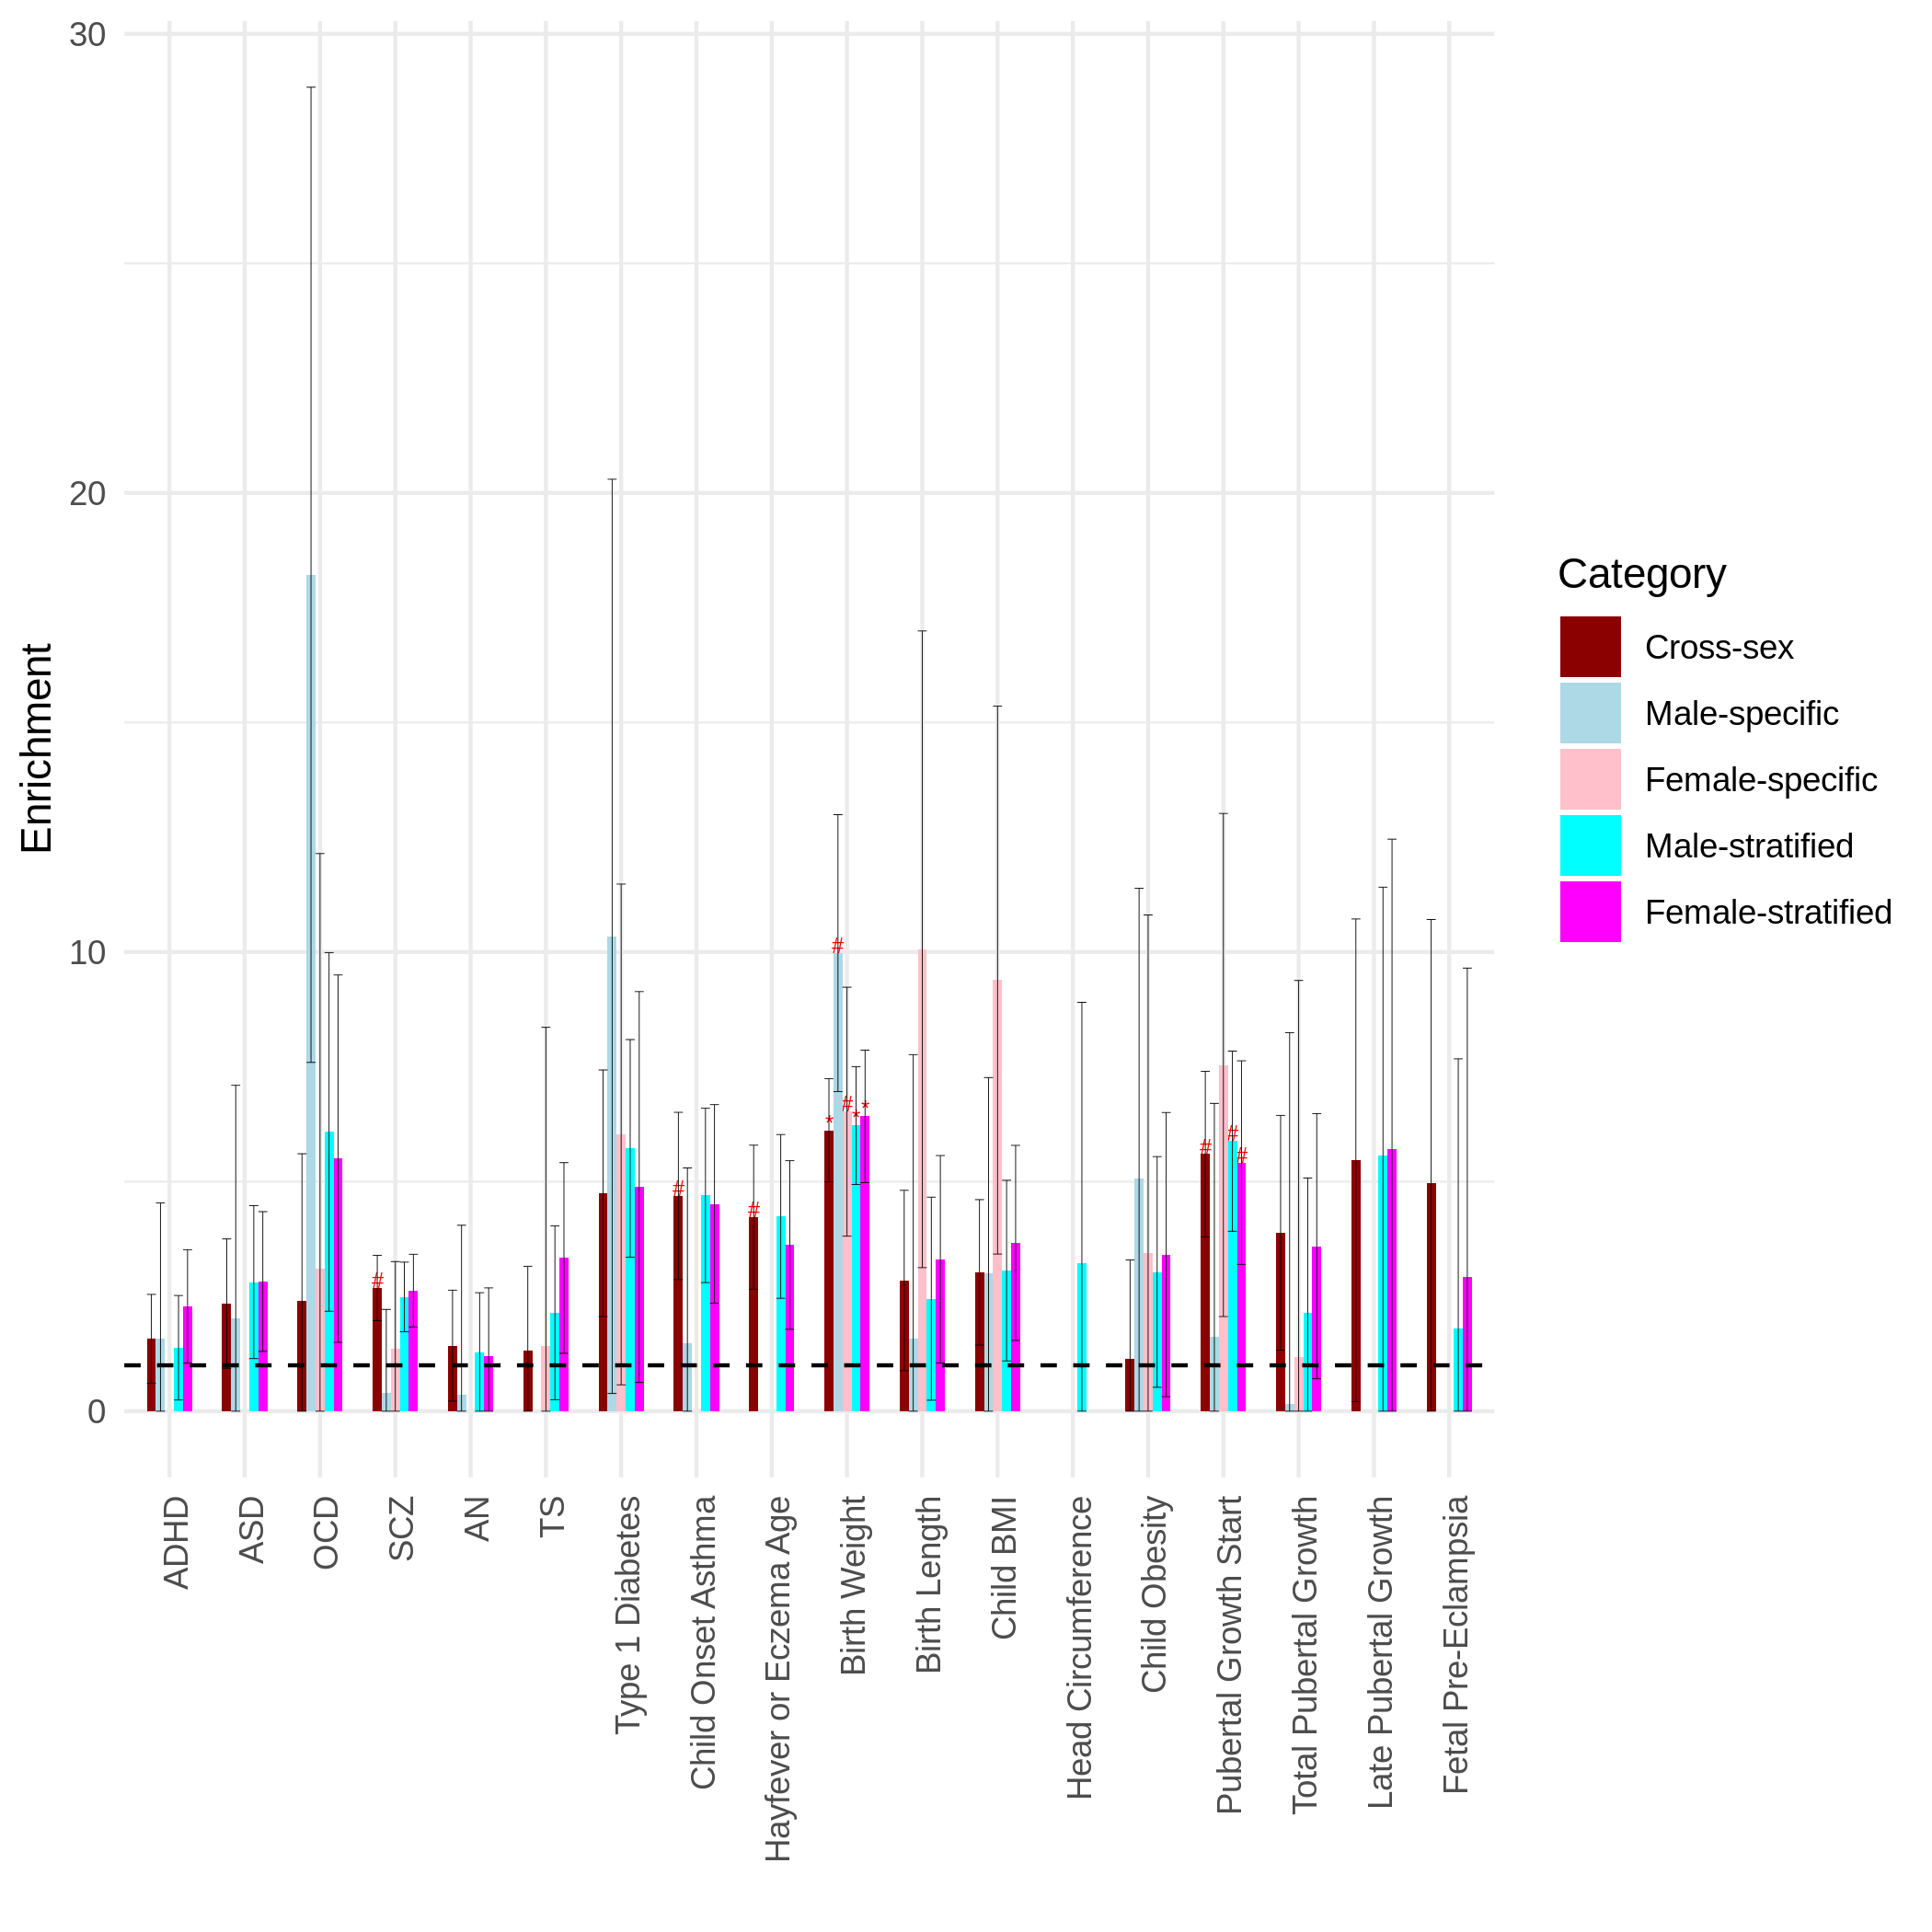

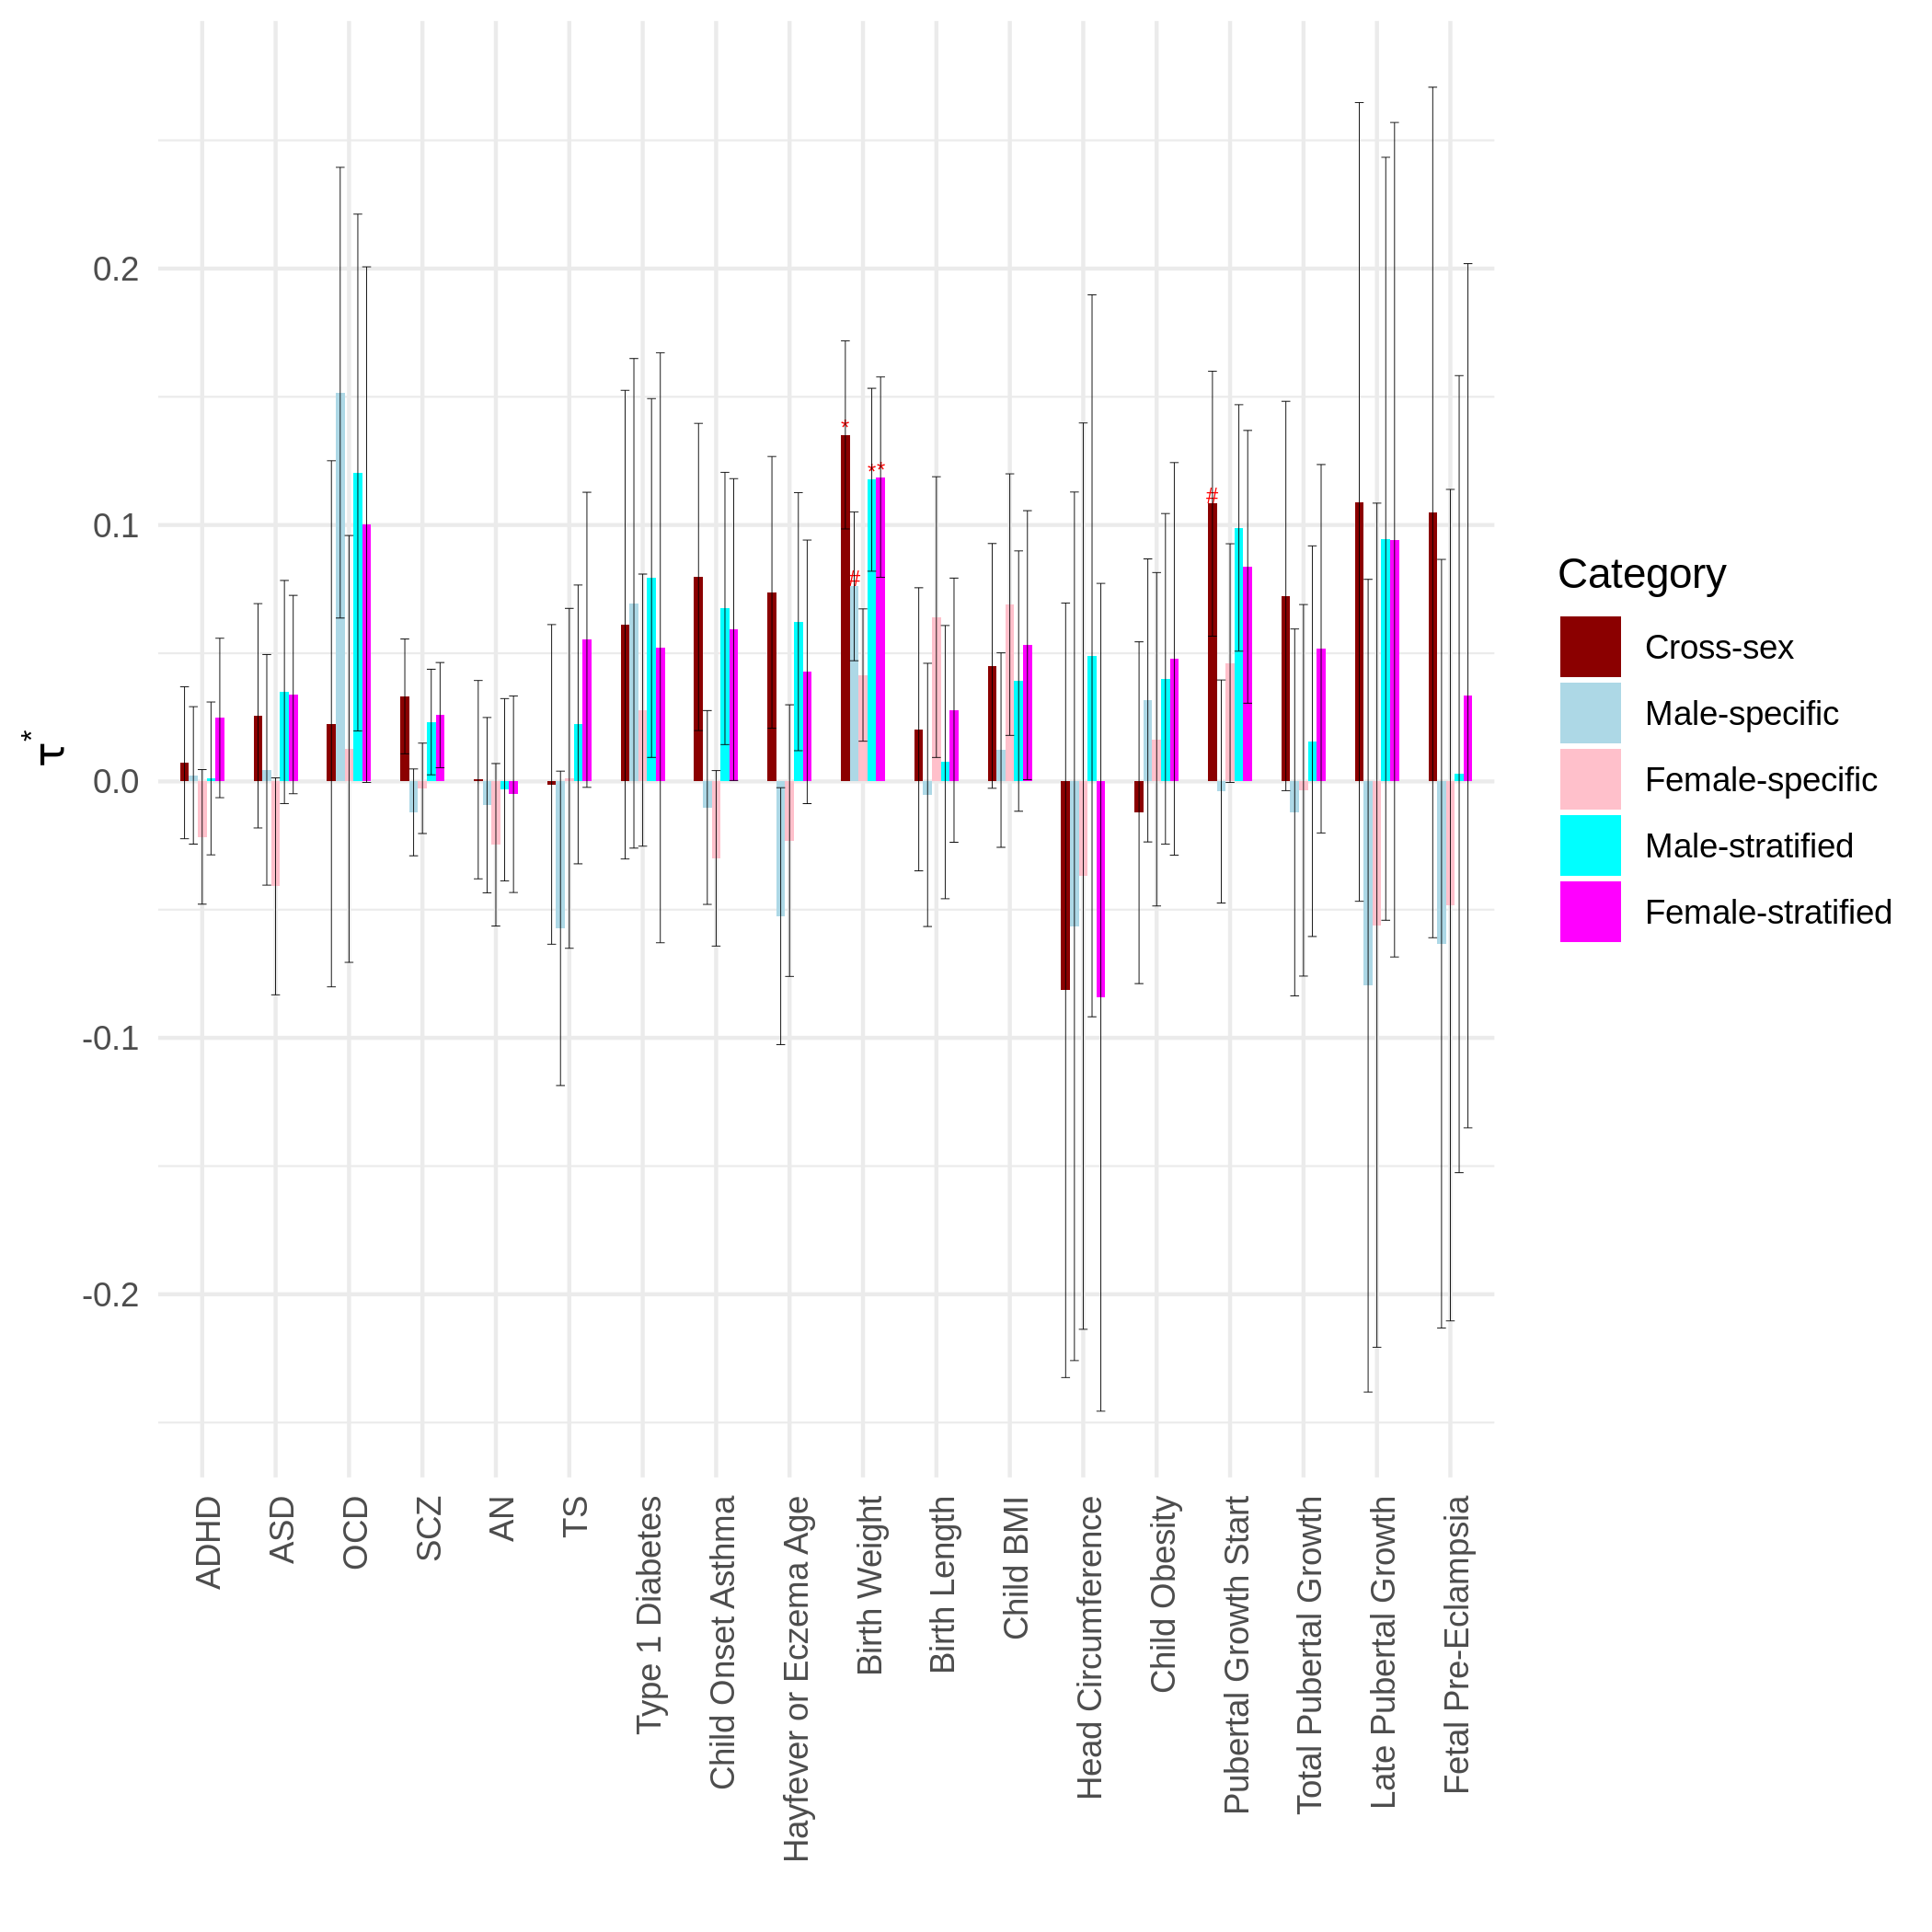

In [46]:
options(width= 10, repr.plot.height= 7, repr.plot.res = 300)
sex_order <- unique(gsub("\\(raw\\)|\\(norm\\)","",GWAS_key))

combined_df <- all_heritability %>%
    filter(GWAS %in% selected_GWAS,annotation == "maxCPPFDR") %>%
    mutate(
        normalization = ifelse(grepl("norm",GWAS),"norm",ifelse(grepl("raw",GWAS),"raw","None")),
        GWAS=gsub("\\(raw\\)|\\(norm\\)","",GWAS)
    )
combined_df <- combined_df[,.SD[which.max(h2 / h2_std_error)],by=c("GWAS","Category")]

filtered <- combined_df[        
        grepl("Male-specific|Female-specific",Category) &
        !grepl("Male|Female",GWAS)

]

to_plot_specific <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-specific","Female-specific")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_specific[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]

filtered <- combined_df[        
        grepl("Male-stratified|Female-stratified",Category) &
        !grepl("Male|Female",GWAS)

]

to_plot_stratified <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-stratified","Female-stratified")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_stratified[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]


filtered <- combined_df[
        grepl("Cross-sex",Category) &
        !grepl("Male|Female",GWAS) 
]

to_plot <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Cross-sex")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]
bar_width <- 0.6
pos <- position_dodge(width=bar_width)
final_plot_df <- rbind(to_plot,to_plot_specific,to_plot_stratified)
final_plot_df[Enrichment < 0, c("Enrichment","Enrichment_std_error","sig_enrich","sig_enrich_GWAS")] <- NA
ggplot(
    final_plot_df,
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    final_plot_df,
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))

Warning message:
“Removed
32 rows
containing
missing
values
(geom_text).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_col).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_text).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_col).”


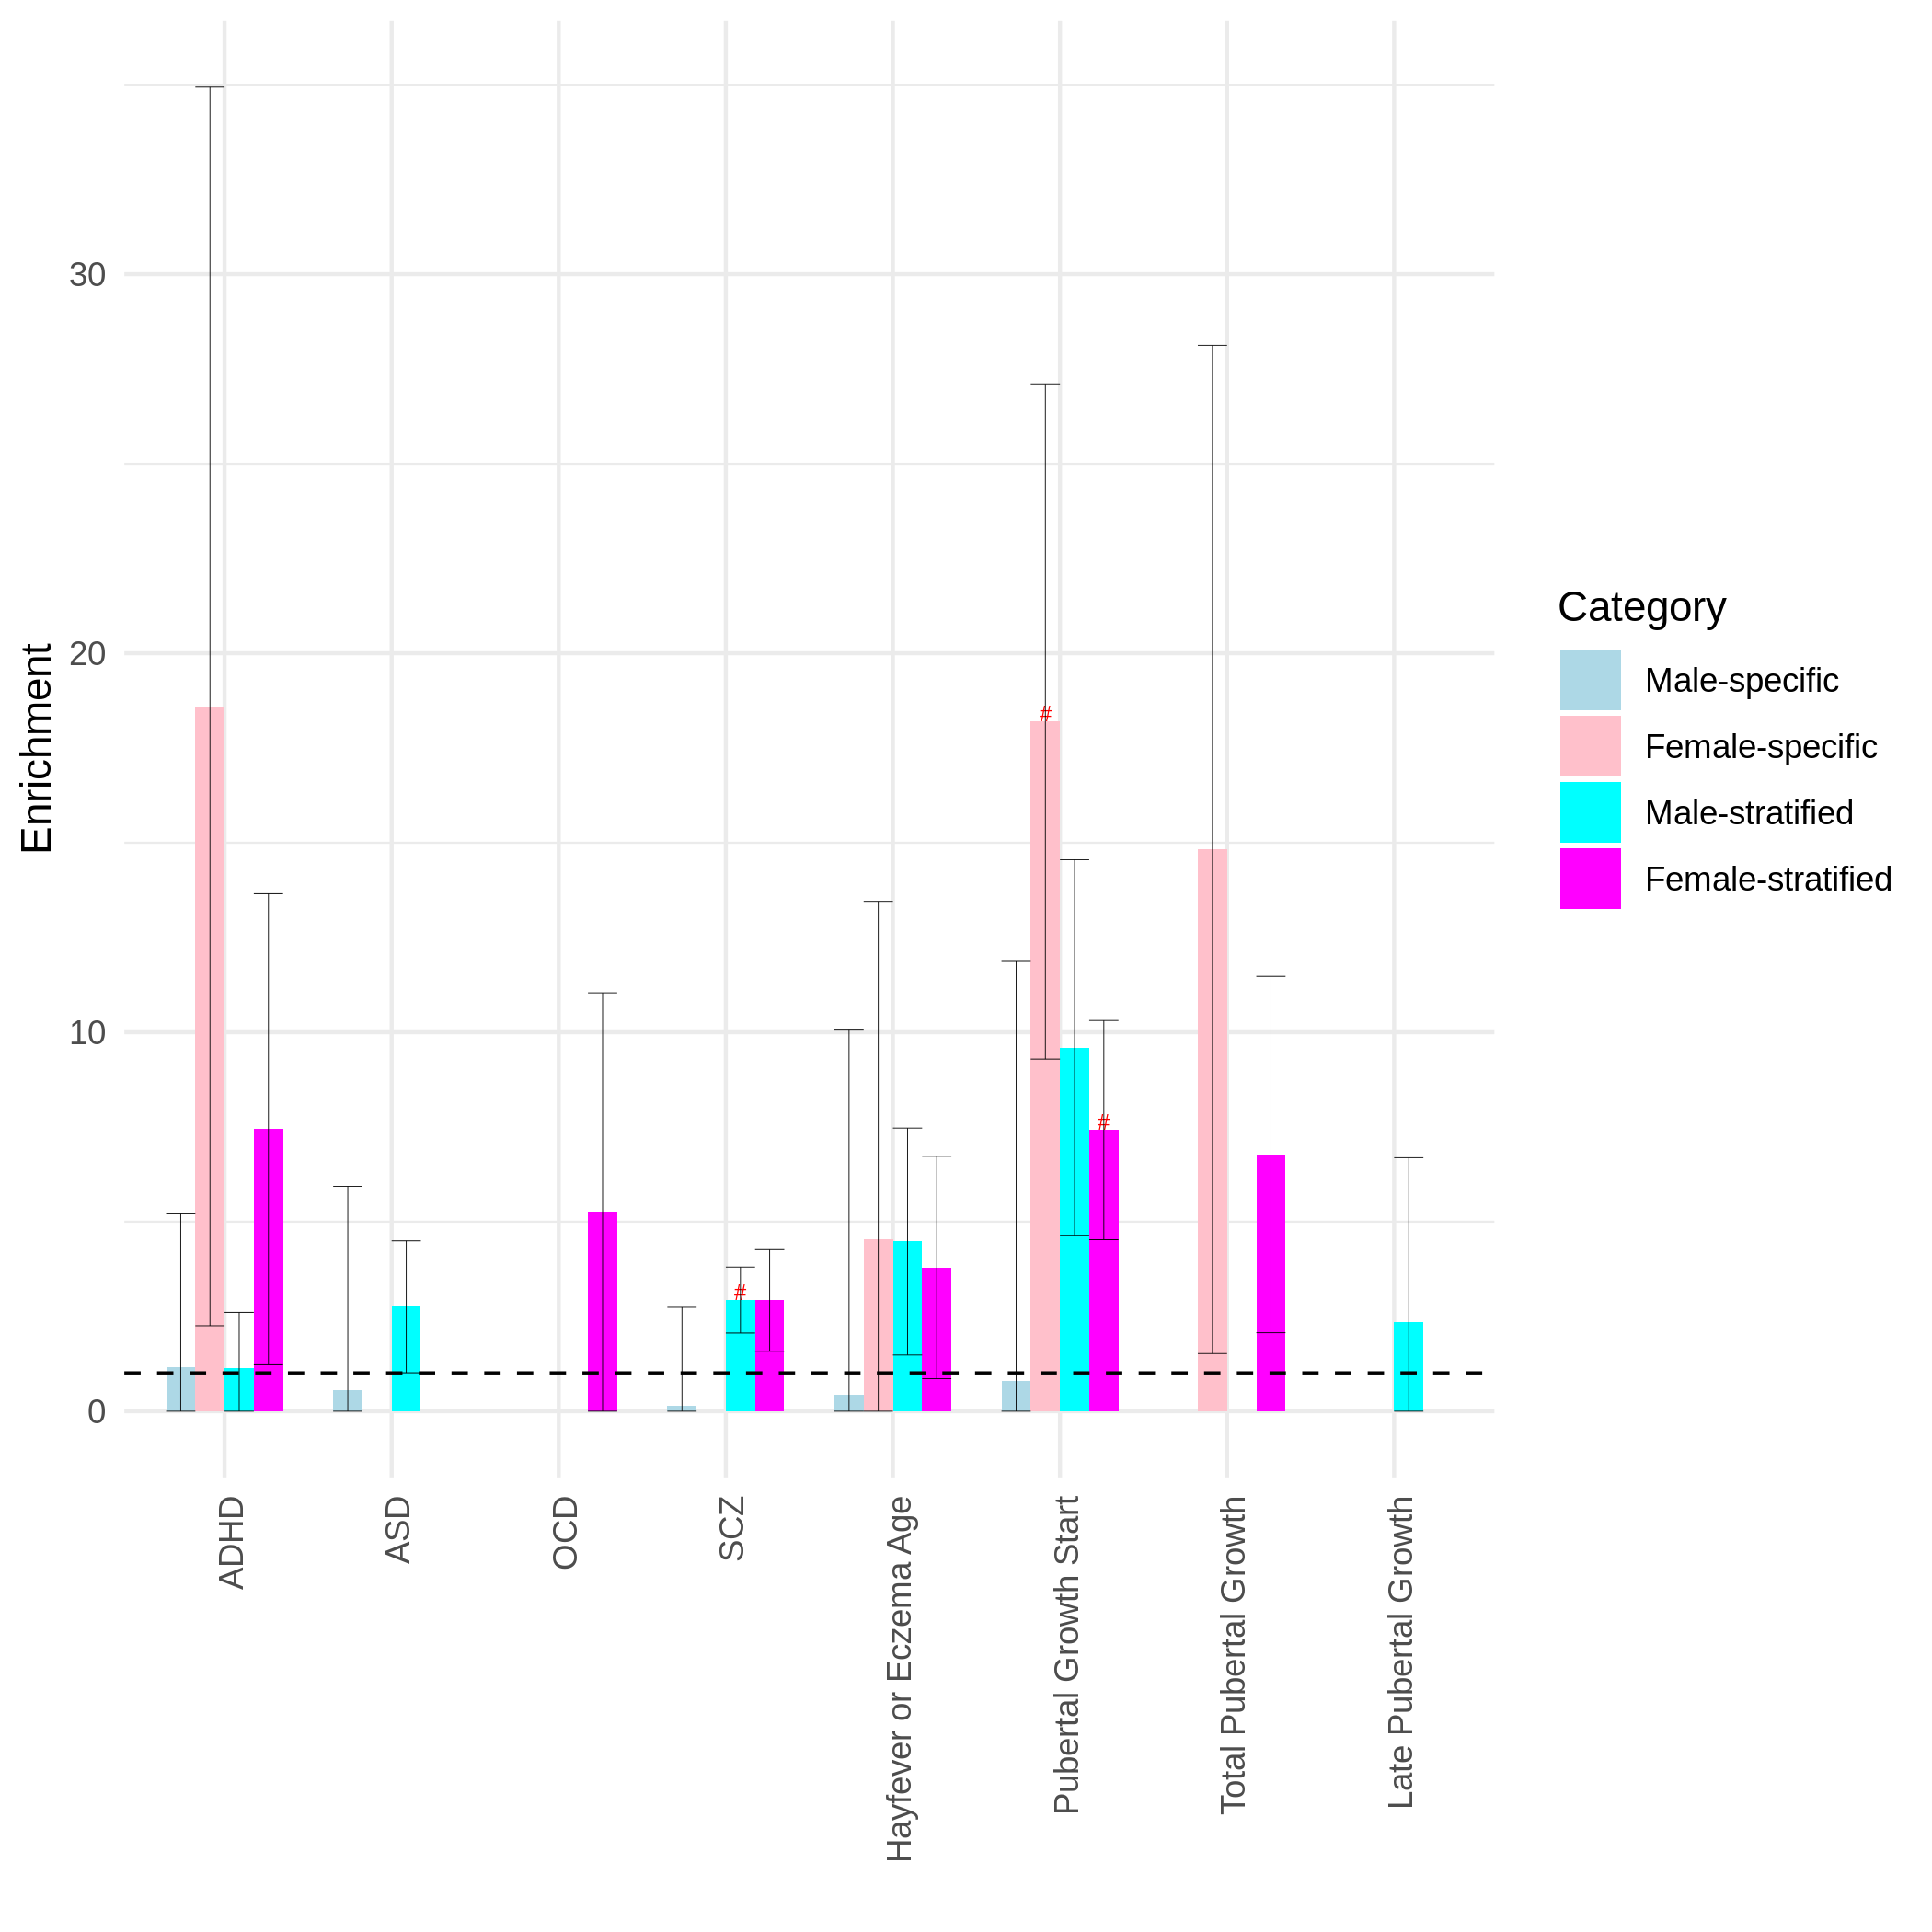

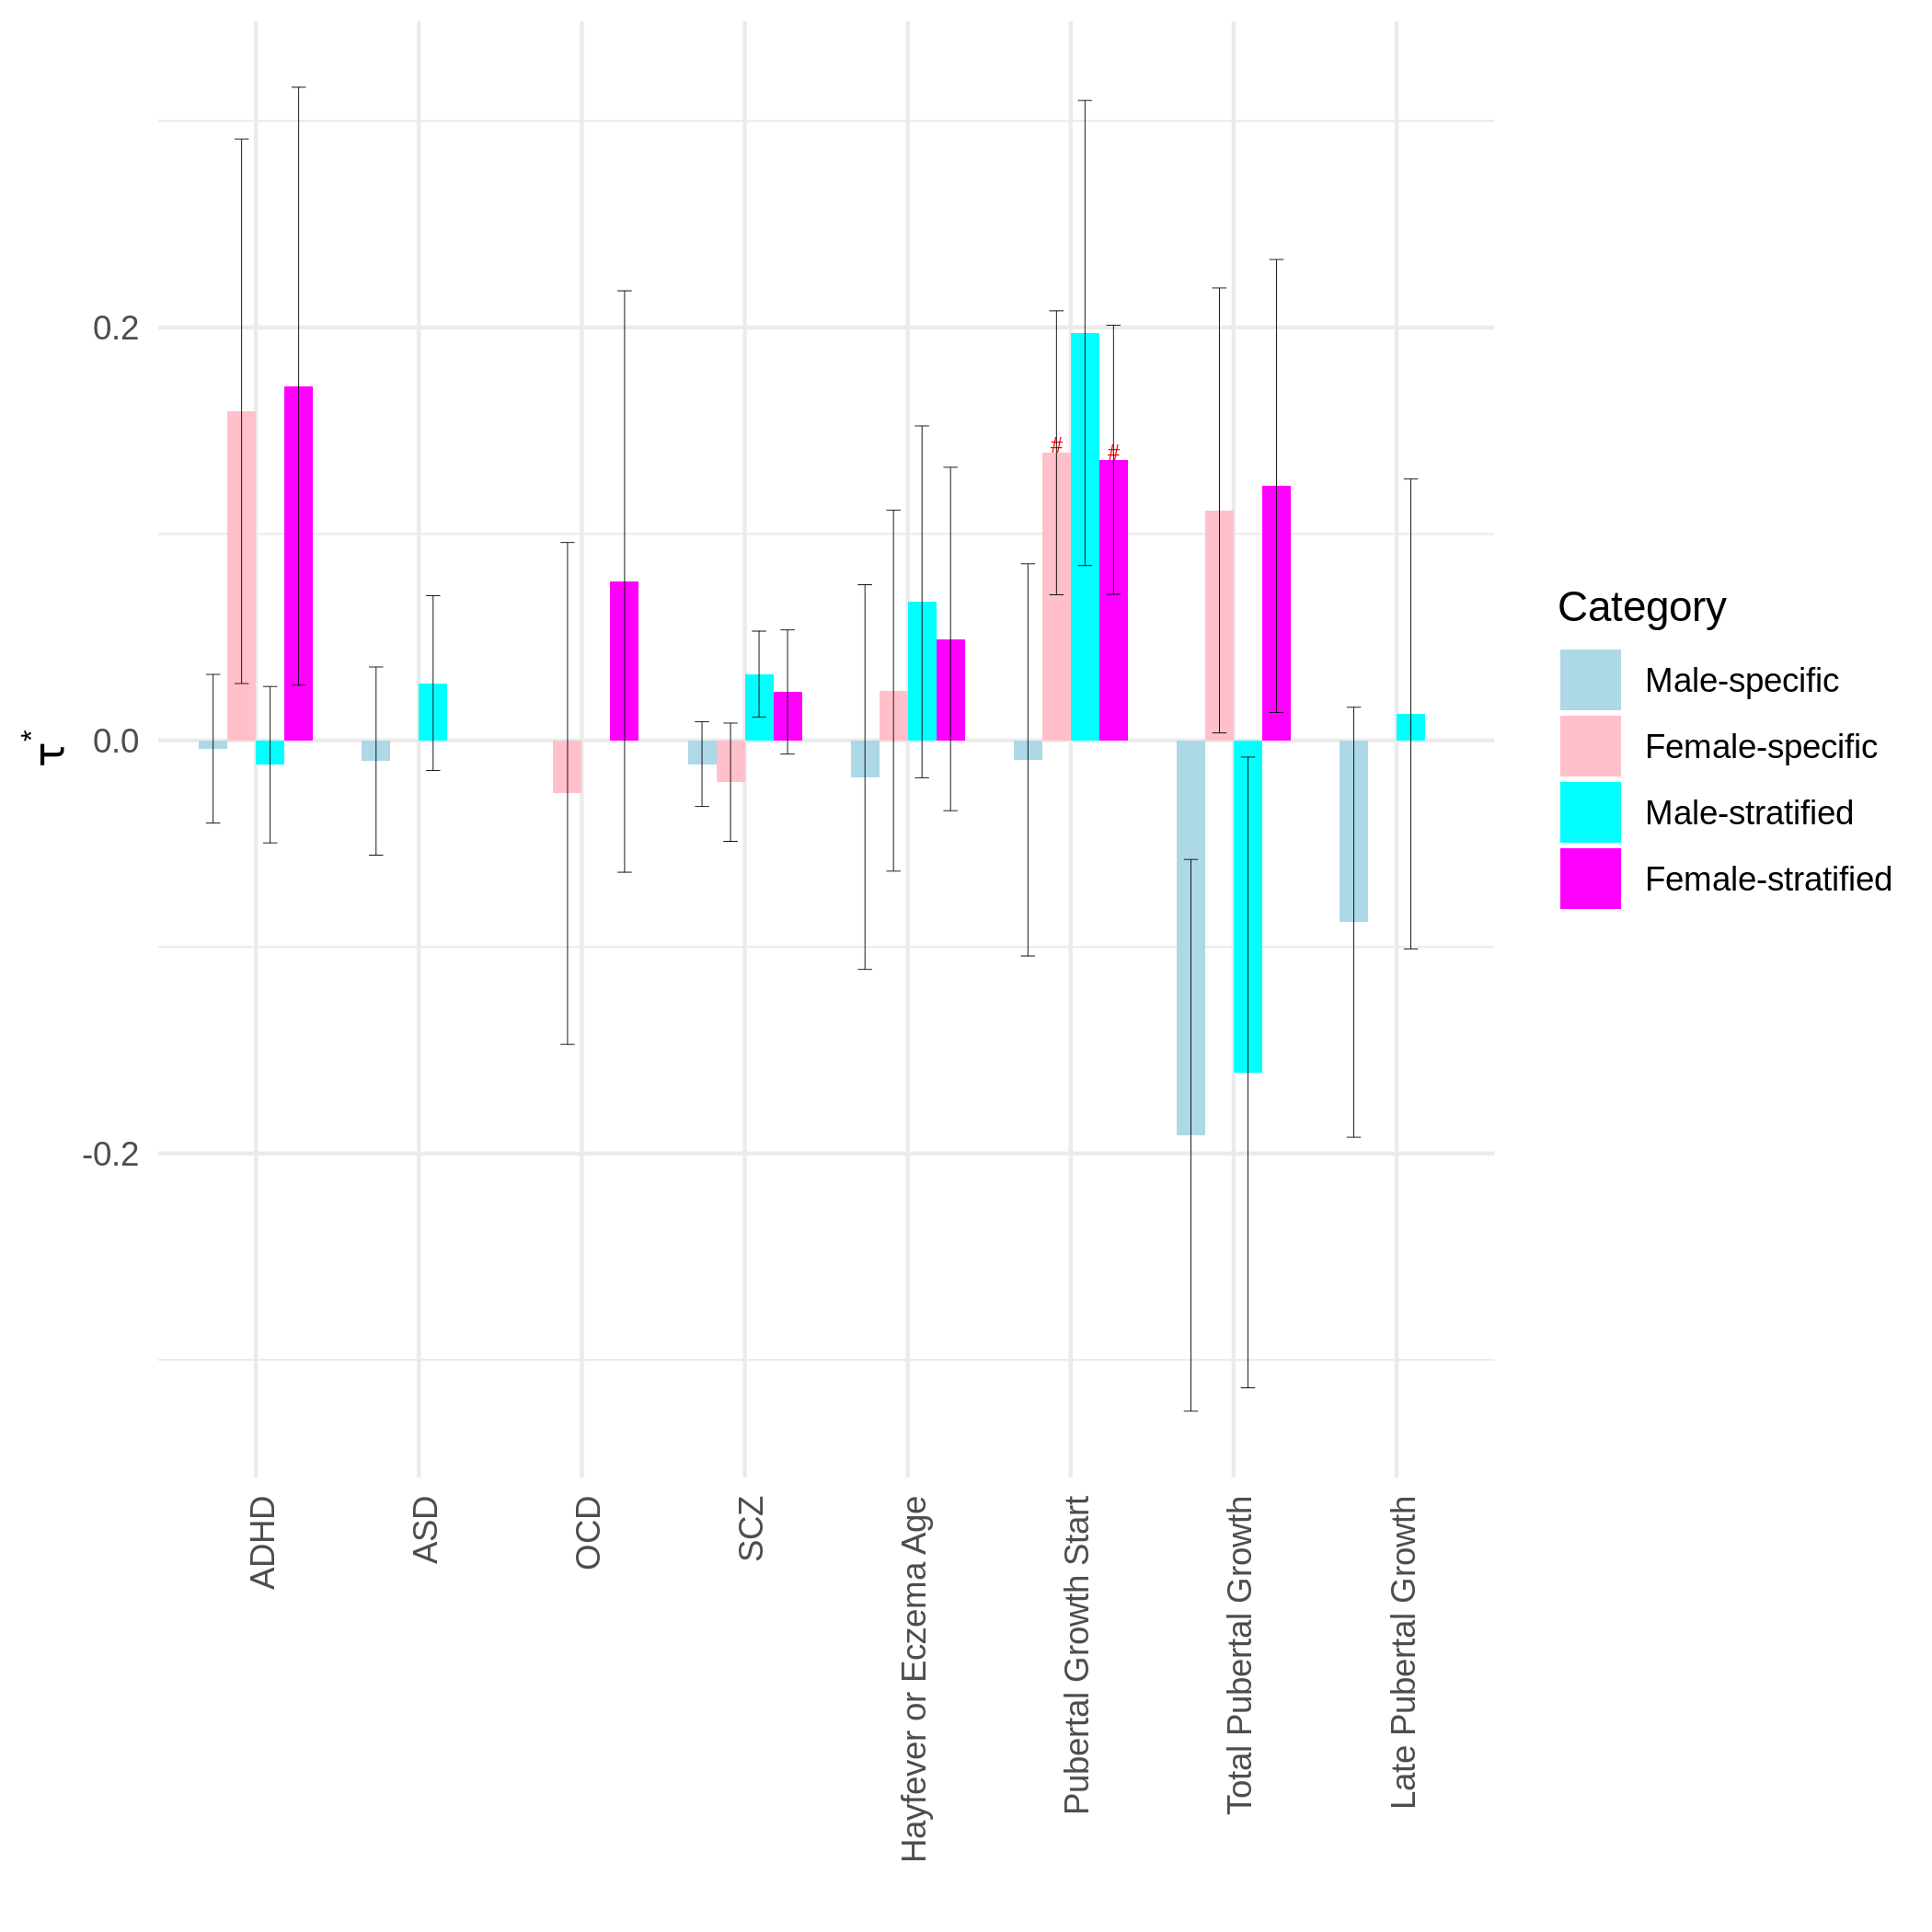

In [47]:
options(width= 10, repr.plot.height= 7, repr.plot.res = 300)
sex_order <- unique(gsub("\\(raw\\)|\\(norm\\)","",GWAS_key))

combined_df <- all_heritability %>%
    filter(GWAS %in% selected_GWAS,annotation == "maxCPPFDR") %>%
    mutate(
        normalization = ifelse(grepl("norm",GWAS),"norm",ifelse(grepl("raw",GWAS),"raw","None")),
        GWAS=gsub("\\(raw\\)|\\(norm\\)","",GWAS)
    )
combined_df <- combined_df[,.SD[which.max(h2 / h2_std_error)],by=c("GWAS","Category")]

filtered <- combined_df[        
        (grepl("Male-specific",Category) & grepl("Male",GWAS)) |
        (grepl("Female-specific",Category) & grepl("Female",GWAS))
]

to_plot_specific <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-specific","Female-specific")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_specific[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]

filtered <- combined_df[        
        (grepl("Male-stratified",Category) & grepl("Male",GWAS)) |
        (grepl("Female-stratified",Category) & grepl("Female",GWAS))

]

to_plot_stratified <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-stratified","Female-stratified")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_stratified[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]



bar_width <- 0.7
pos <- position_dodge(width=bar_width)
final_plot_df <- rbind(to_plot_specific,to_plot_stratified) %>%
    mutate(GWAS = gsub(" Males| Females","",GWAS)) %>%
    mutate(GWAS = factor(GWAS,levels=sex_order))
final_plot_df[Enrichment < 0, c("Enrichment","Enrichment_std_error","sig_enrich","sig_enrich_GWAS")] <- NA
ggplot(
    final_plot_df %>% group_by(GWAS) %>% complete(Category,Enrichment=NA,Enrichment_std_error=NA),
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    final_plot_df %>% group_by(GWAS) %>% complete(Category,tau=NA,tau_std_error=NA),
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width / 2 ,size=0.1,position=pos) + 
    scale_fill_manual(values=c("light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))

### 95% Credible Set Option

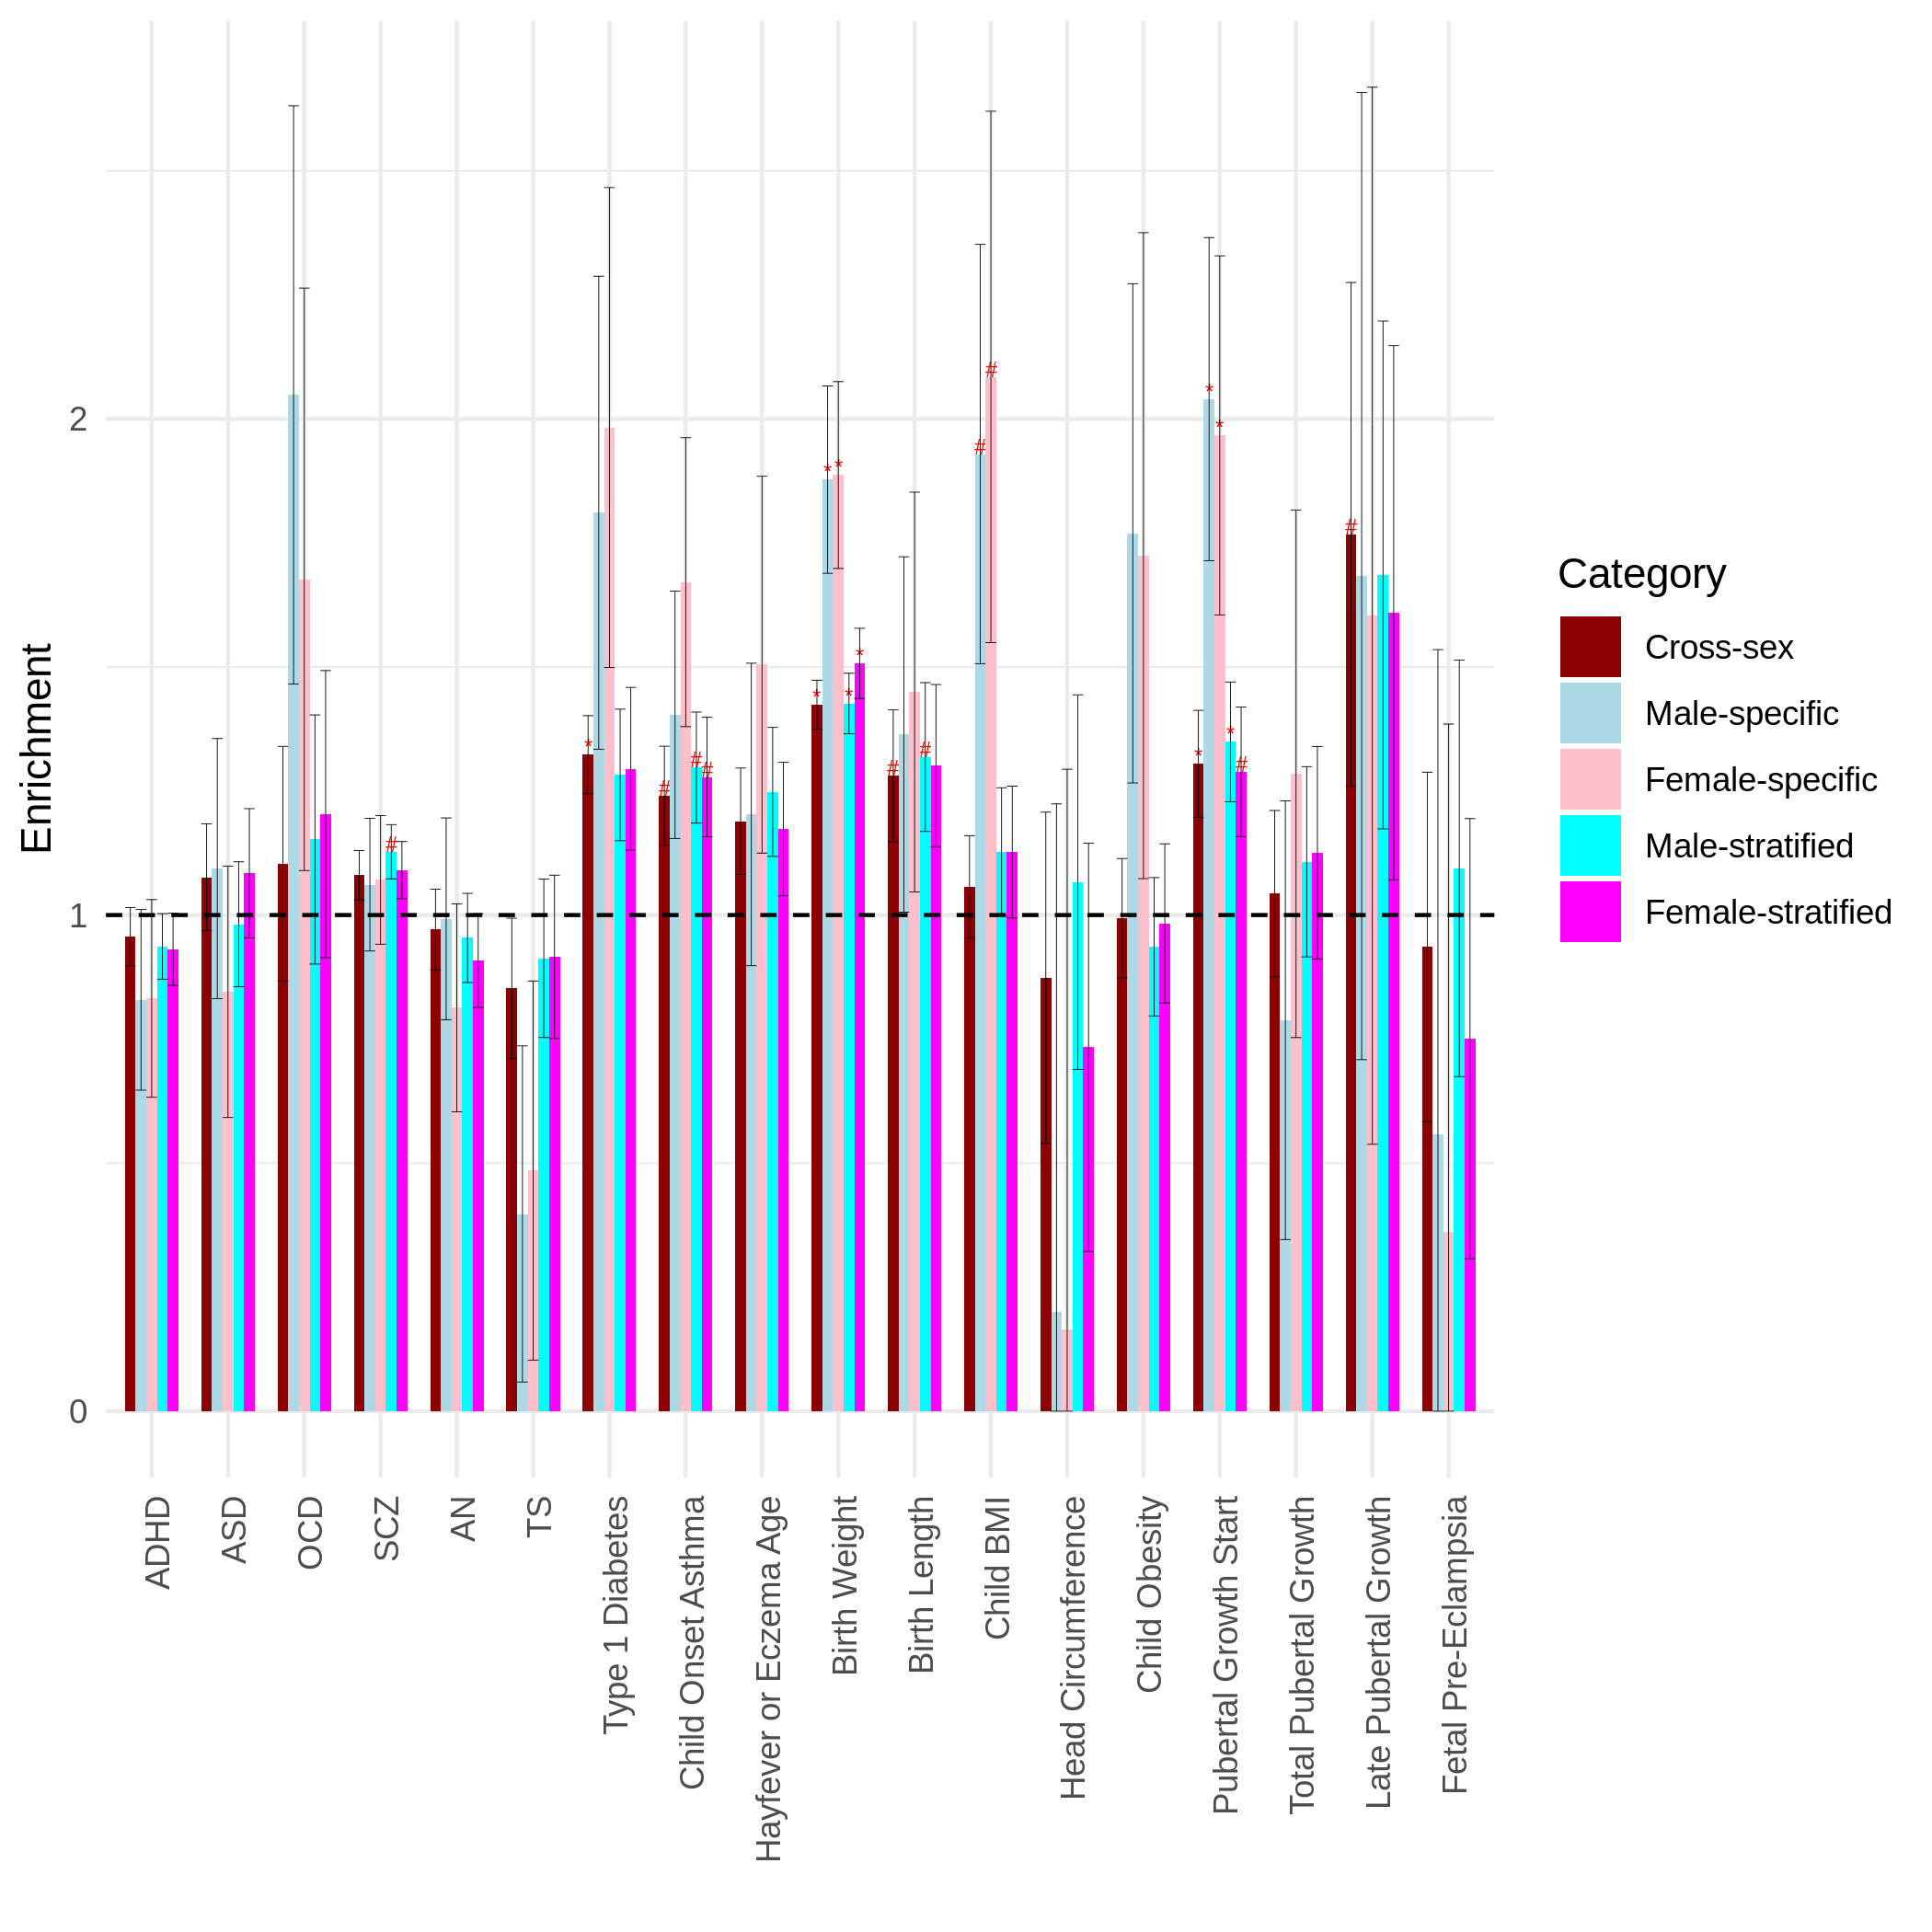

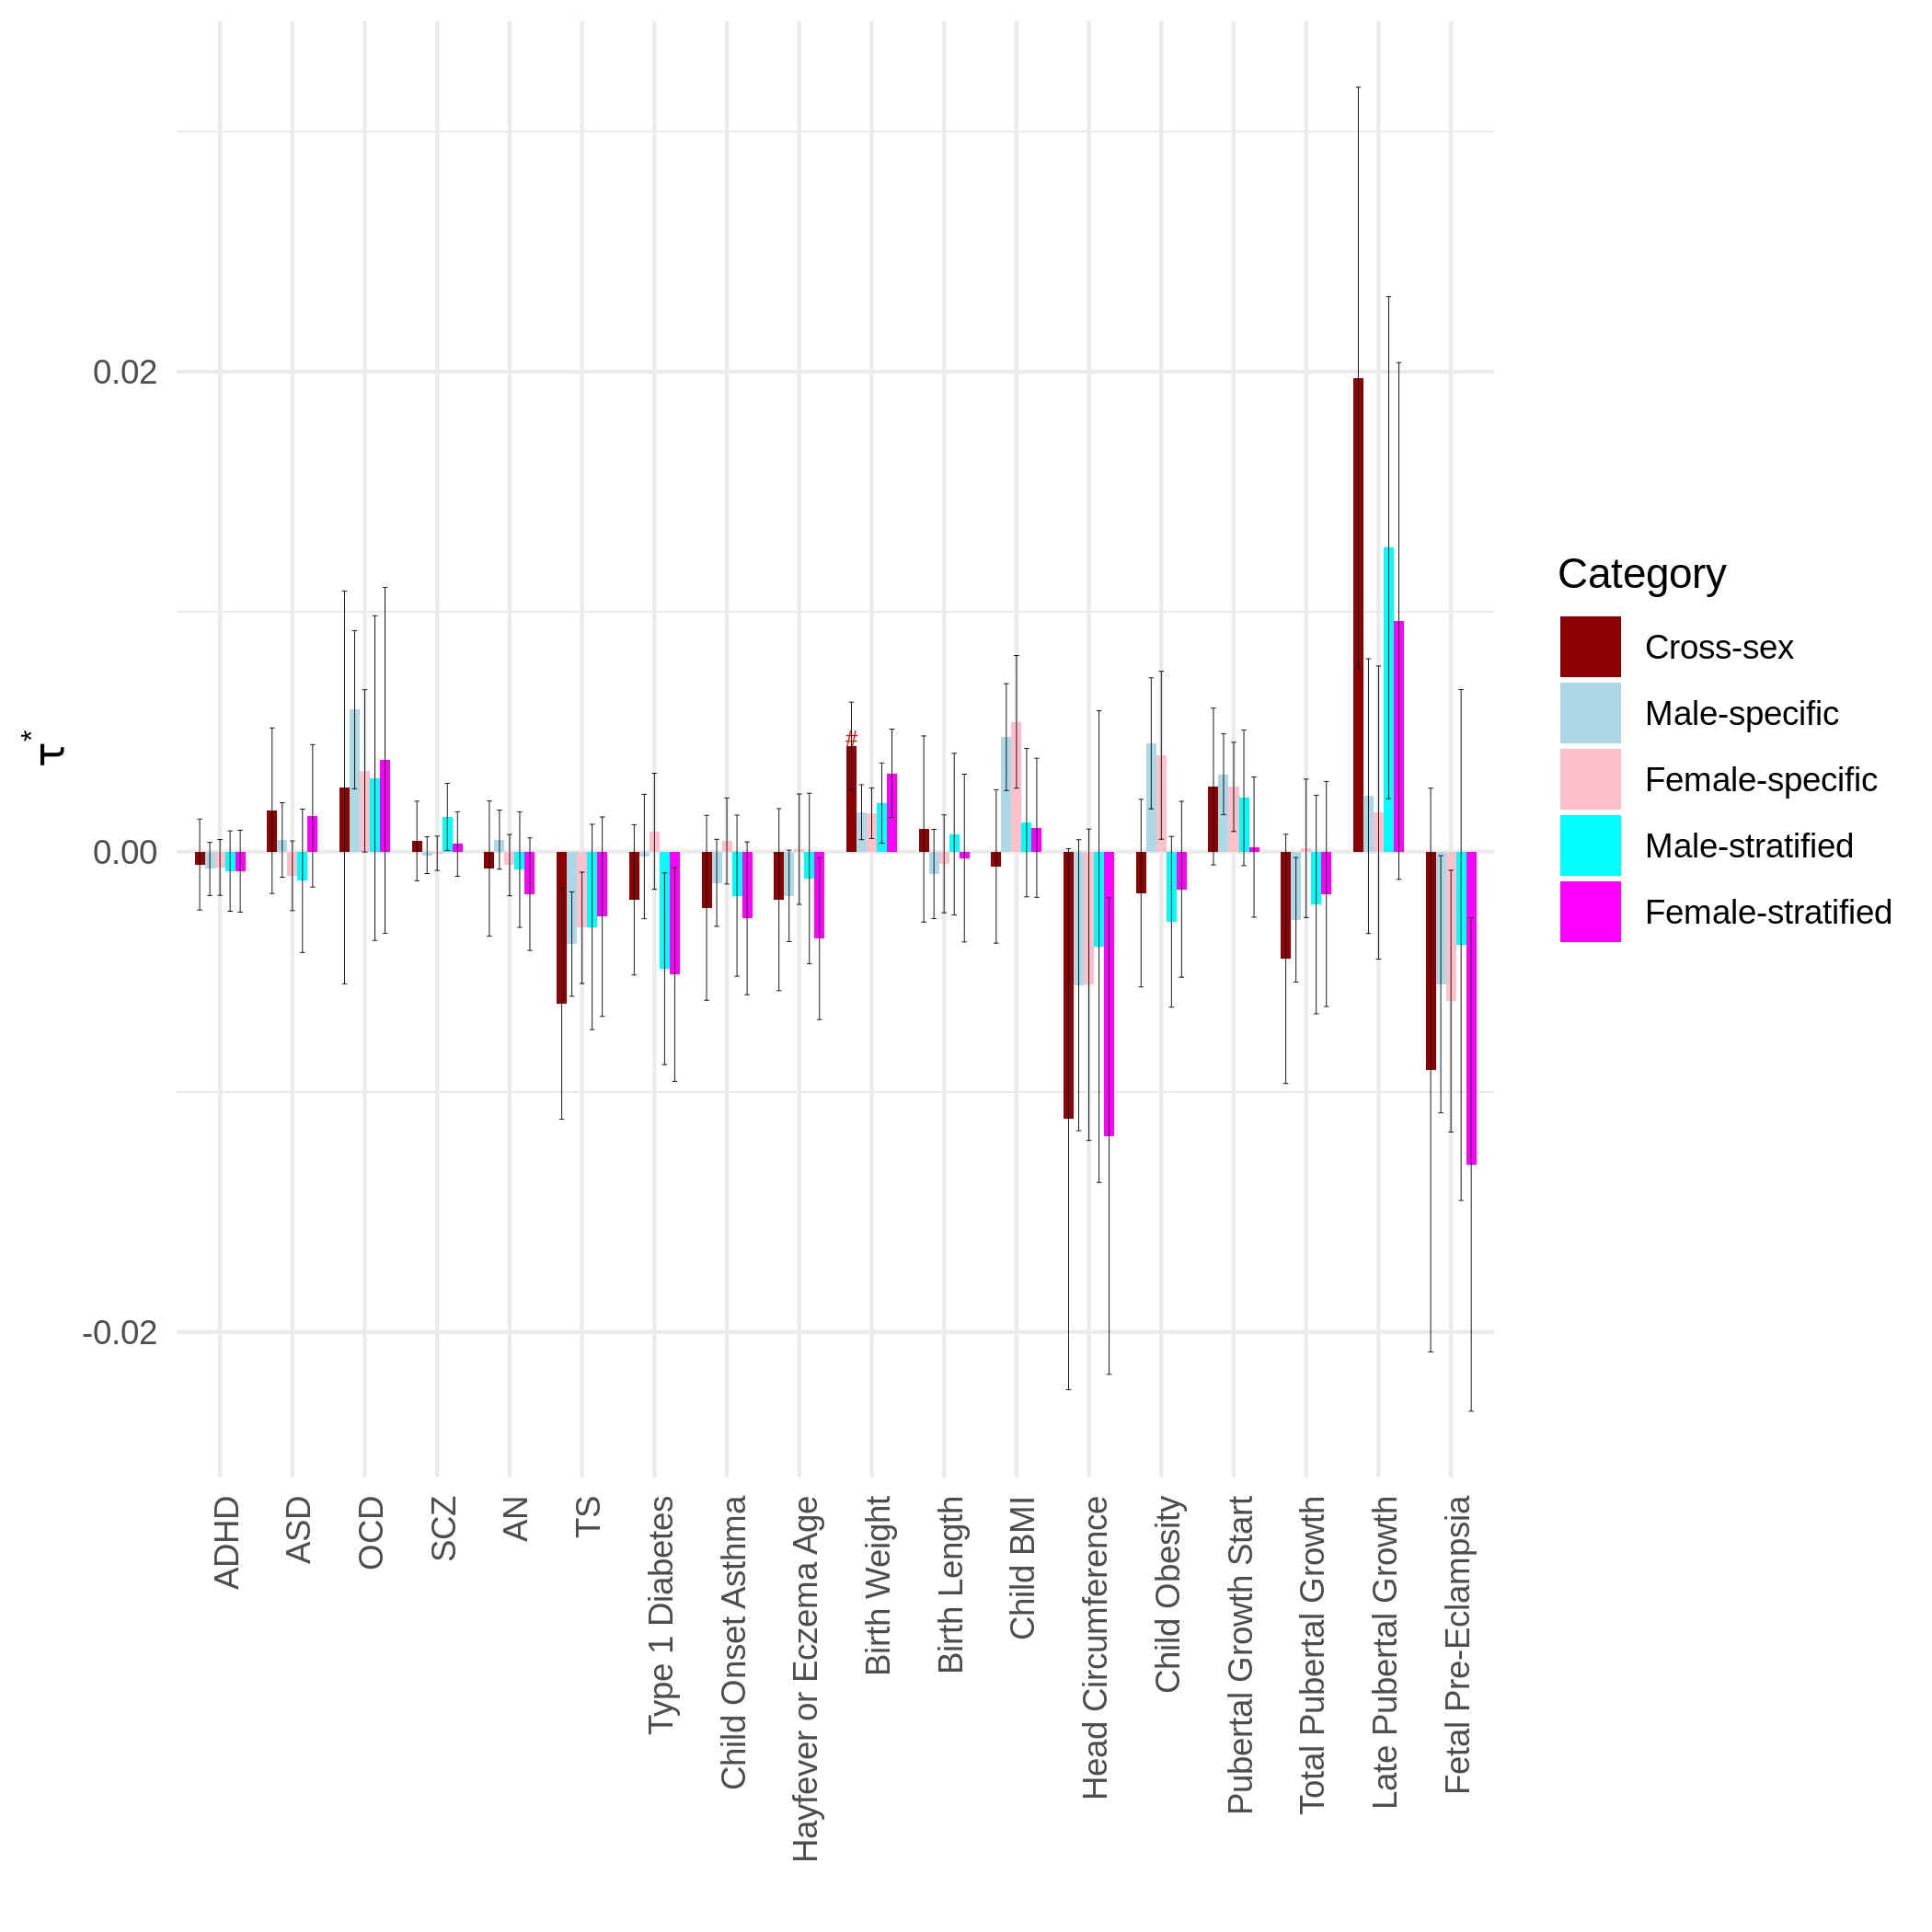

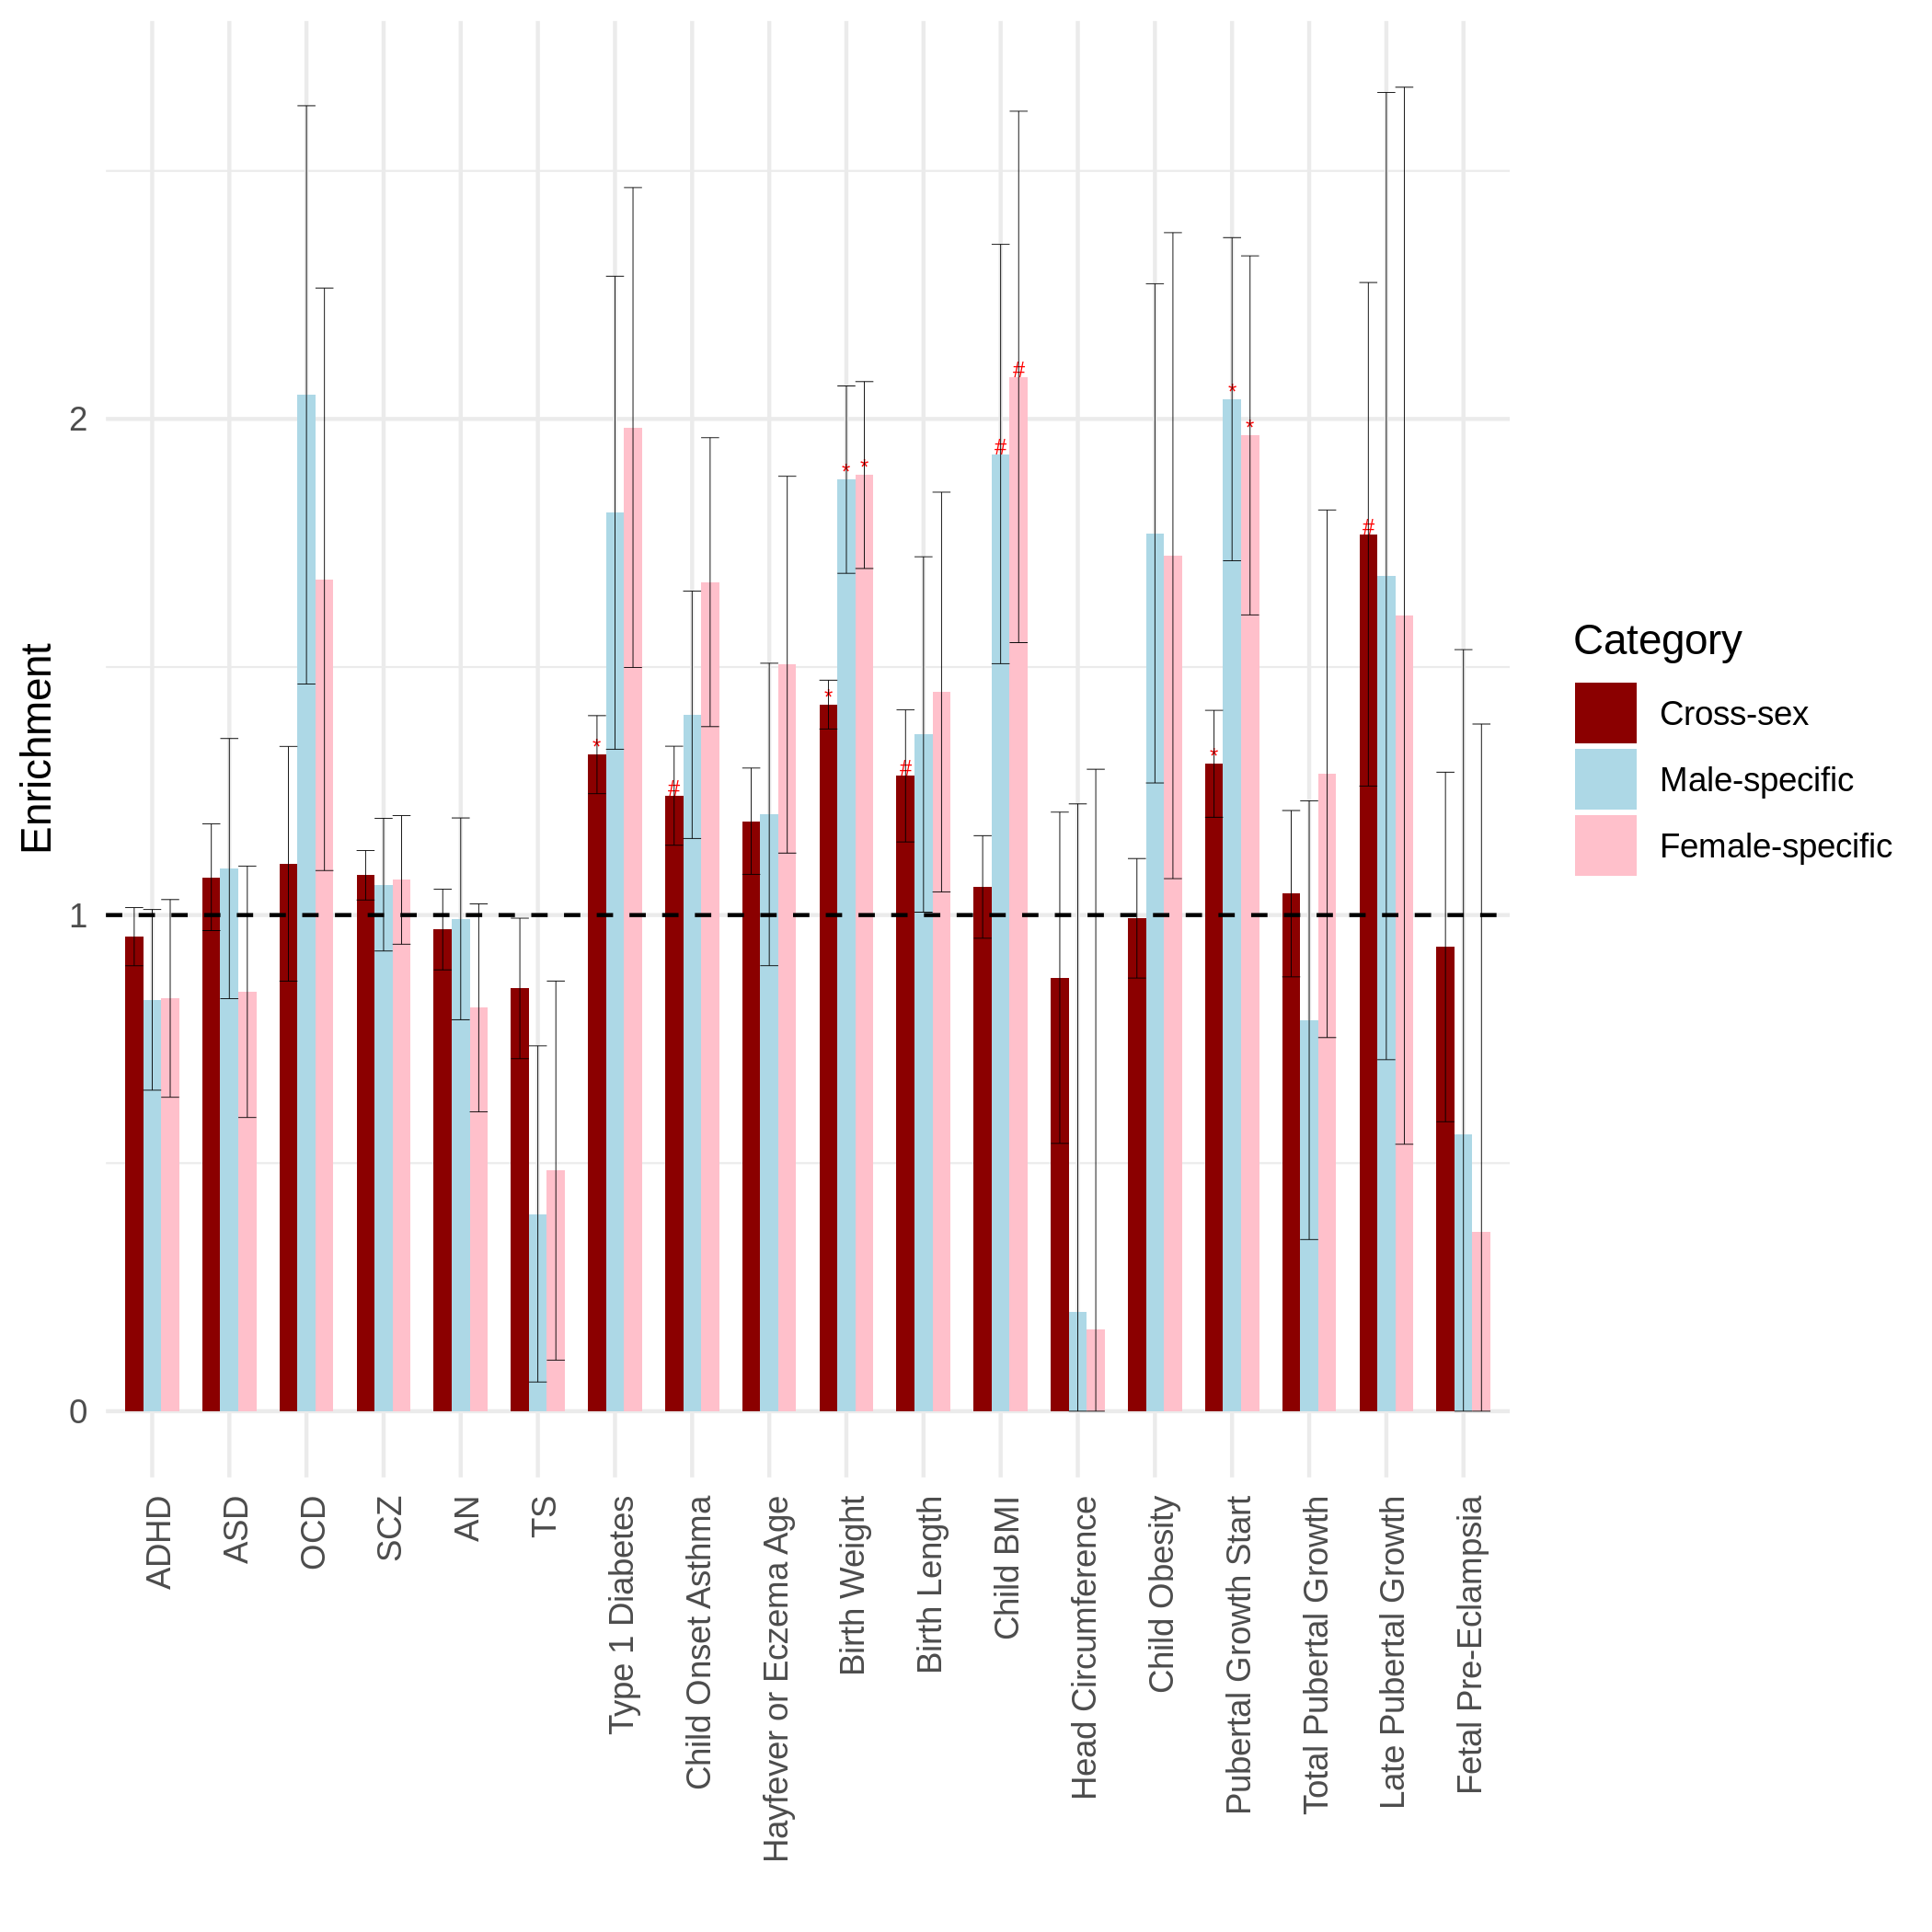

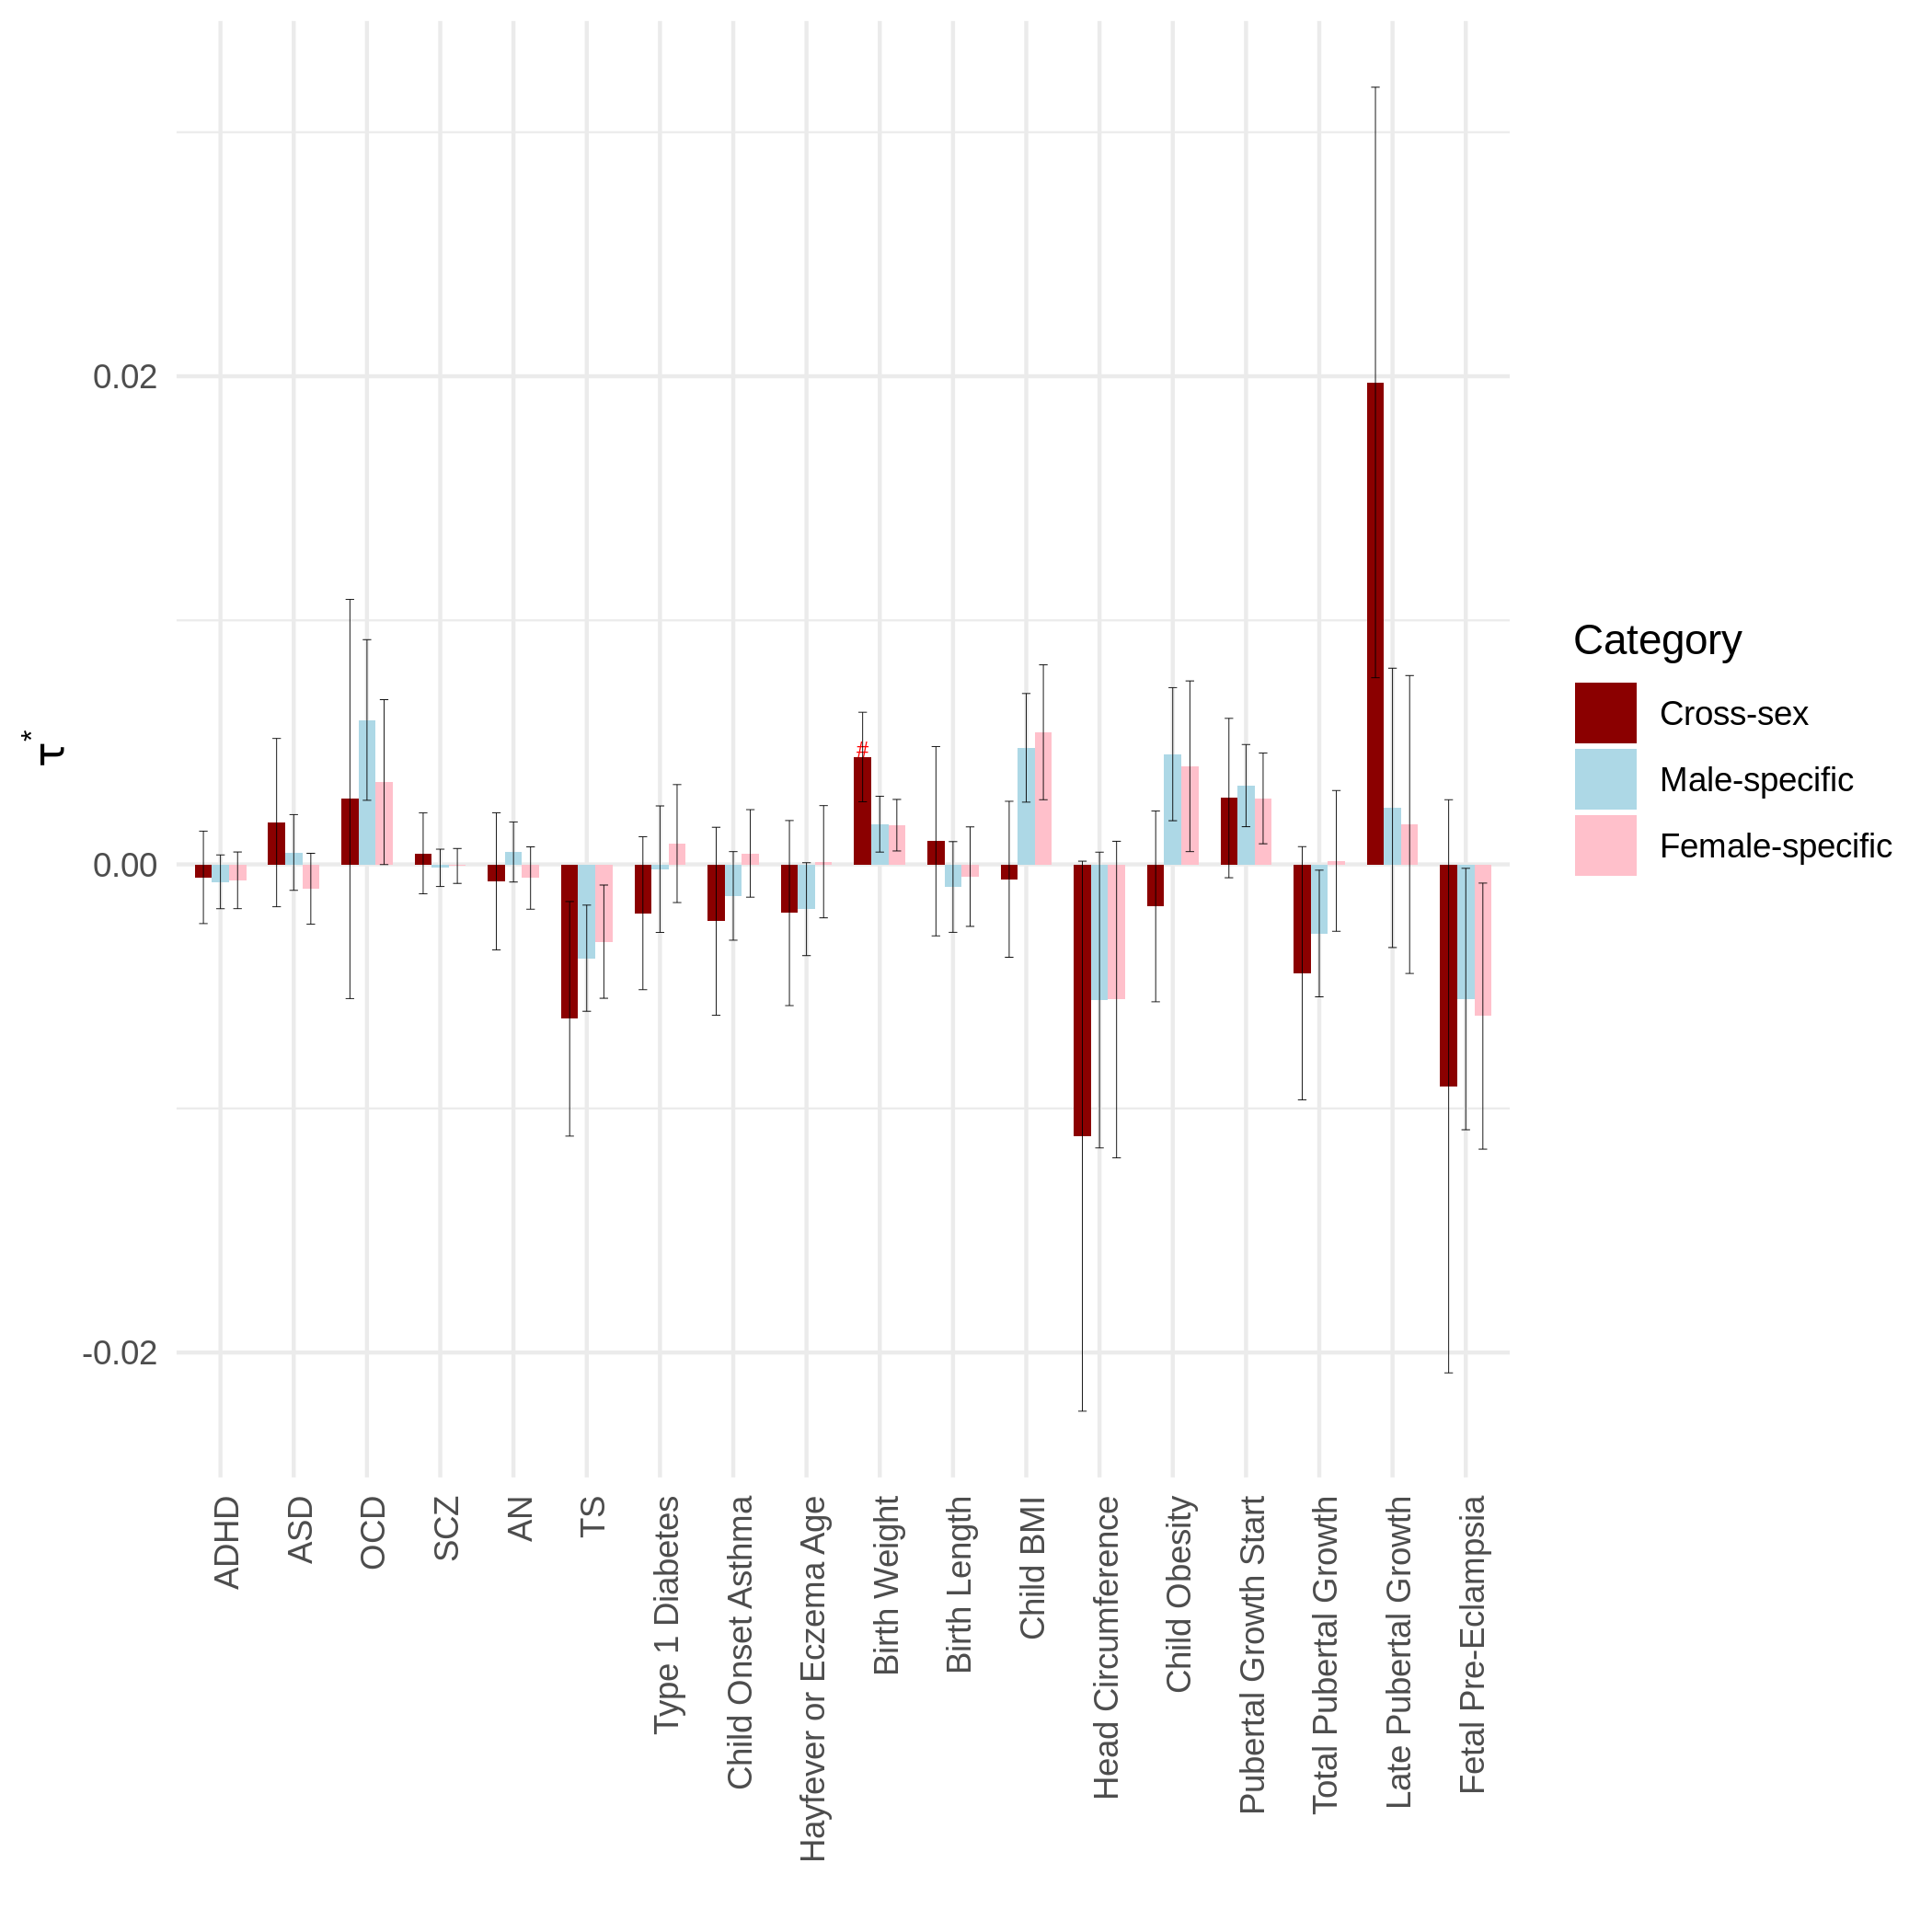

In [48]:
options(width= 10, repr.plot.height= 7, repr.plot.res = 300)
sex_order <- unique(gsub("\\(raw\\)|\\(norm\\)","",GWAS_key))

combined_df <- all_heritability %>%
    filter(GWAS %in% selected_GWAS,annotation == "Cred95FDR") %>%
    mutate(
        normalization = ifelse(grepl("norm",GWAS),"norm",ifelse(grepl("raw",GWAS),"raw","None")),
        GWAS=gsub("\\(raw\\)|\\(norm\\)","",GWAS)
    )
combined_df <- combined_df[,.SD[which.max(h2 / h2_std_error)],by=c("GWAS","Category")]

filtered <- combined_df[        
        grepl("Male-specific|Female-specific",Category) &
        !grepl("Male|Female",GWAS)

]

to_plot_specific <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-specific","Female-specific")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_specific[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]

filtered <- combined_df[        
        grepl("Male-stratified|Female-stratified",Category) &
        !grepl("Male|Female",GWAS)

]

to_plot_stratified <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-stratified","Female-stratified")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_stratified[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]


filtered <- combined_df[
        grepl("Cross-sex",Category) &
        !grepl("Male|Female",GWAS) 
]

to_plot <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Cross-sex")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]
bar_width <- 0.7
pos <- position_dodge(width=bar_width)
final_plot_df <- rbind(to_plot,to_plot_specific,to_plot_stratified) 
final_plot_df[Enrichment < 0, c("Enrichment","Enrichment_std_error","sig_enrich","sig_enrich_GWAS")] <- NA
ggplot(
    final_plot_df,
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    final_plot_df,
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width / 2 ,size=0.1,position=pos) + 
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))


ggplot(
    final_plot_df %>% filter(!grepl("stratified",Category)),
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    final_plot_df %>% filter(!grepl("stratified",Category)),
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width / 2 ,size=0.1,position=pos) + 
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))

Warning message in `[.data.table`(to_plot, , `:=`(sig_tau = p.adjust(tau_p, method = "BH") < :
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


annotation,Category,GWAS,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,⋯,significant_coef,significant_enrich,annot_sd,tau,tau_std_error,tau_p,sig_tau,sig_enrich,sig_enrich_GWAS,sig_tau_GWAS
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
Cred95FDR,Cross-sex,Fetal Pre-Eclampsia,0.4661339,0.4361887,0.1641923,0.9357584,0.3522428,0.8535221,-5.538086e-10,⋯,FALSE,FALSE,0.08441333,-9.092268e-03,1.174203e-02,0.4387325,FALSE,FALSE,FALSE,FALSE
Cred95FDR,Cross-sex,Maternal Pre-Eclampsia,0.4661339,0.7842730,0.3482704,1.6825059,0.7471467,0.2120136,-1.870512e-07,⋯,FALSE,FALSE,0.08441333,6.190763e-05,-6.344840e-05,0.3292051,FALSE,FALSE,FALSE,FALSE
Cred95FDR,Female-specific,Fetal Pre-Eclampsia,0.1058787,0.0383175,0.1083335,0.3618998,1.0231849,0.4988152,-1.237805e-09,⋯,FALSE,FALSE,0.02582878,-6.218098e-03,5.450453e-03,0.2539362,FALSE,FALSE,FALSE,FALSE
Cred95FDR,Female-specific,Maternal Pre-Eclampsia,0.1058787,0.0982278,0.1179334,0.9277387,1.1138539,0.9468054,5.966989e-08,⋯,FALSE,FALSE,0.02582878,-6.042712e-06,-2.283612e-05,0.7913084,FALSE,FALSE,FALSE,FALSE
Cred95FDR,Female-stratified,Fetal Pre-Eclampsia,0.3811504,0.2861814,0.1690843,0.7508361,0.4436156,0.5573893,-9.688026e-10,⋯,FALSE,FALSE,0.06910695,-1.302143e-02,1.027895e-02,0.2052249,FALSE,FALSE,FALSE,FALSE
Cred95FDR,Female-stratified,Maternal Pre-Eclampsia,0.3811504,0.5599694,0.3053449,1.4691560,0.8011141,0.4715617,-8.135097e-08,⋯,FALSE,FALSE,0.06910695,2.204232e-05,-5.161830e-05,0.6693610,FALSE,FALSE,FALSE,FALSE


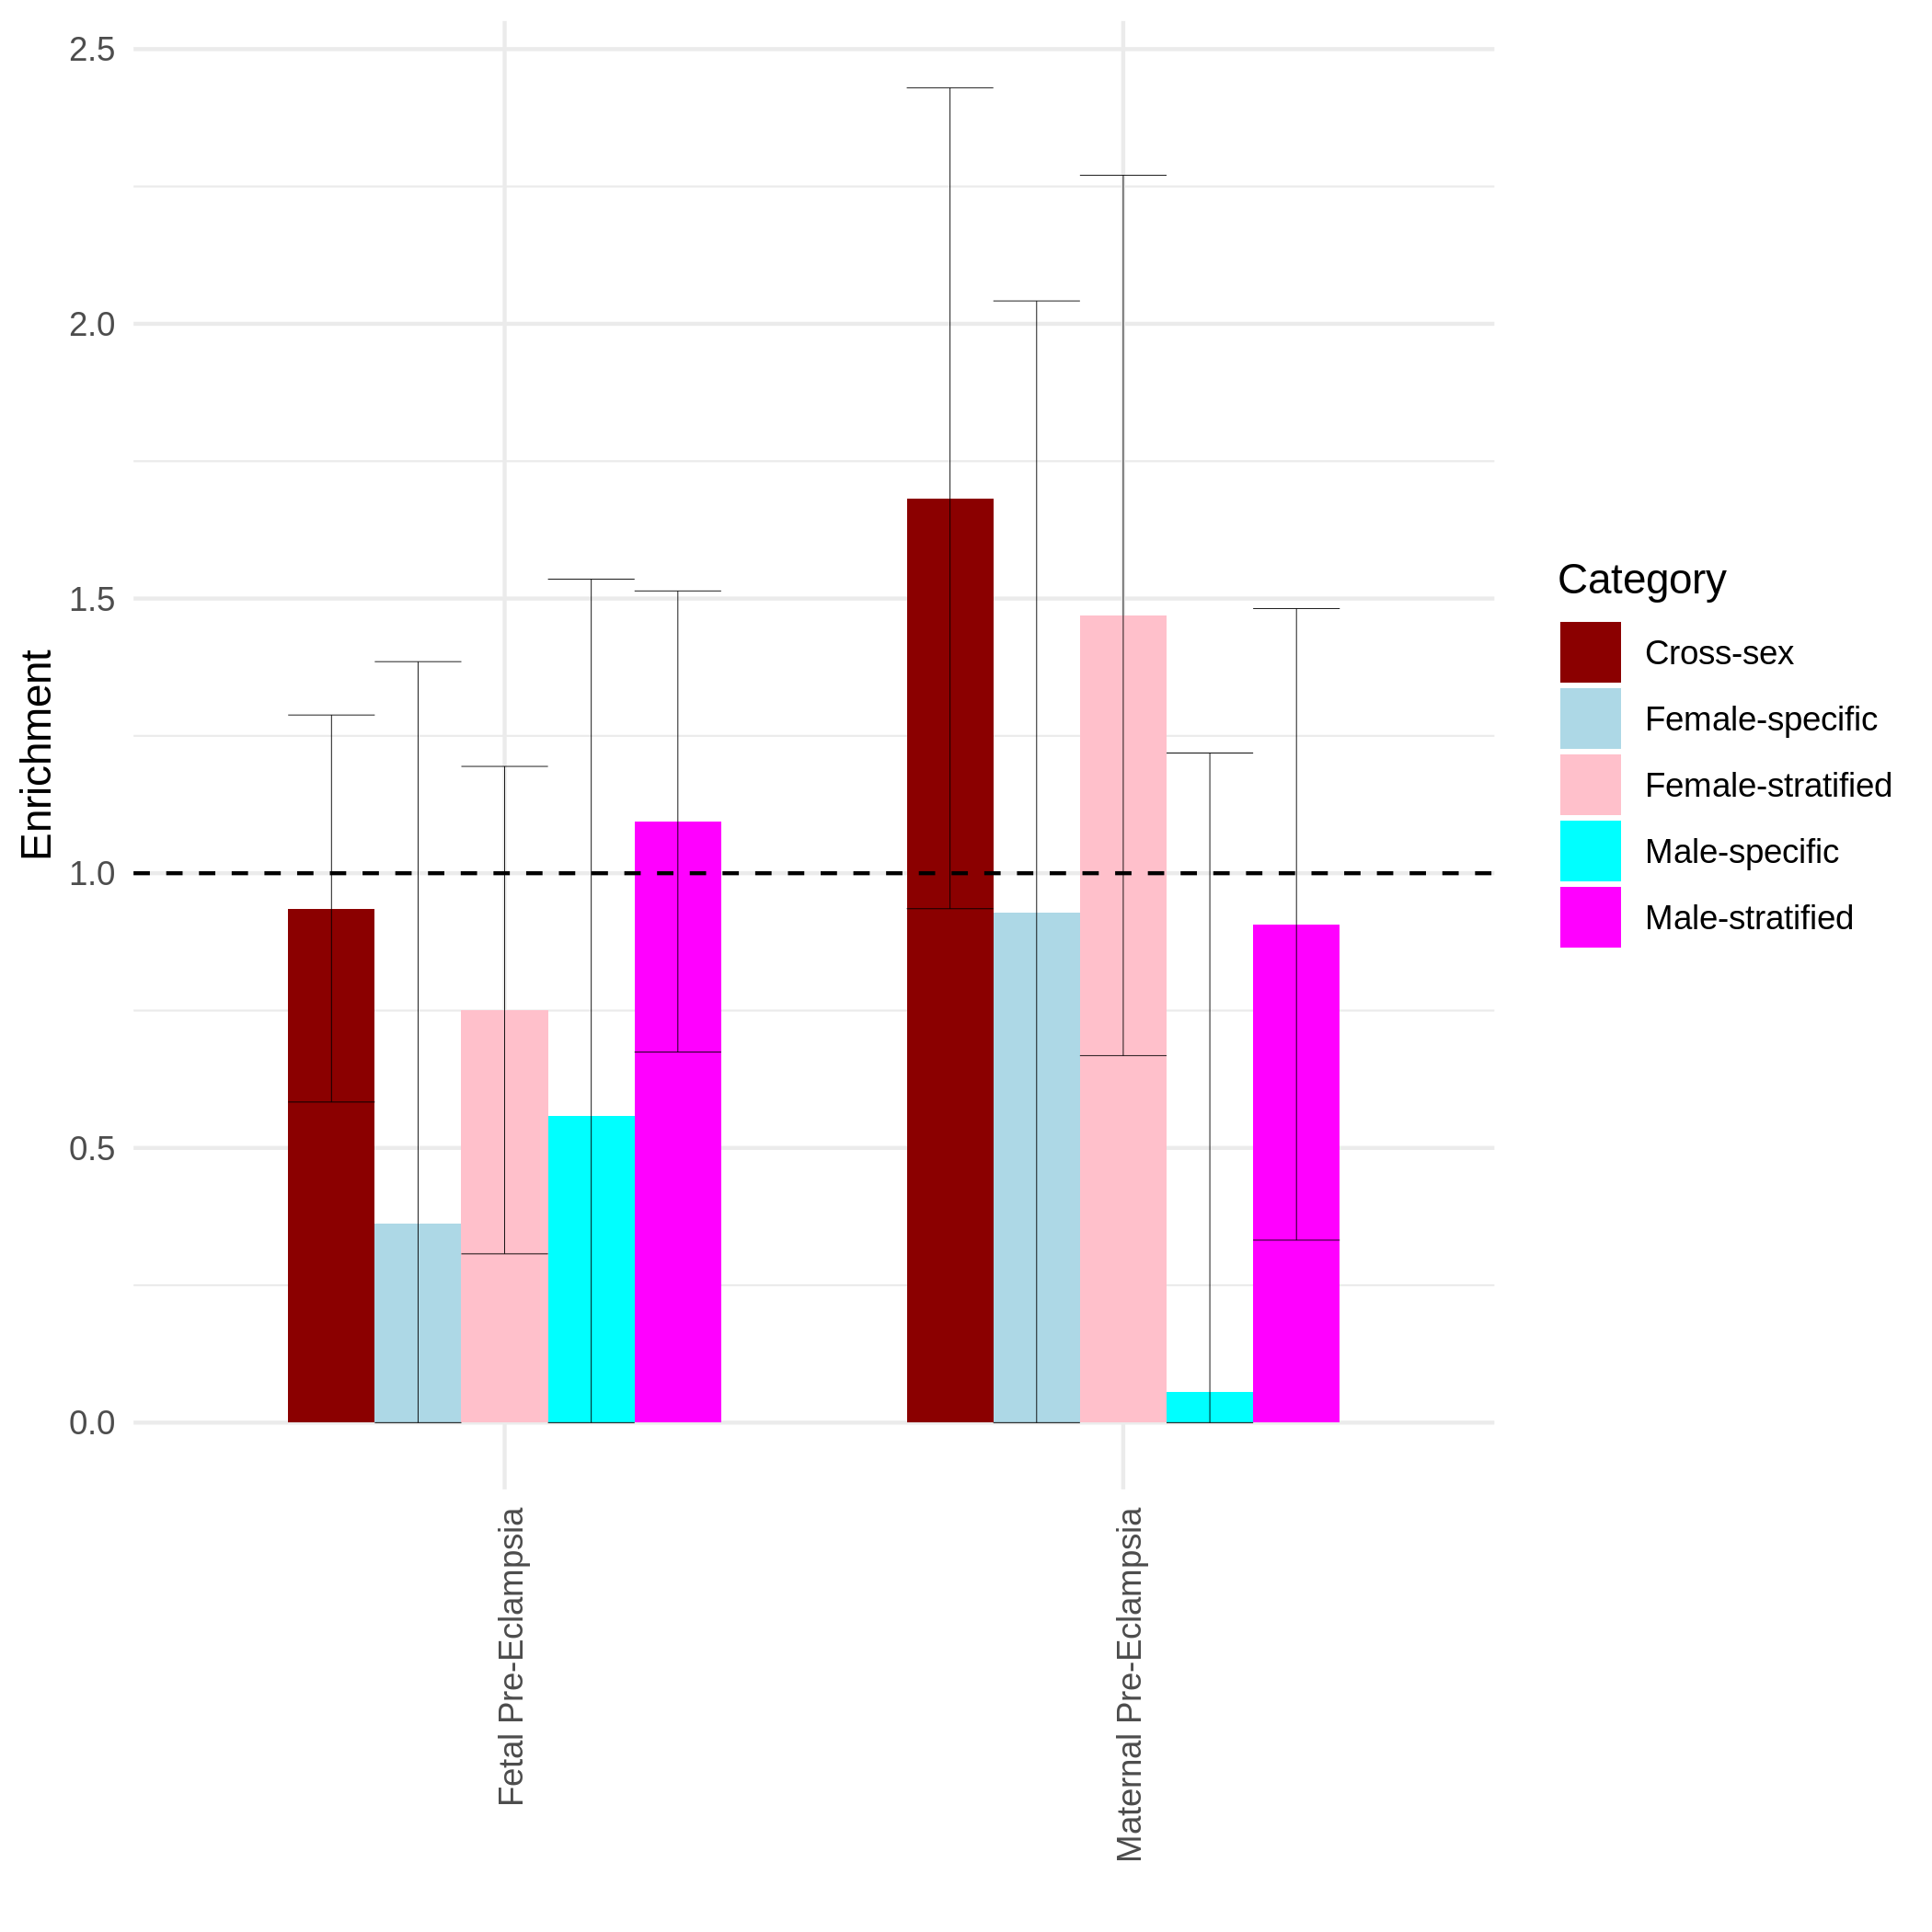

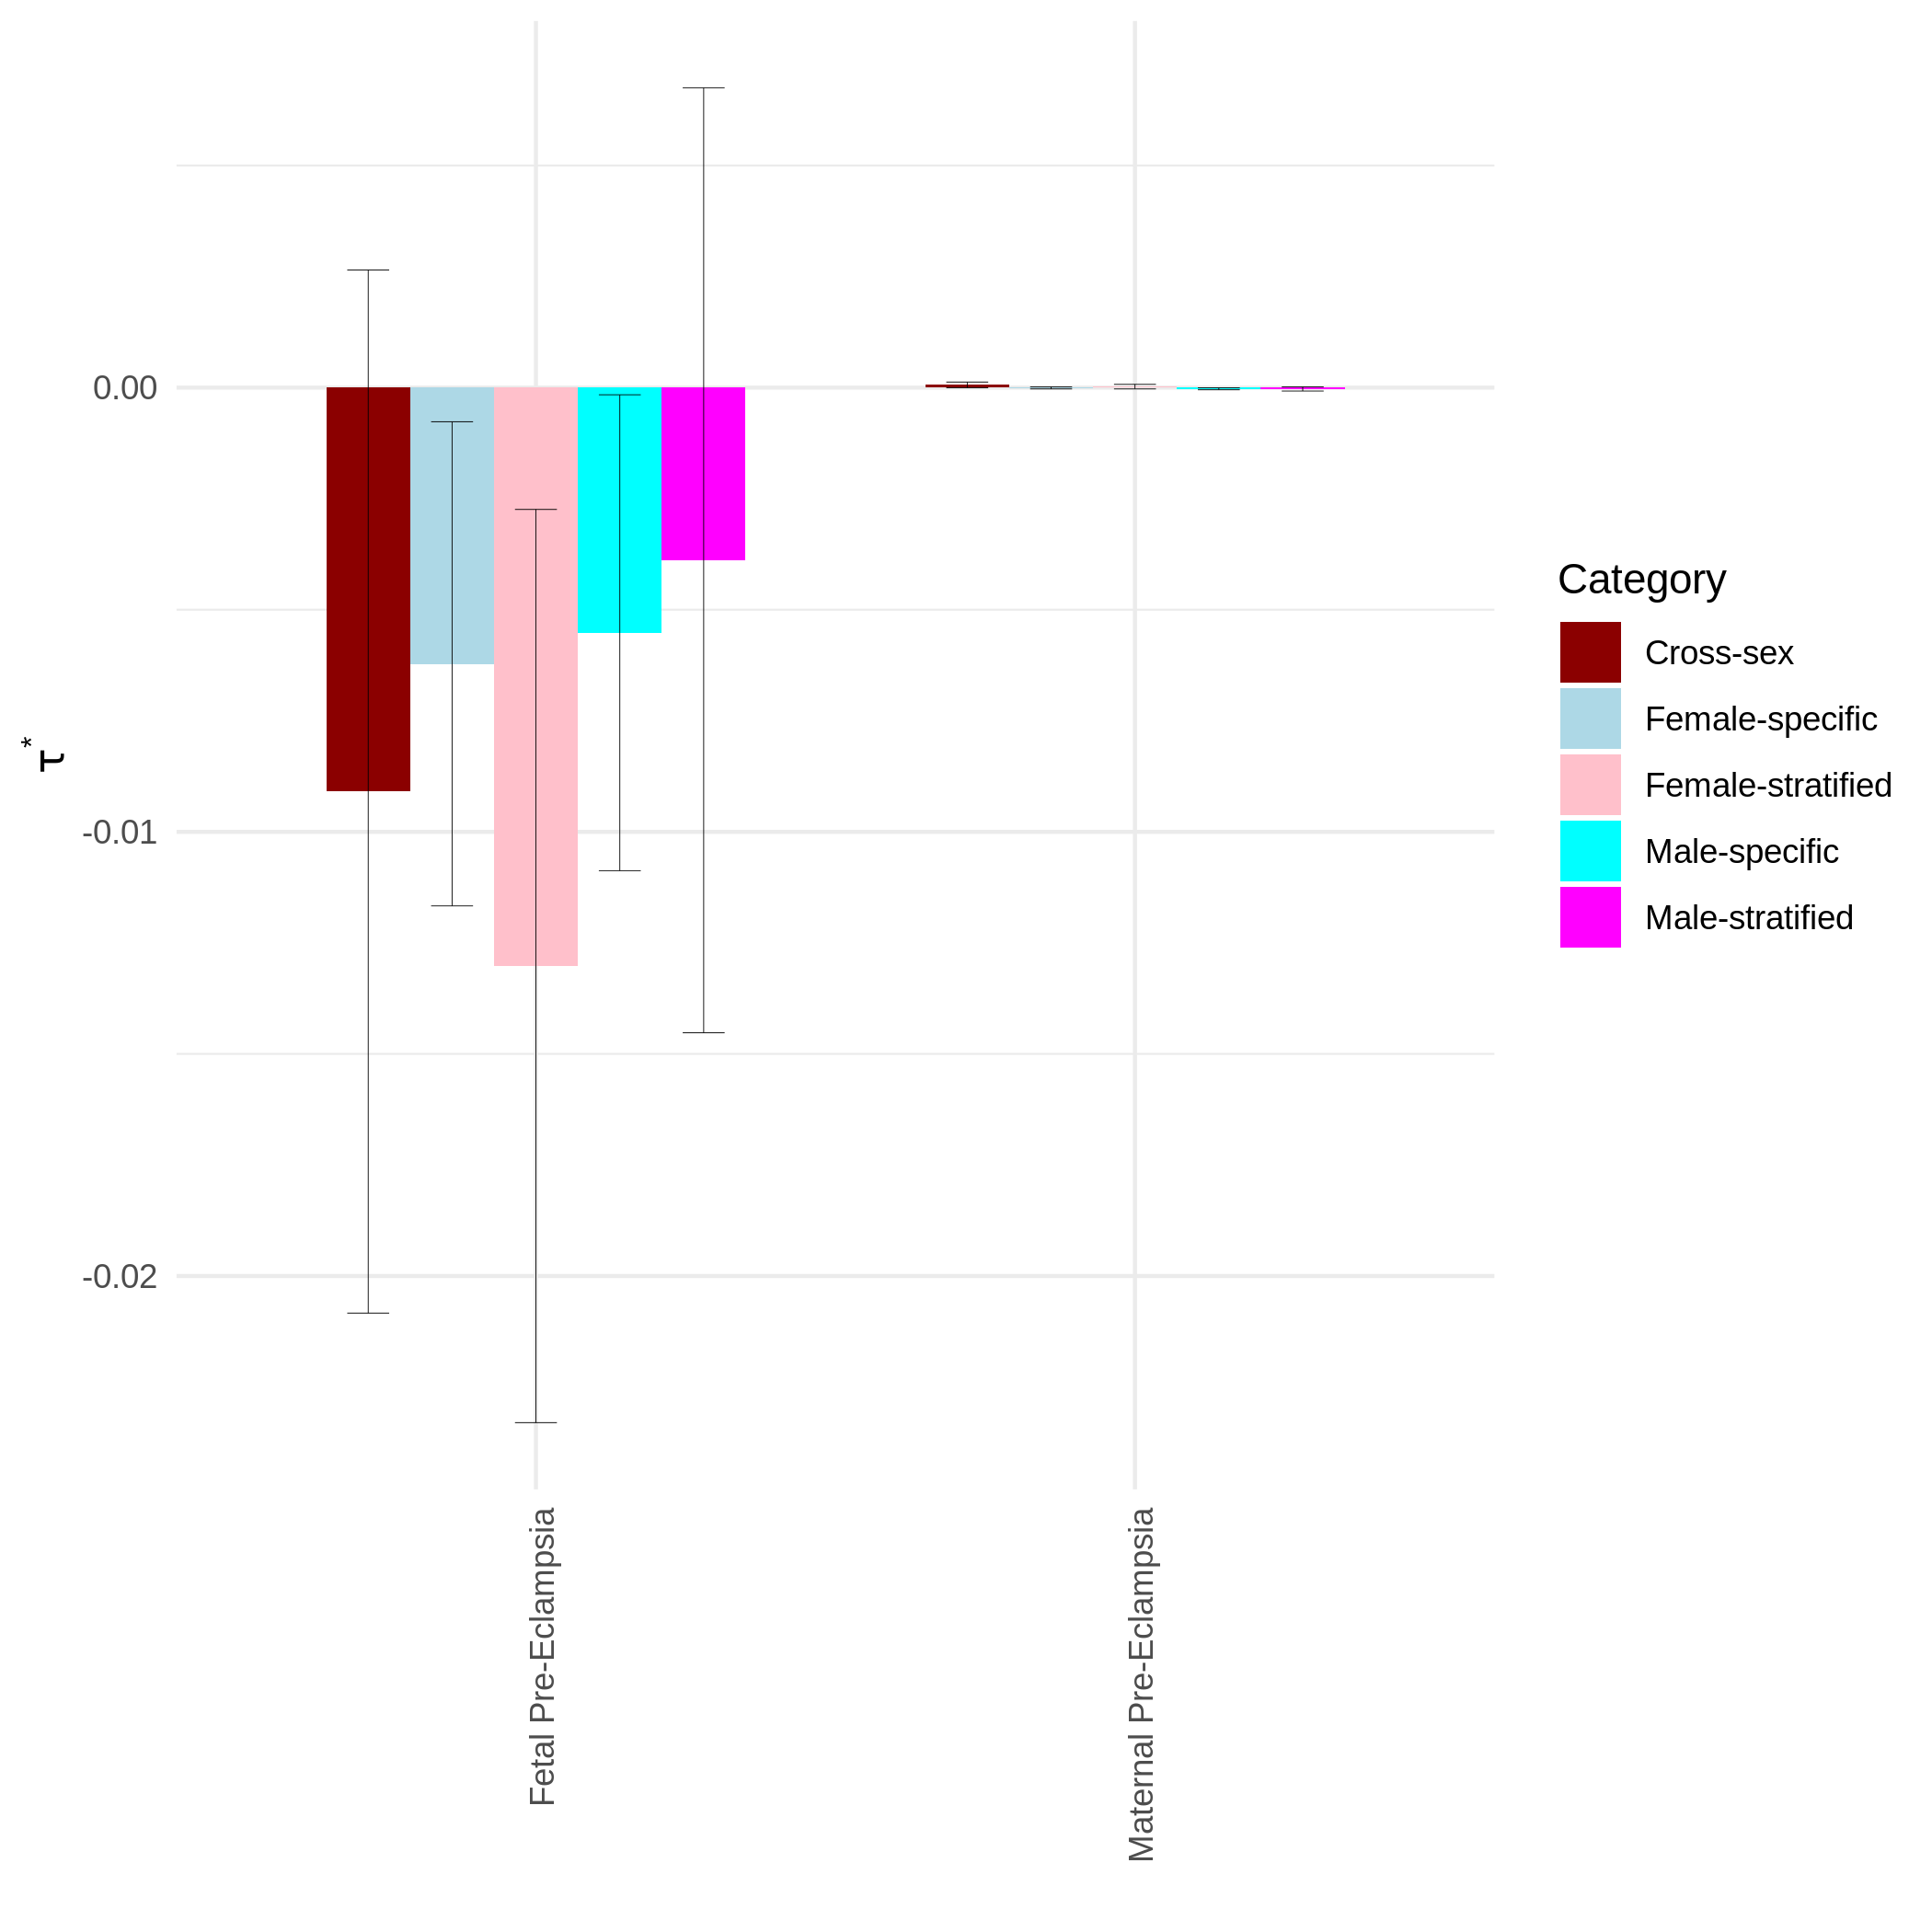

In [49]:
to_plot <- all_heritability %>% filter(grepl("Pre-Eclampsia$",GWAS),annotation=="Cred95FDR")
to_plot[,`:=`(
    sig_tau = p.adjust(tau_p,method="BH") <0.05,
    sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05
)]
to_plot[,`:=`(
    sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,
    sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 
),by="GWAS"]
head(to_plot)
ggplot(
    to_plot,
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    to_plot,
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width / 2 ,size=0.1,position=pos) + 
    scale_fill_manual(values=c("dark red","light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))

Warning message:
“Removed
32 rows
containing
missing
values
(geom_text).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_col).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_text).”
Warning message:
“Removed
32 rows
containing
missing
values
(geom_col).”


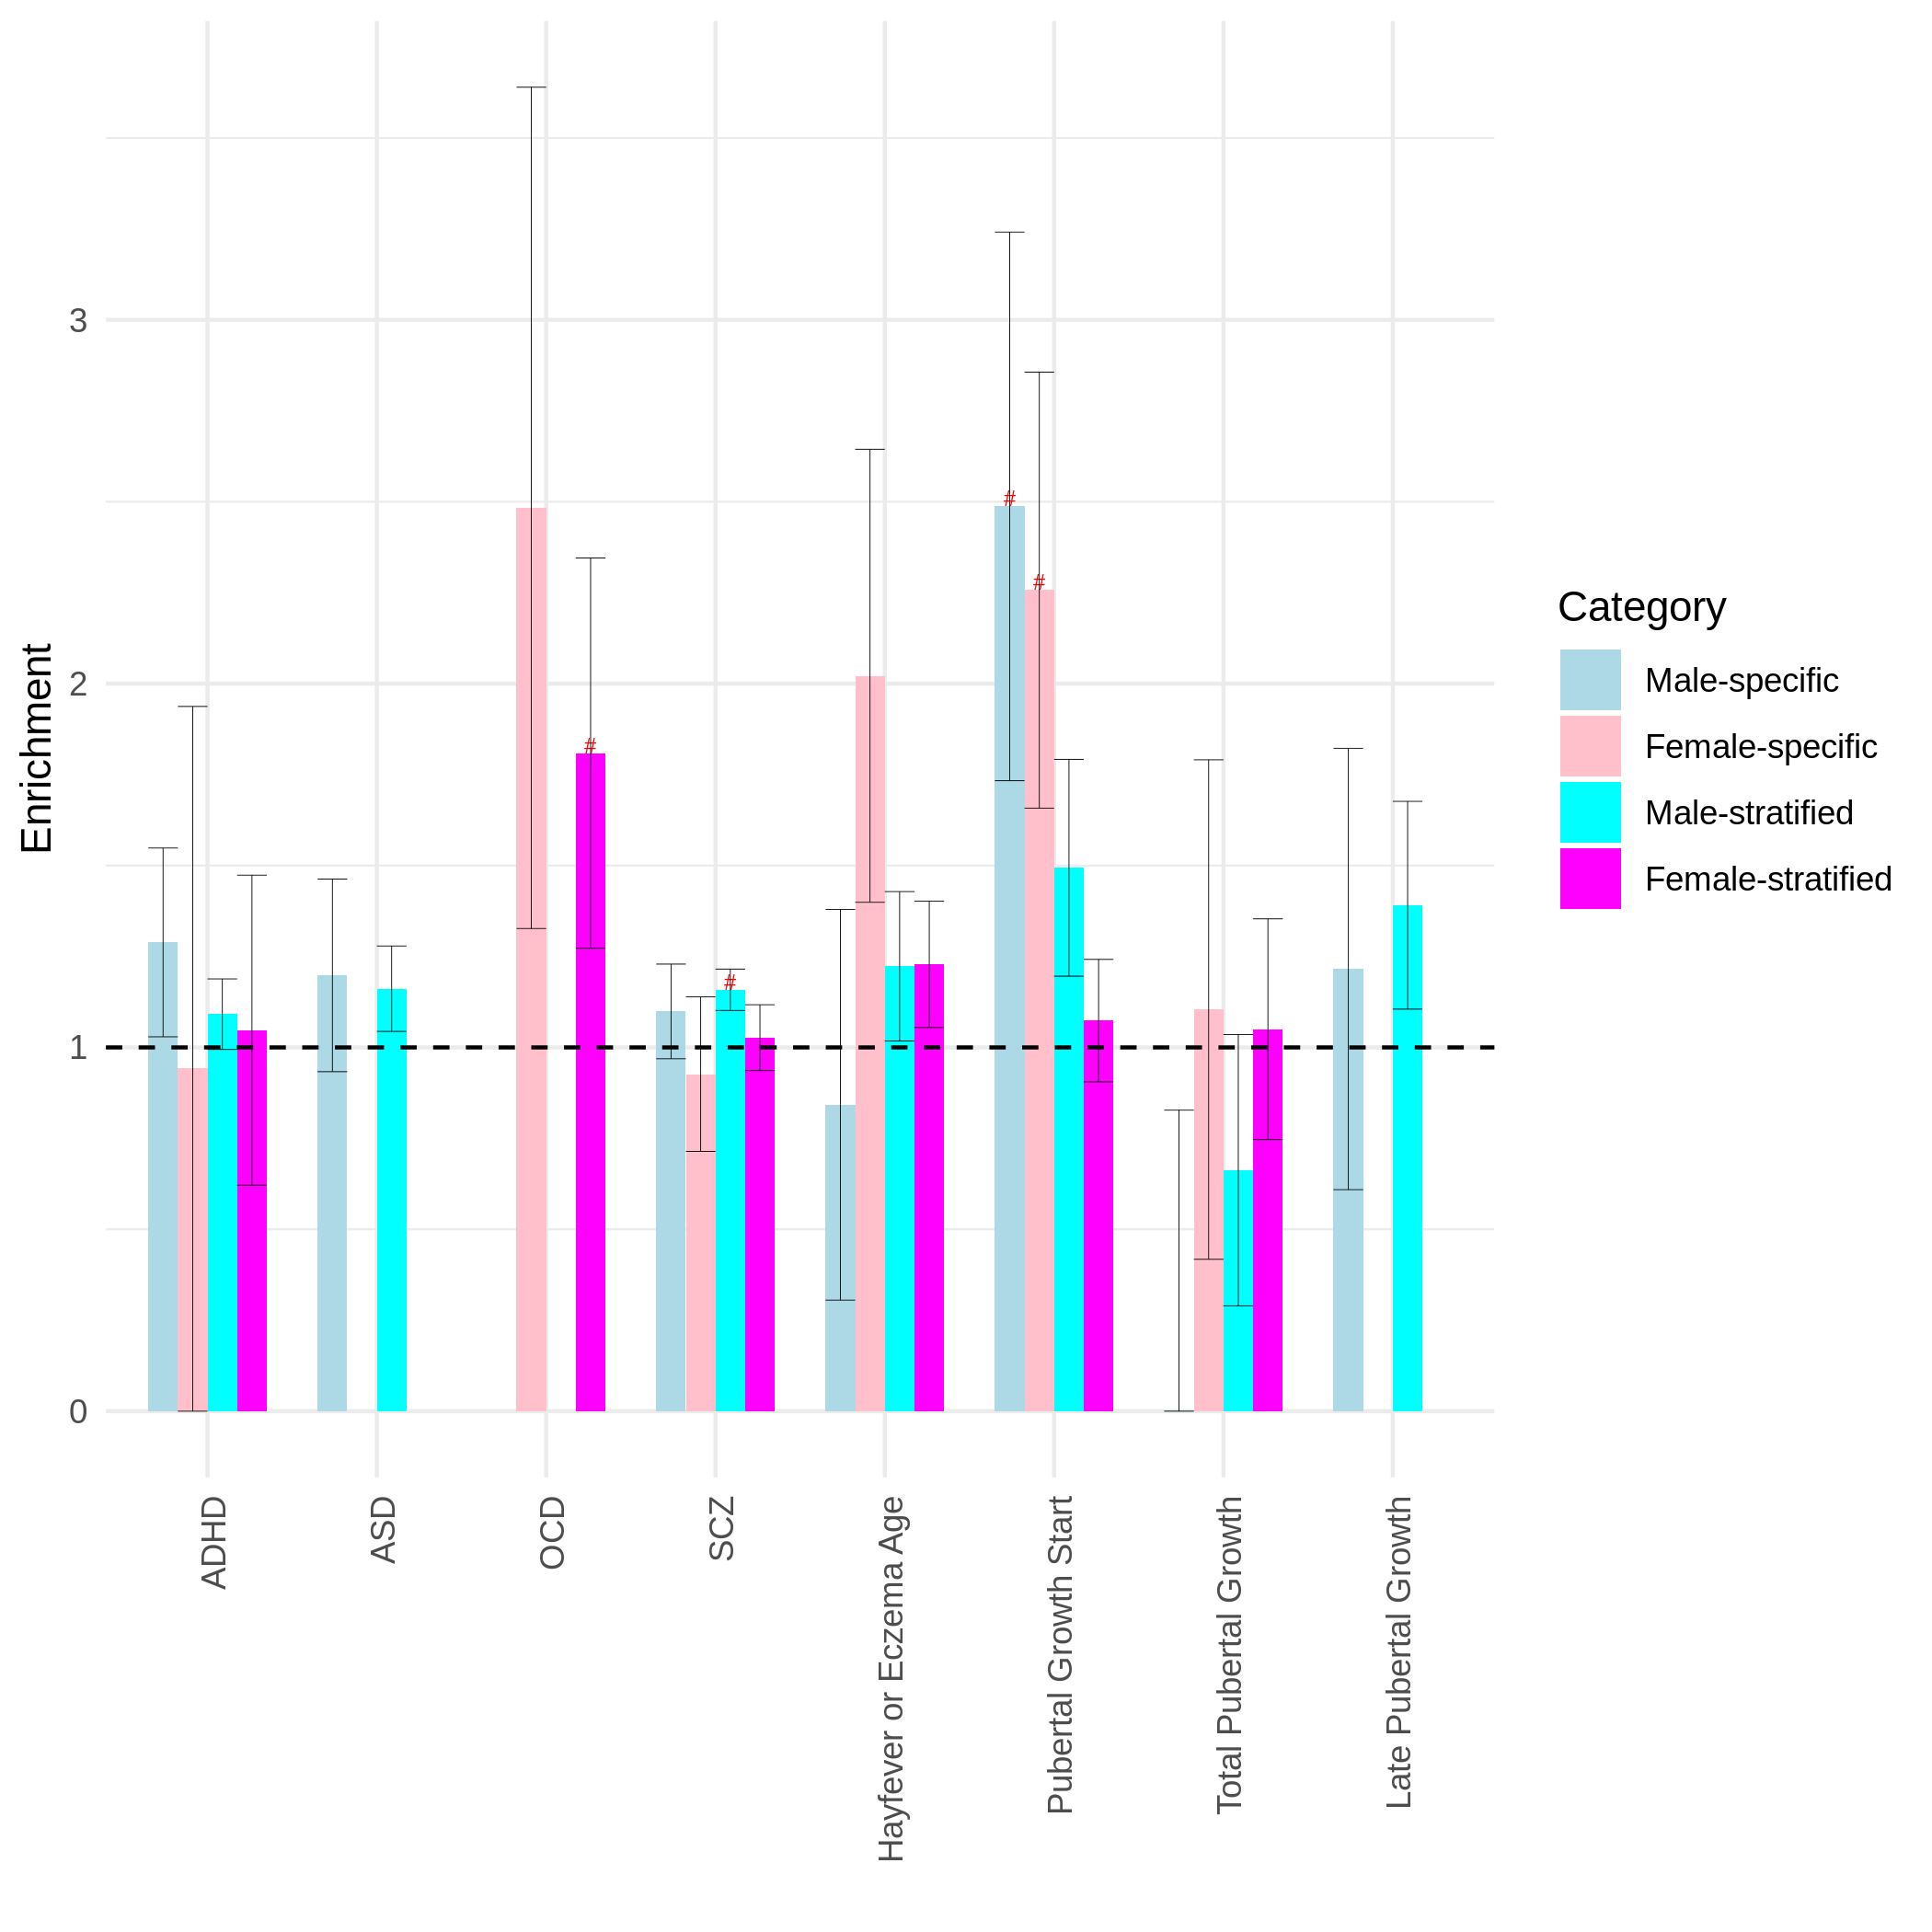

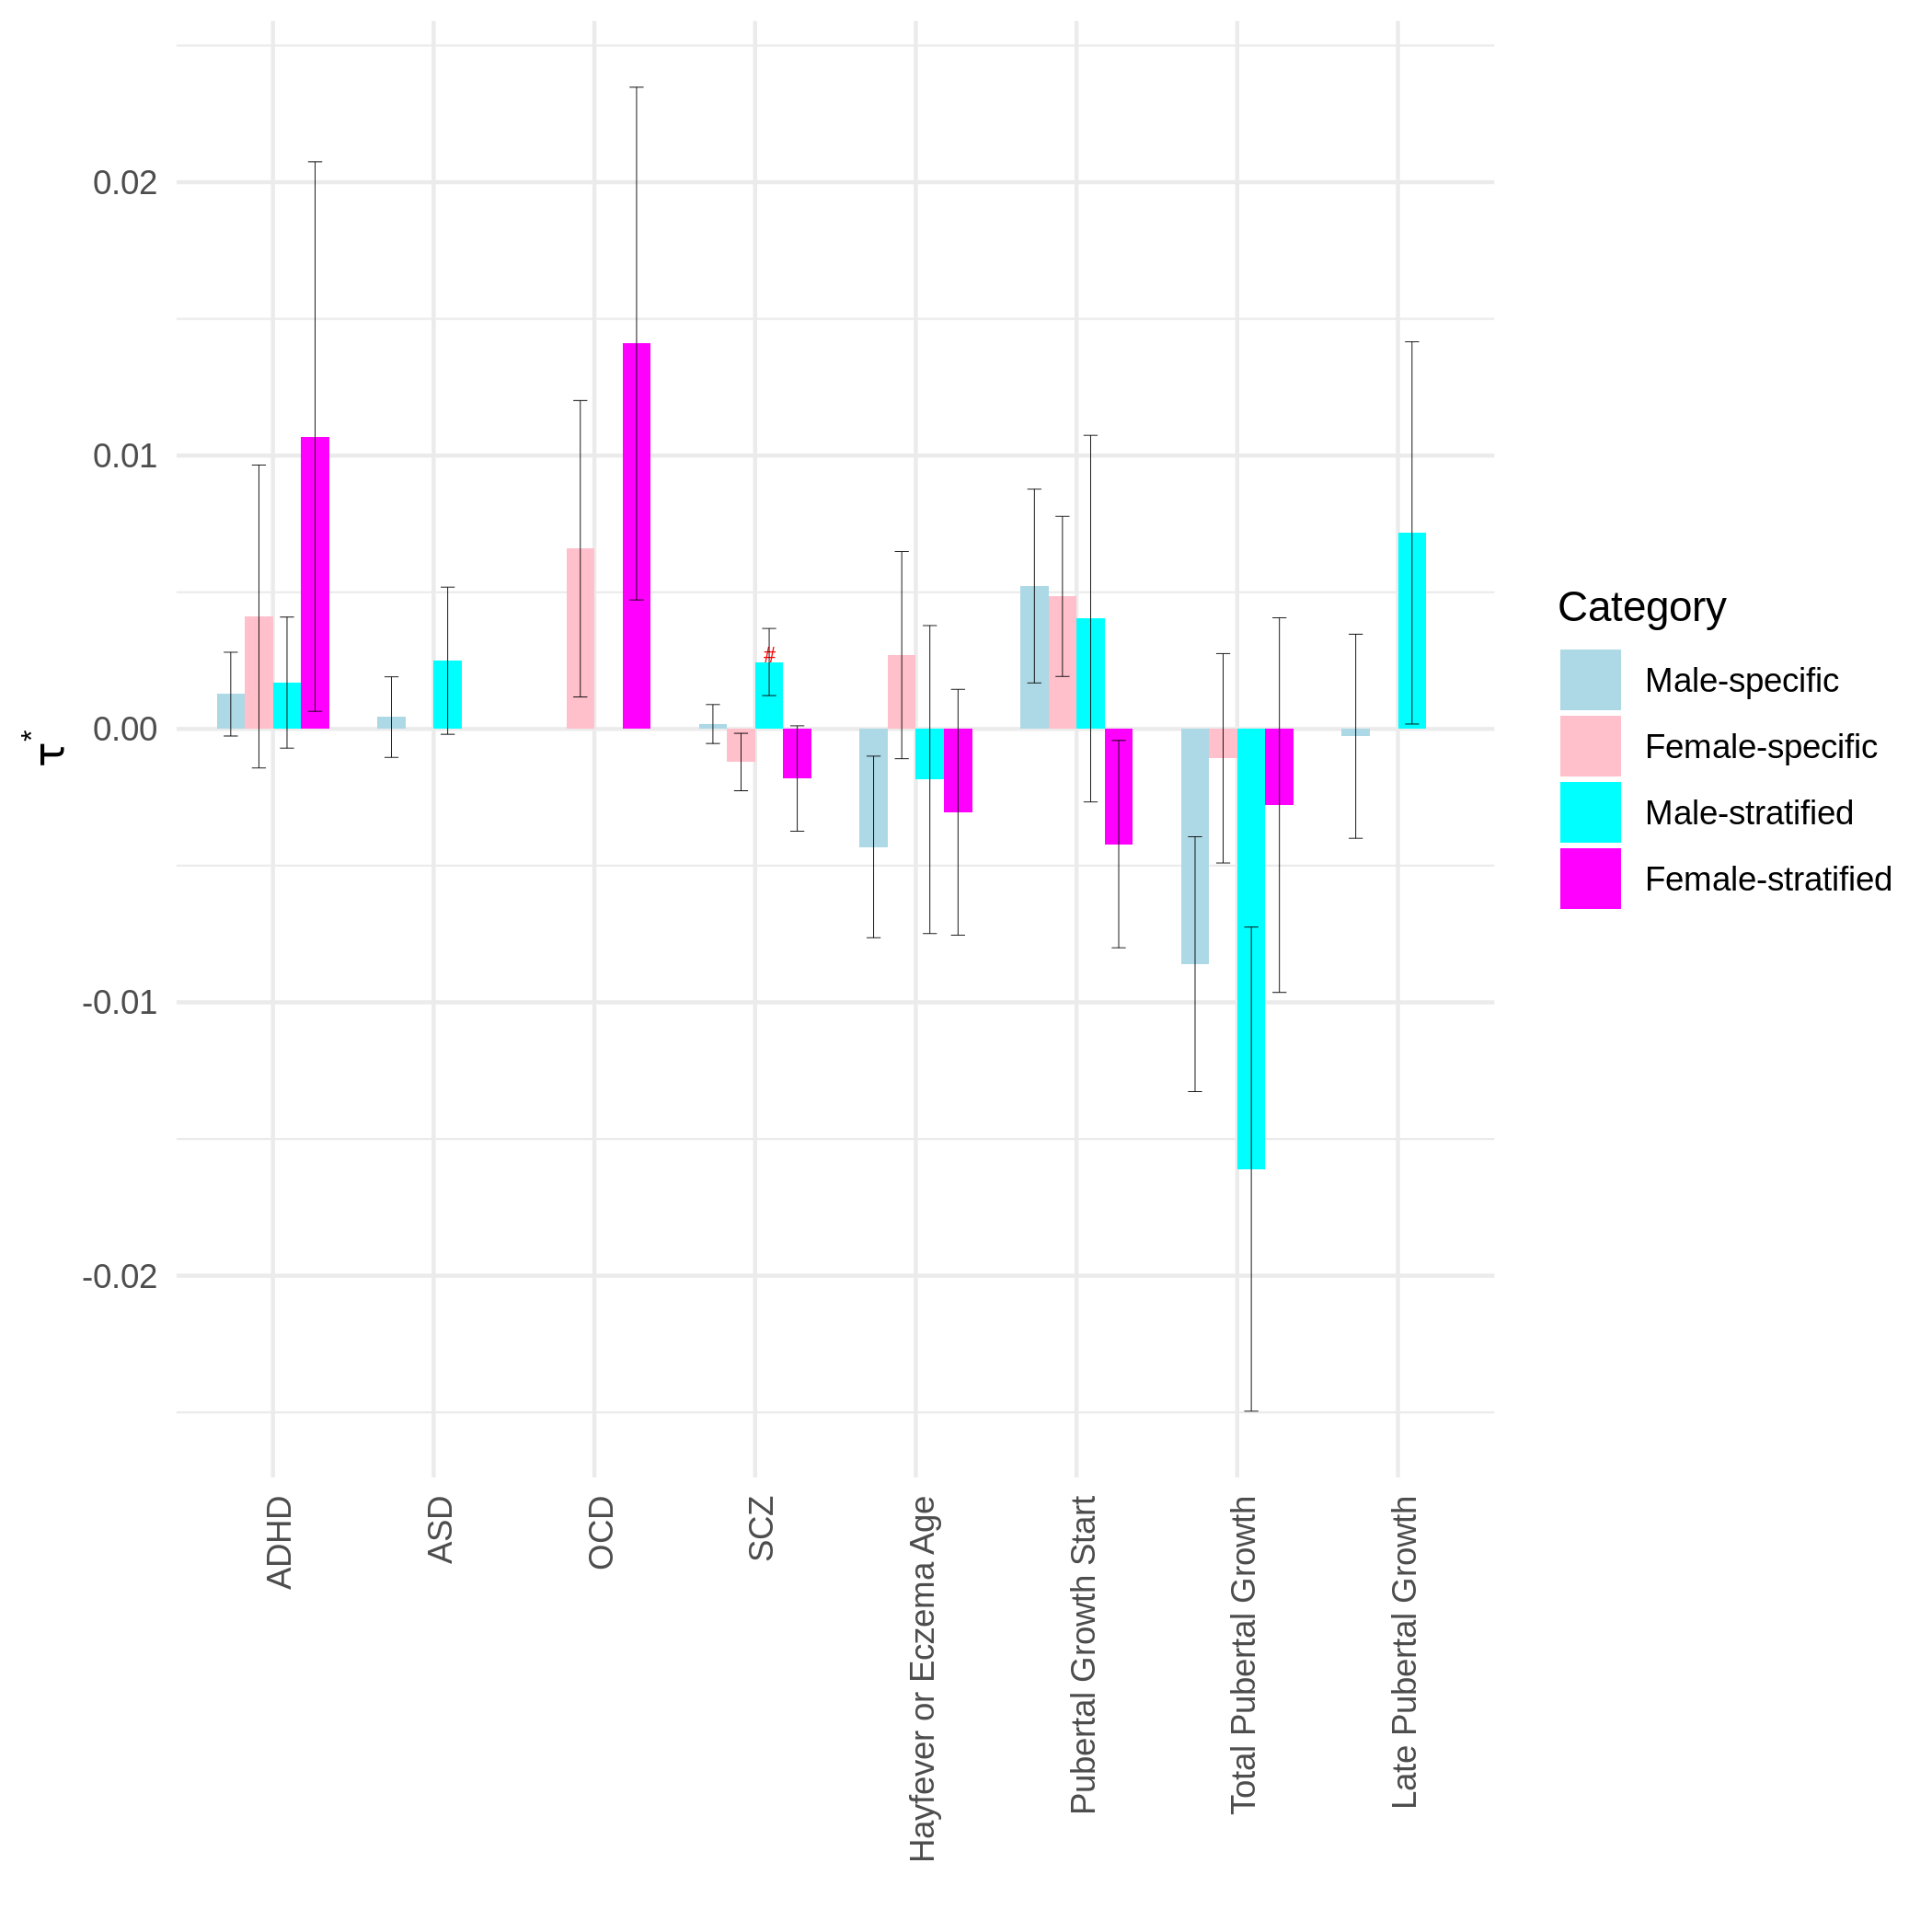

In [52]:
options(width= 10, repr.plot.height= 7, repr.plot.res = 300)
sex_order <- unique(gsub("\\(raw\\)|\\(norm\\)","",GWAS_key))

combined_df <- all_heritability %>%
    filter(GWAS %in% selected_GWAS,annotation == "Cred95FDR") %>%
    mutate(
        normalization = ifelse(grepl("norm",GWAS),"norm",ifelse(grepl("raw",GWAS),"raw","None")),
        GWAS=gsub("\\(raw\\)|\\(norm\\)","",GWAS)
    )
combined_df <- combined_df[,.SD[which.max(h2 / h2_std_error)],by=c("GWAS","Category")]

filtered <- combined_df[        
        (grepl("Male-specific",Category) & grepl("Male",GWAS)) |
        (grepl("Female-specific",Category) & grepl("Female",GWAS))
]

to_plot_specific <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-specific","Female-specific")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_specific[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]

filtered <- combined_df[        
        (grepl("Male-stratified",Category) & grepl("Male",GWAS)) |
        (grepl("Female-stratified",Category) & grepl("Female",GWAS))

]

to_plot_stratified <- filtered[,
    .(
        GWAS = factor(GWAS,levels = sex_order),
        Enrichment,
        Category=factor(Category,levels=c("Male-stratified","Female-stratified")),
        Enrichment_std_error,
        Enrichment_p,
        tau,
        tau_std_error,
        tau_p,
        sig_tau = p.adjust(tau_p,method="BH") <0.05,
        sig_enrich = p.adjust(Enrichment_p,method="BH") <0.05,
                h2,
        h2_std_error
    )
]
to_plot_stratified[,`:=`(sig_enrich_GWAS = p.adjust(Enrichment_p,method="BH") < 0.05,sig_tau_GWAS = p.adjust(tau_p,method="BH") < 0.05 ),by="GWAS"]



bar_width <- 0.7
pos <- position_dodge(width=bar_width)
final_plot_df <- rbind(to_plot_specific,to_plot_stratified) %>%
    mutate(GWAS = gsub(" Males| Females","",GWAS)) %>%
    mutate(GWAS = factor(GWAS,levels=sex_order))
final_plot_df[Enrichment < 0, c("Enrichment","Enrichment_std_error","sig_enrich","sig_enrich_GWAS")] <- NA
ggplot(
    final_plot_df %>% group_by(GWAS) %>% complete(Category,Enrichment=NA,Enrichment_std_error=NA),
    aes(
        GWAS,
        Enrichment,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= ifelse(Enrichment - Enrichment_std_error < 0,0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width,size=0.1,position=pos) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values=c("light blue","pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))
ggplot(
    final_plot_df %>% group_by(GWAS) %>% complete(Category,tau=NA,tau_std_error=NA),
    aes(
        GWAS,
        tau,
        fill = Category,
        label=ifelse(sig_tau,"*",ifelse(sig_tau_GWAS,"#","")),
        ymin= tau - tau_std_error,
        ymax=tau + tau_std_error
    )
)+
    geom_text(color="red",position=pos,vjust=0,size=2)+
    geom_col(position=pos,width=bar_width)+
    geom_errorbar(width=bar_width / 2 ,size=0.1,position=pos) + 
    scale_fill_manual(values=c("light blue","pink","cyan","magenta"))+
    labs(y=bquote(tau^"*"),x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.75))

##  Meta-analysis across estimates

Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”


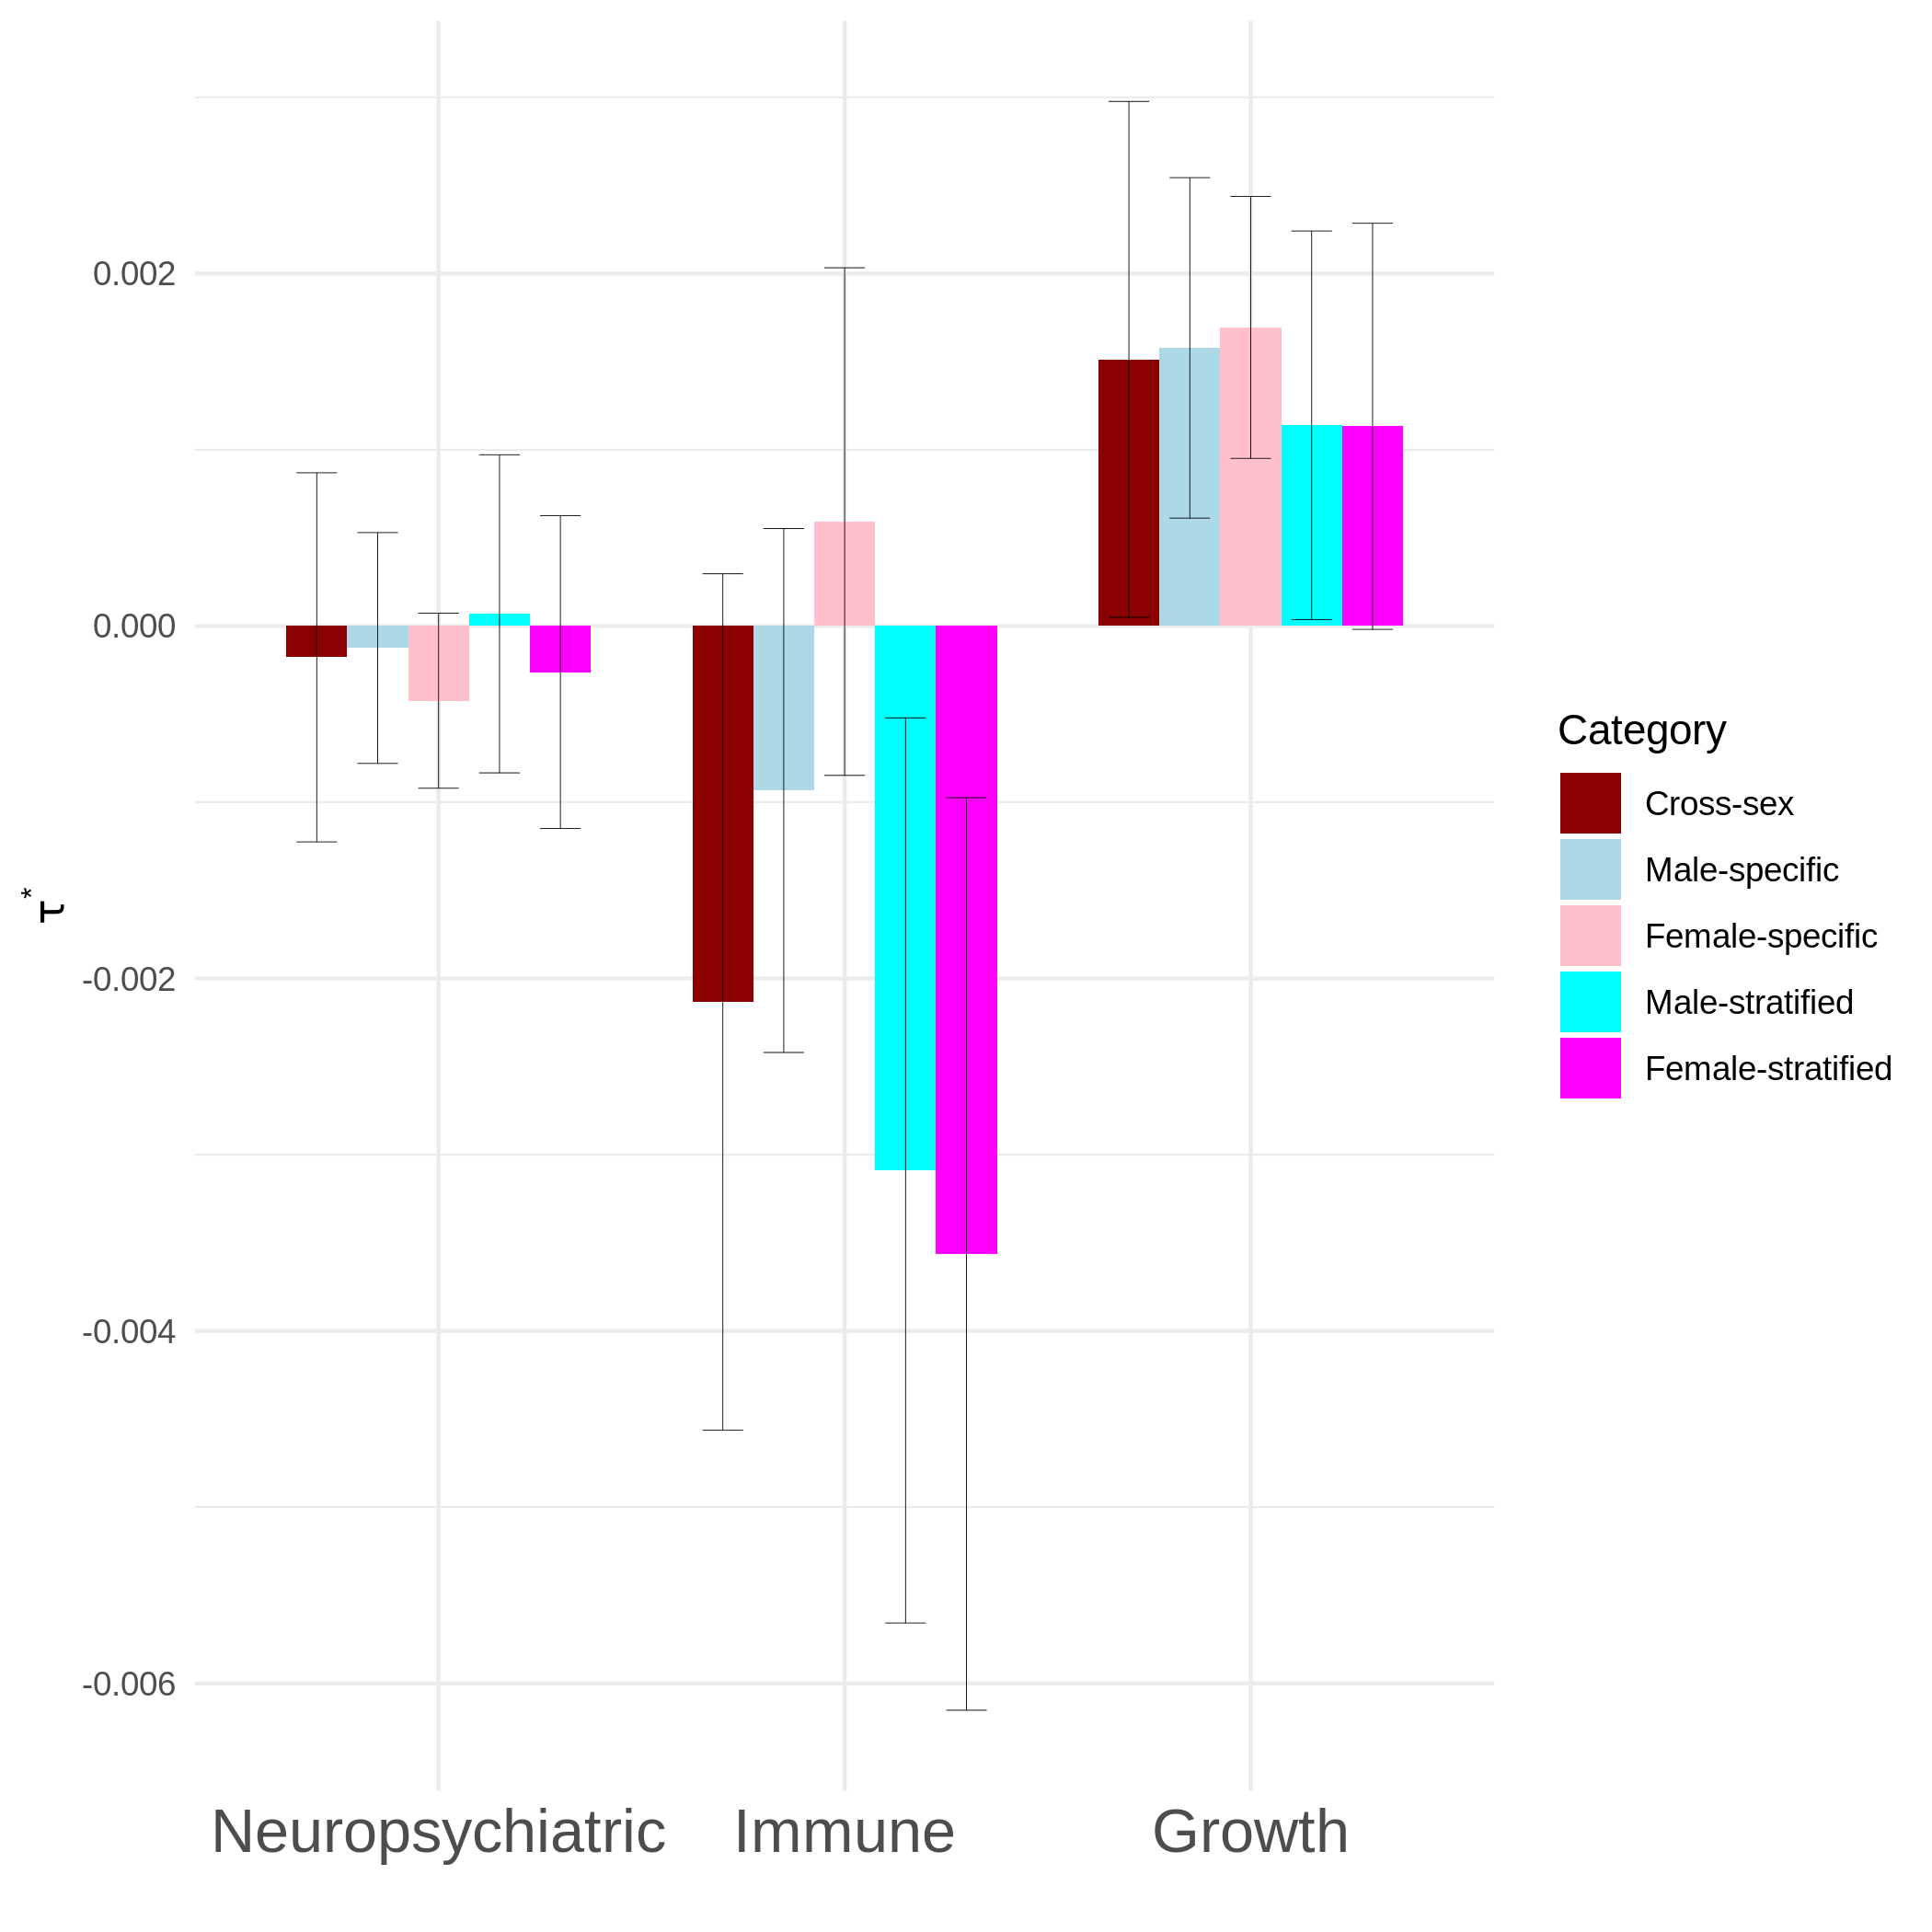

Warning message:
“Removed
15 rows
containing
missing
values
(geom_col).”


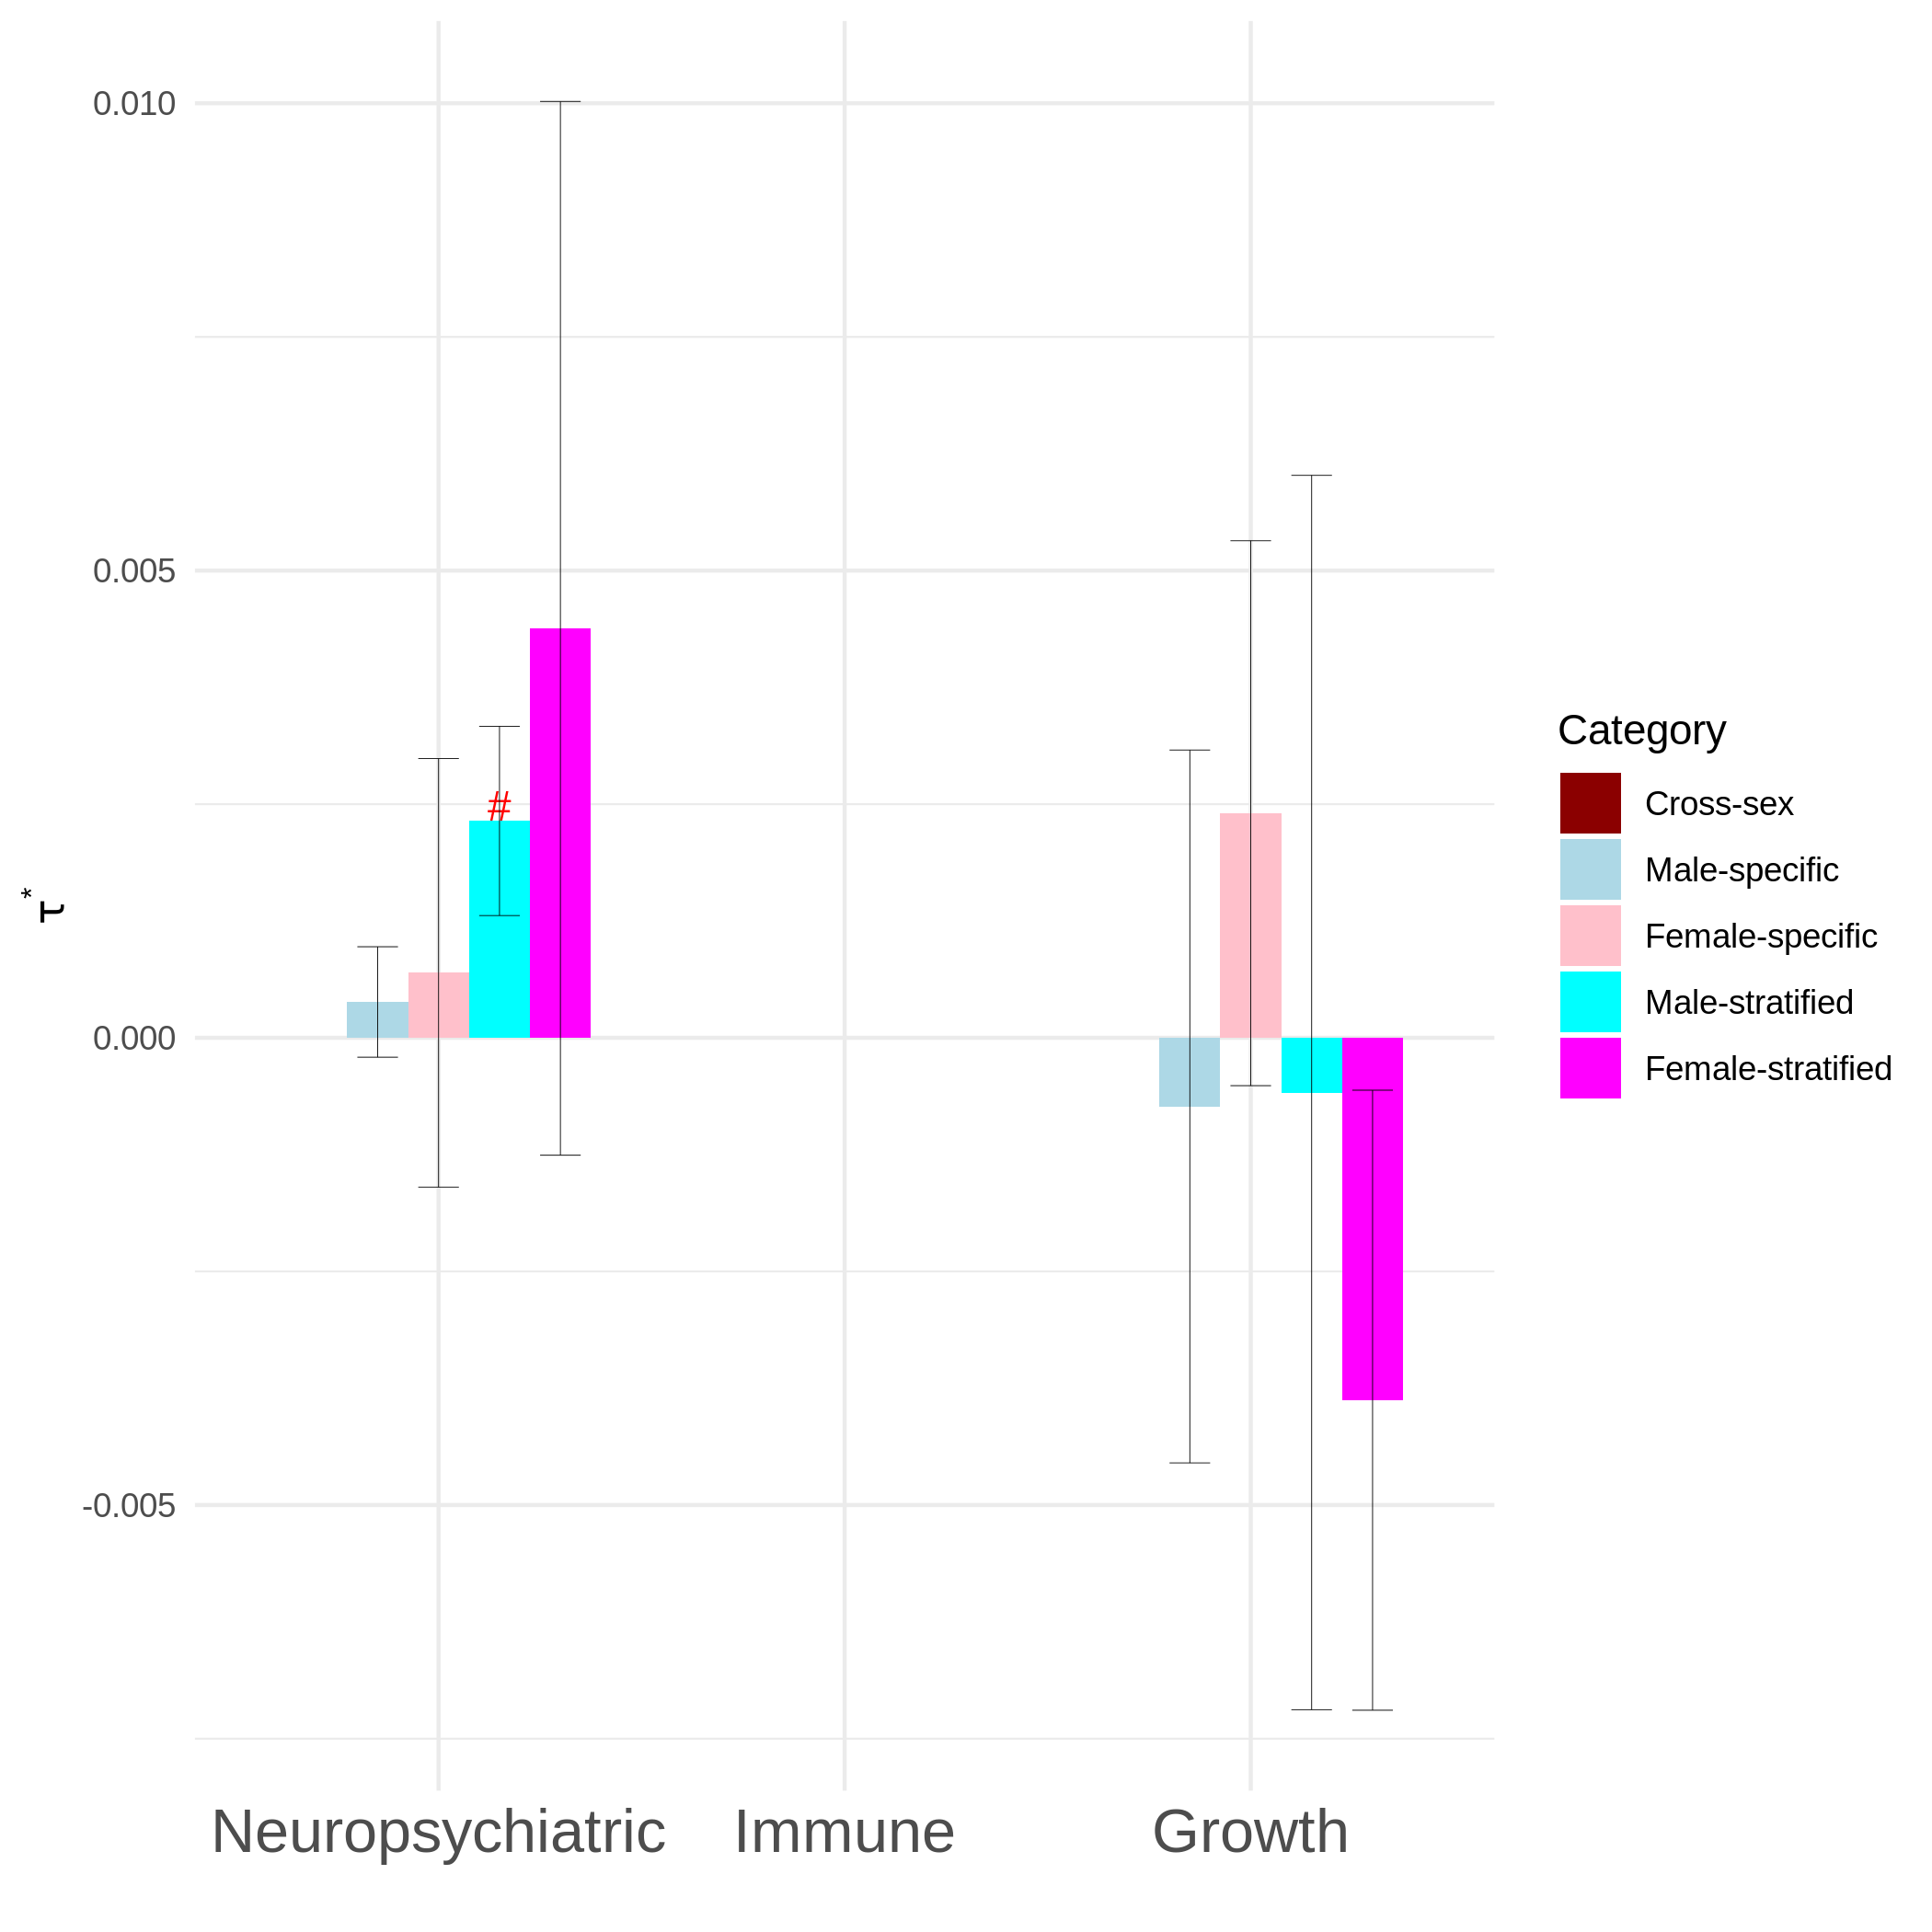

Warning message:
“Removed
19 rows
containing
missing
values
(geom_col).”


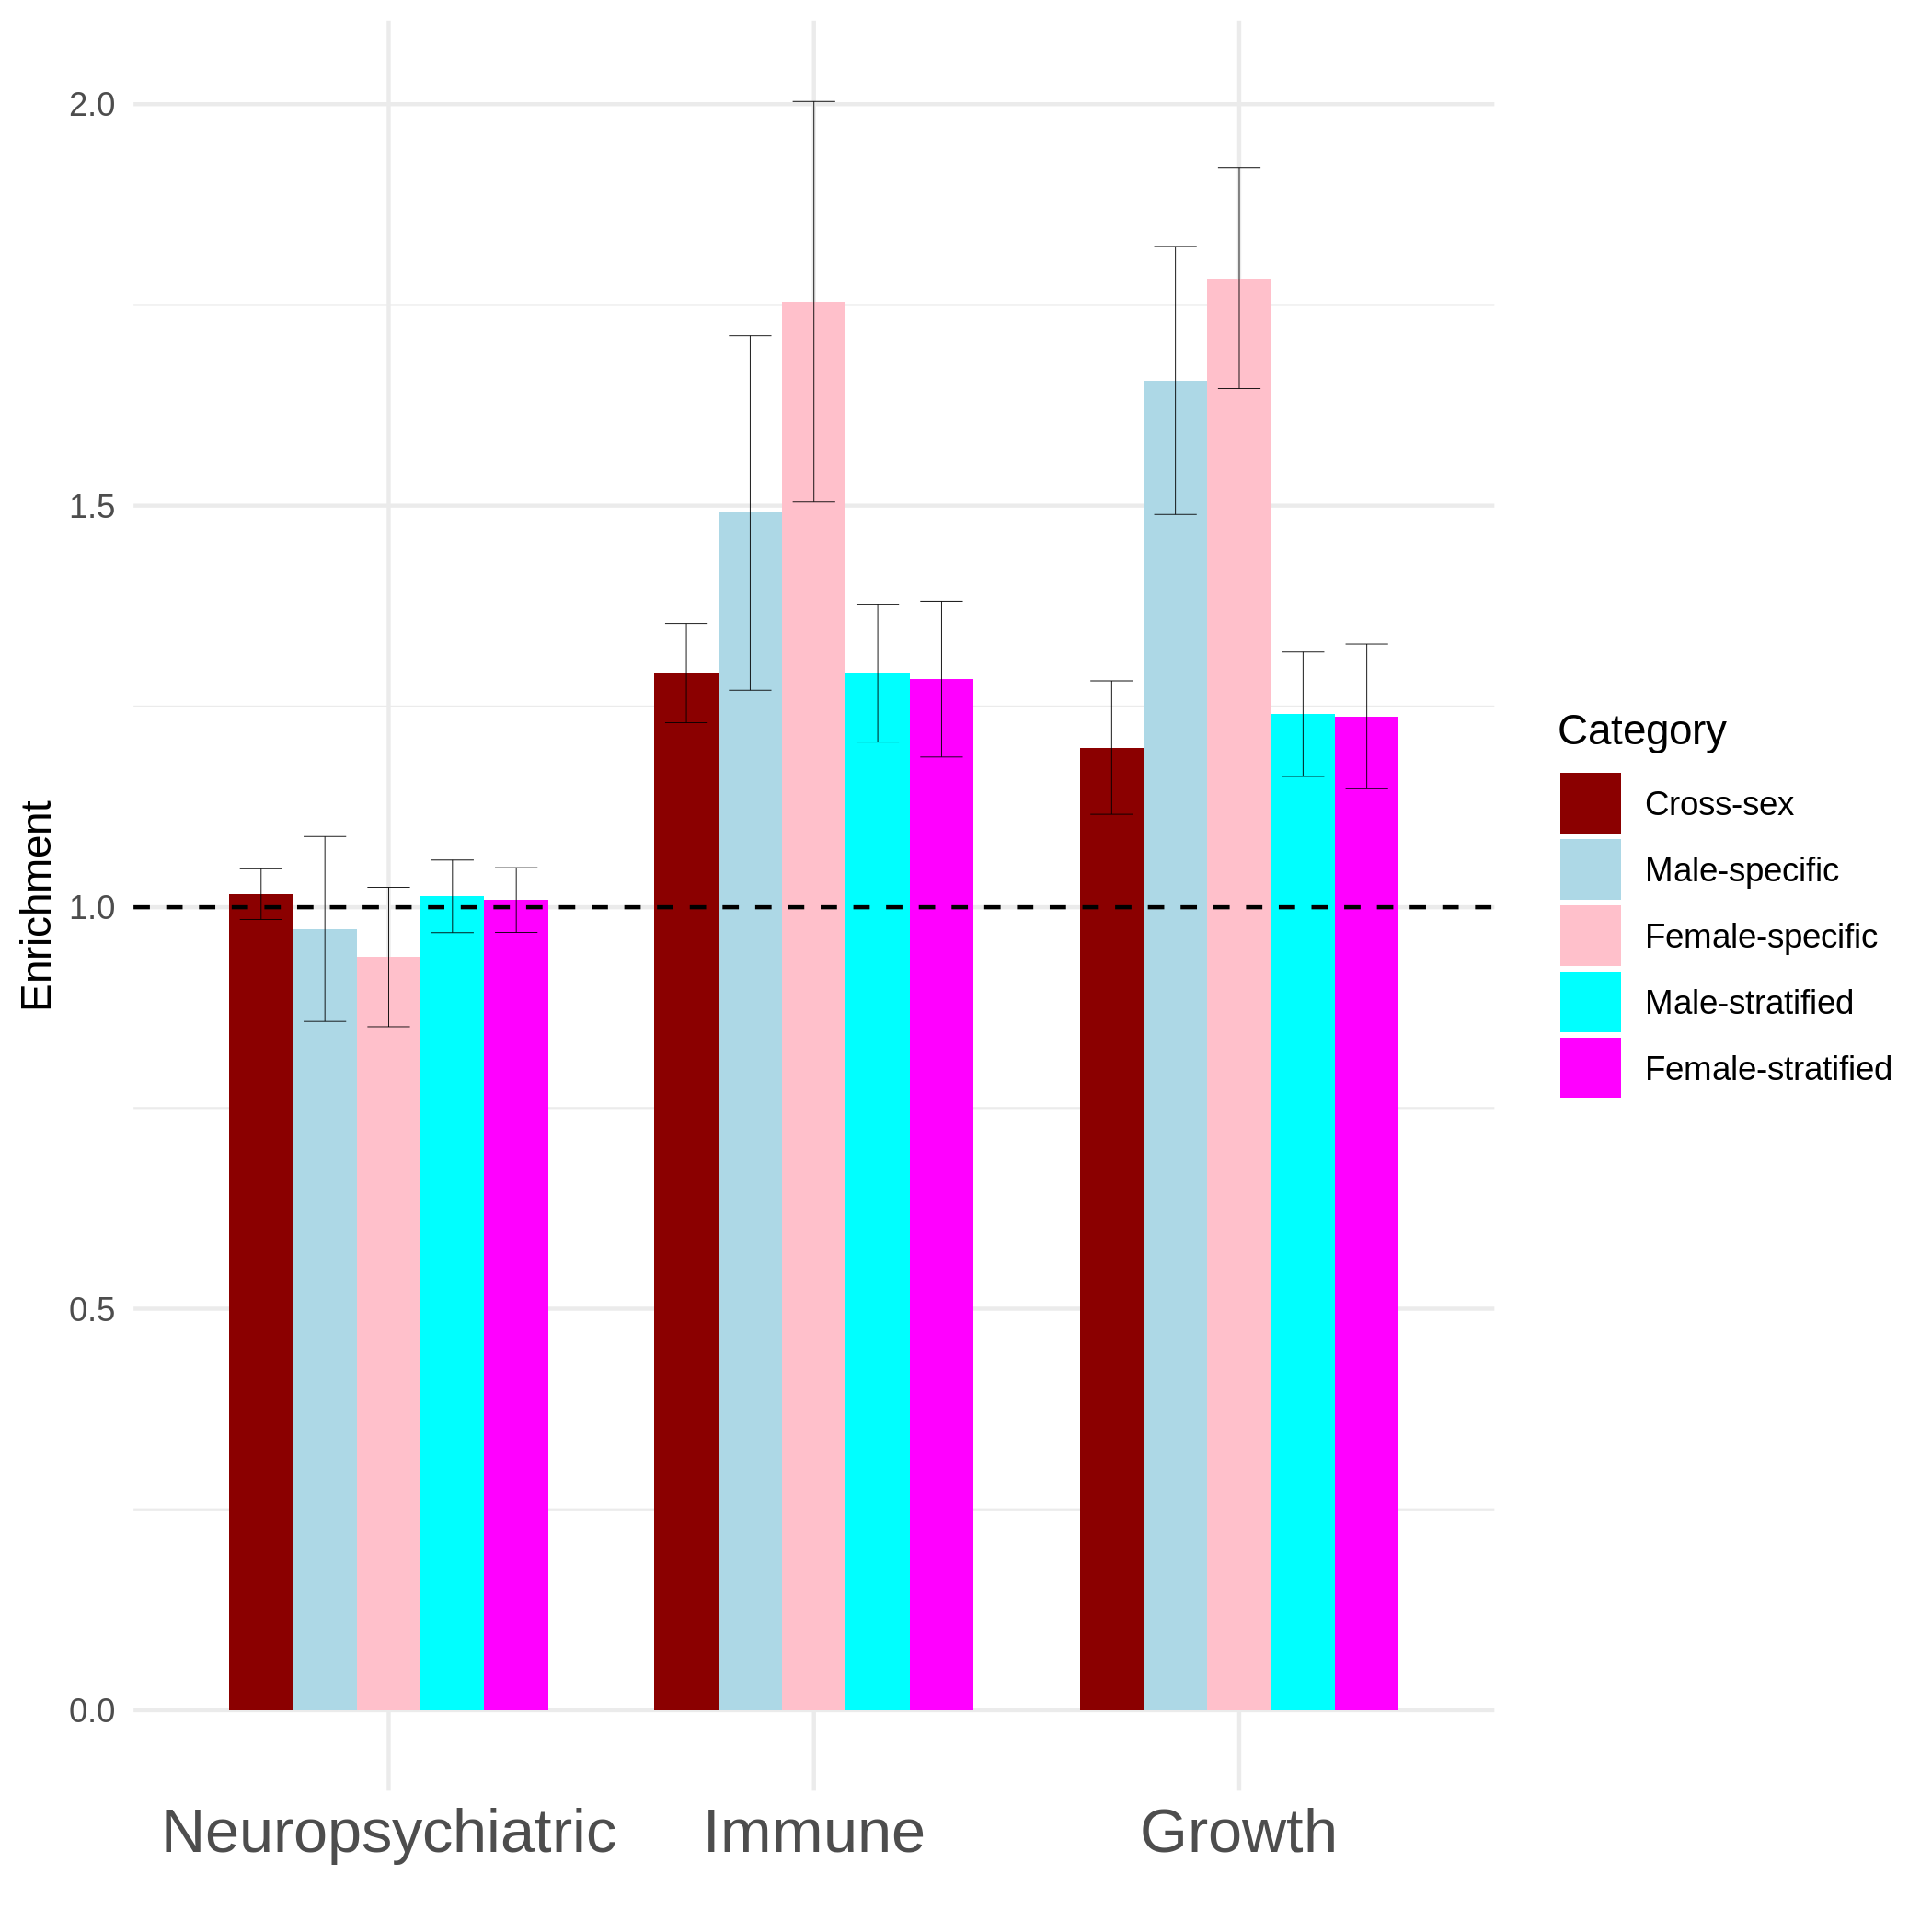

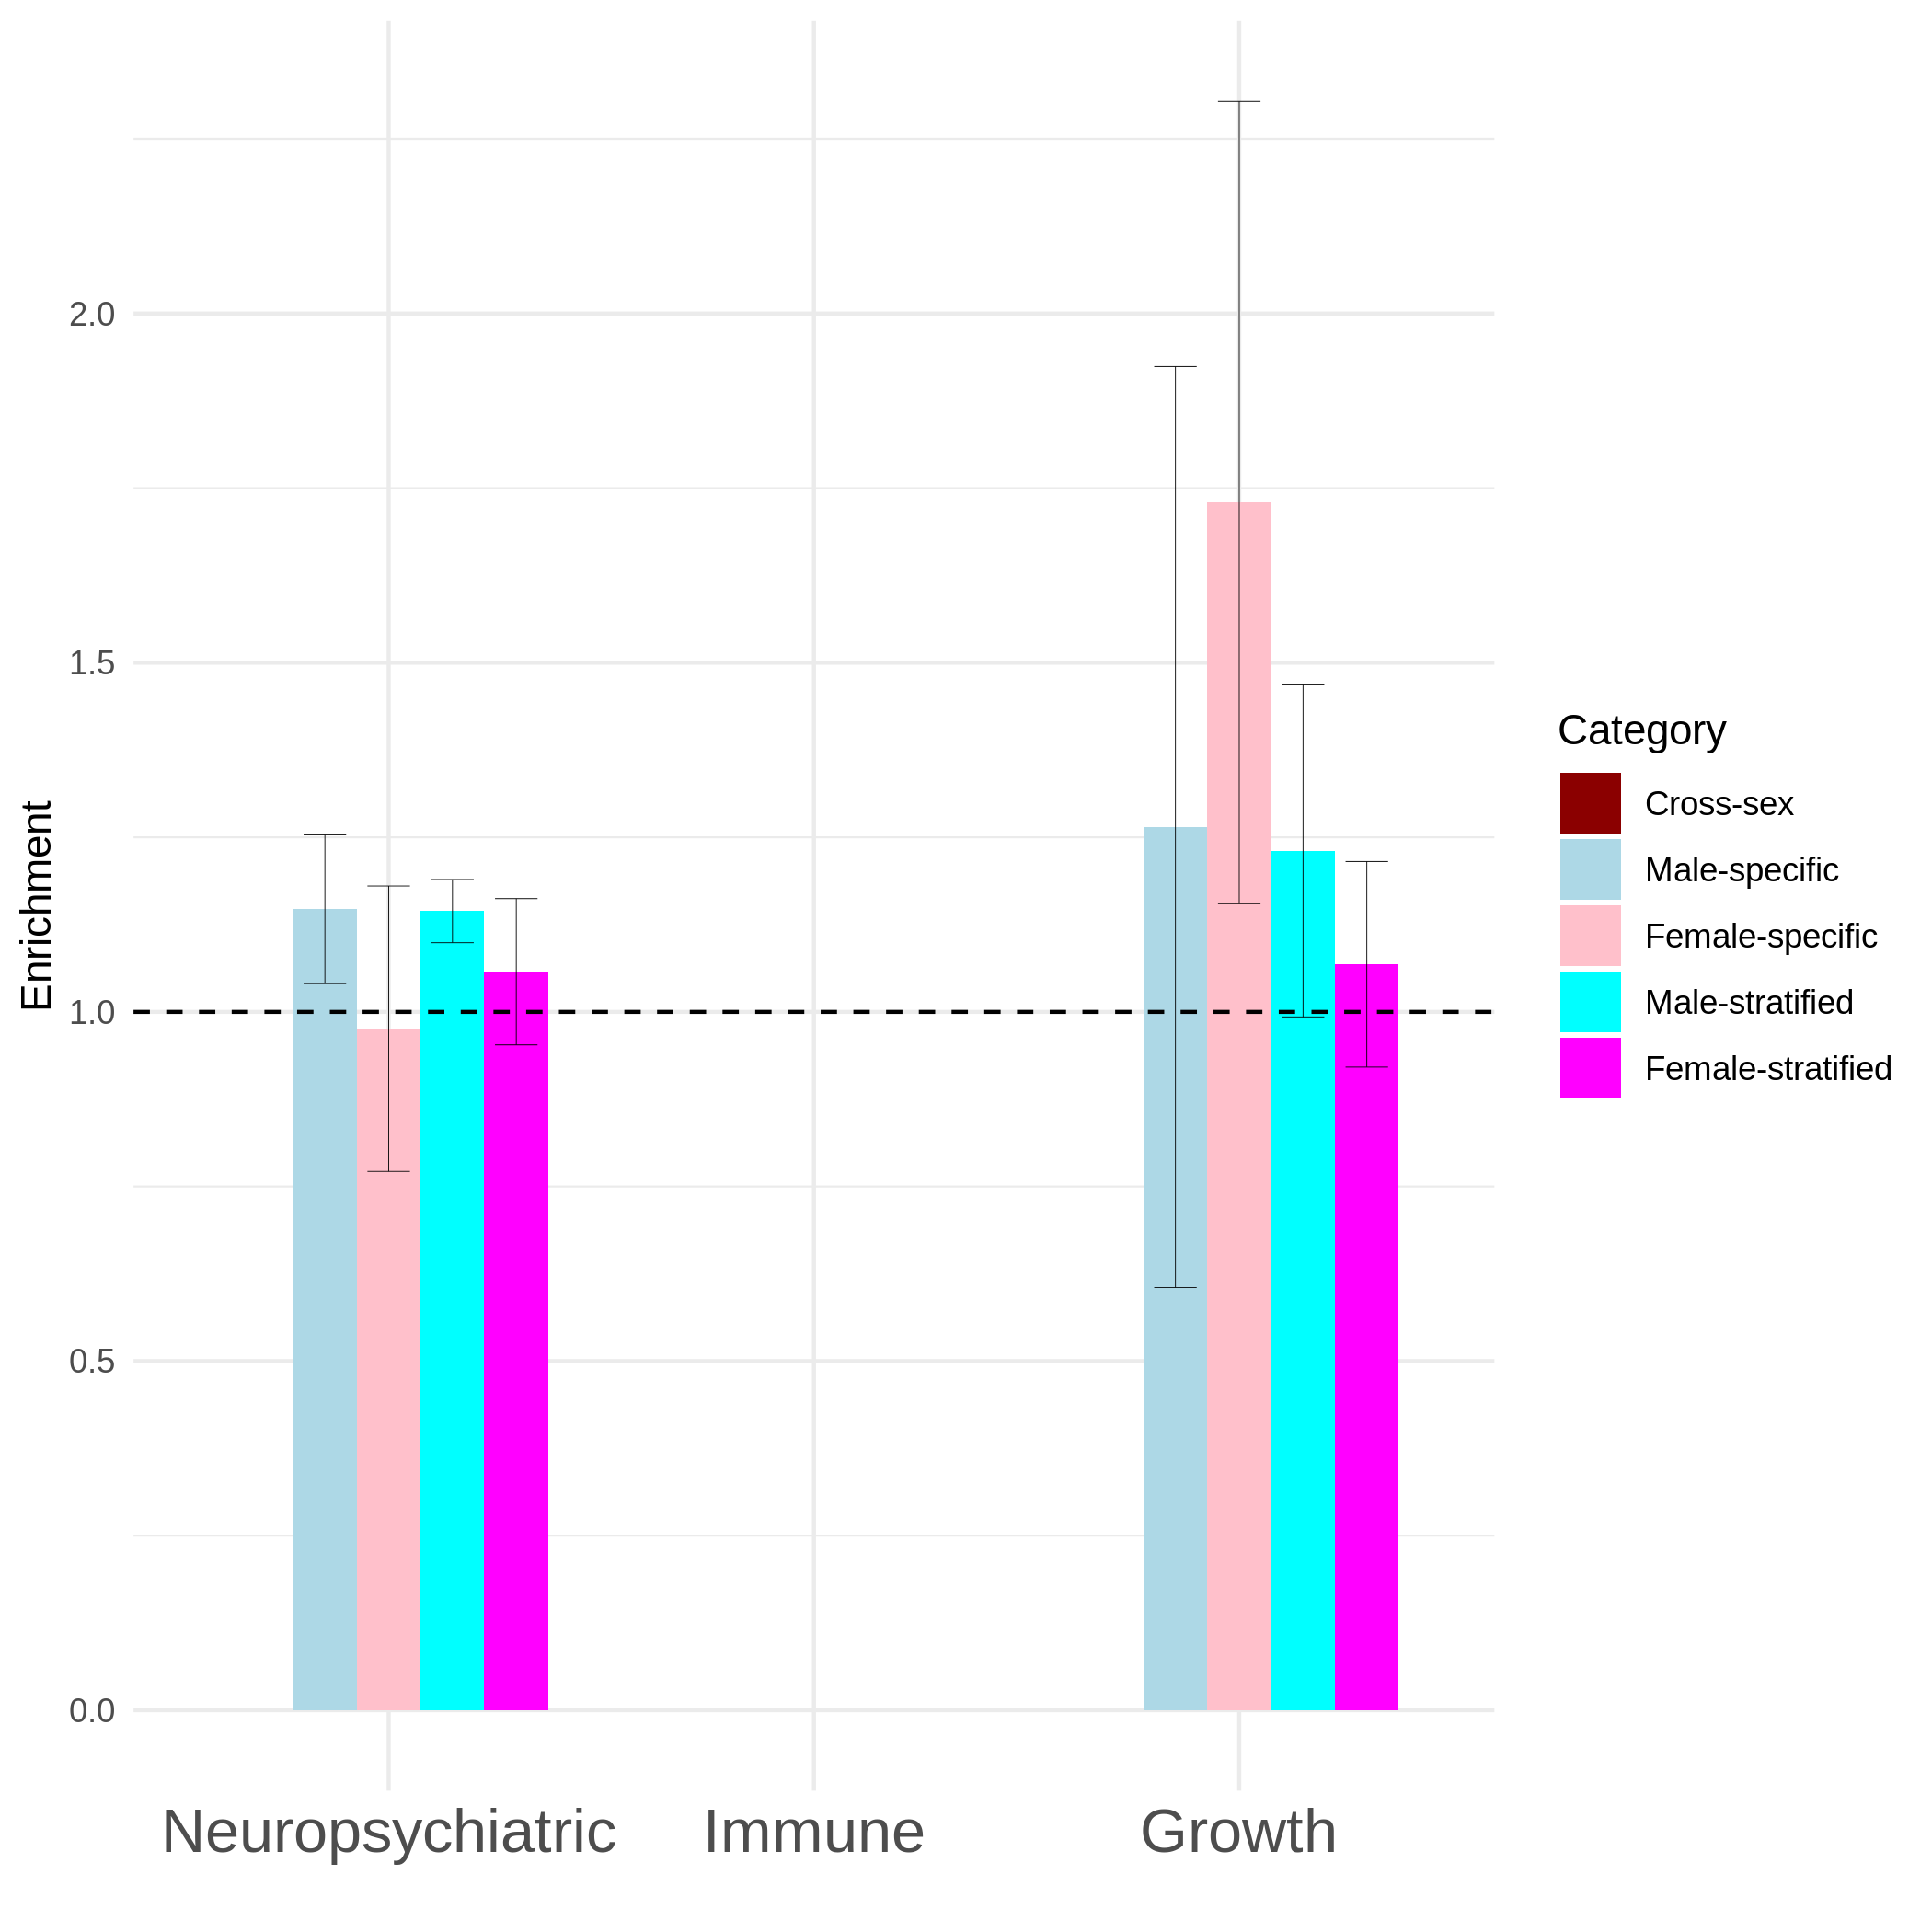

In [97]:
library(rmeta)
# Establish categories
preeclampsia <- c( 
    "Maternal Pre-Eclampsia (UKBB)",
    "Fetal Pre-Eclampsia",
    "Maternal Pre-Eclampsia"
)
meta_manifest <- list(
    neuropsychiatric = c(
        "ADHD",
       # "PTSD", 
        "ASD", 
      #  "MDD",
        "OCD",
        "ANX",
     #   "UKBB-ANX",
       # "ANXFS", 
     #   "BIP",
        "SCZ",
        "AN",
        "TS"
       # "Cross Disorder",
        #"Alcohol (AUDIT)",
        #"ALC",
       # "CUD", 
      #  "Cigarettes Per Day"
    ),
    neuropsychiatric_male = c(
        "ADHD Males", 
        #"PTSD Males",
        "ASD Males",
        #"MDD Males",
       # "RMDD Males",
        "OCD Males",
     #   "UKBB-ANX Males",
      #  "BIP Males",
        "SCZ Males"
    ),
    neuropsychiatric_female = c(
        "ADHD Females",
        #"PTSD Females",
        "ASD Females",
        "MDD Females", 
      #  "RMDD Females",
        "OCD Females", 
       # "UKBB-ANX Females", 
       # "BIP Females",
        "SCZ Females"
    ),
    growth = c(
        "Child BMI",
        "Head Circumference",
        "Child Obesity",
       # "TANNER Stage",
        #"Gestational Weight Gain",
        "Pubertal Growth Start",
        "Total Pubertal Growth",
        "Late Pubertal Growth",
        "Birth Weight",
        "Birth Length"
    ),
    growth_male = c(
       # "TANNER Stage Males", 
        "Pubertal Growth Start Males",
        "Total Pubertal Growth Males",
        "Late Pubertal Growth Males"
    ),
    growth_female = c(
       # "TANNER Stage Females",
        "Pubertal Growth Start Females", 
        "Total Pubertal Growth Females", 
        "Late Pubertal Growth Females"
    ),
    immune = c(
#         "ASTHMA Age(norm)", 
#         "ASTHMA Age(raw)", 
        "DIABETES Age(norm)", 
        "DIABETES Age(raw)", 
        "Type 1 Diabetes", 
        "HAYFEVER Age(norm)",
        "Hayfever or Eczema Age",
        "Child Onset Asthma"
    ),
    immune_male = c(
        "ASTHMA Age(norm) Males", 
        "ASTHMA Age(raw) Males", 
        "DIABETES Age(norm) Males",
        "DIABETES Age(raw) Males",
        "HAYFEVER Age(norm) Males", 
        "HAYFEVER Age(raw) Males",
        "Hayfever or Eczema Age Males"

    ),
    immune_female=c(
        "ASTHMA Age(norm) Females",
        "ASTHMA Age(raw) Females",
        "DIABETES Age(norm) Females",
        "DIABETES Age(raw) Females",
        "HAYFEVER Age(norm) Females",
        "HAYFEVER Age(raw) Females",
        "Hayfever or Eczema Age Females"
    )
)

all_ldsc_data <- all_heritability[annotation == "Cred95FDR"]
res_enrich <- list()
res_tau <- list()
enrich_struct <- list()
tau_struct <- list()
for(category in unique(all_ldsc_data$Category)){
    for(group in names(meta_manifest)){
        tmp_enrich <- meta.summaries(
            method="random",
            d=Enrichment,
            se=Enrichment_std_error,
            names=GWAS,
            data=all_ldsc_data[
                GWAS %in% meta_manifest[[group]] &
                GWAS %in% selected_GWAS &
                Category == category
            ]
        )
        tmp_tau <- meta.summaries(
            method="random",
            d=tau,
            se=tau_std_error,
            names=GWAS,
            data=all_ldsc_data[
                GWAS %in% meta_manifest[[group]] &
                GWAS %in% selected_GWAS &
                Category == category
            ]
        )
        meta_key <- paste(category,group)
        enrich_struct[[meta_key]] <- tmp_enrich
        tau_struct[[meta_key]] <- tmp_tau
        res_enrich[[meta_key]] <- data.table(
            Group = group,
            Category = category,
            Enrichment = tmp_enrich$summary,
            Enrichment_std_error = tmp_enrich$se.summary,
            Q_test = tmp_enrich$het[3]
        )
        res_tau[[meta_key]] <-  data.table(
            Group = group,
            Category = category,
            tau_star = tmp_tau$summary,
            tau_se = tmp_tau$se.summary,
            tau_p = 2 * pnorm(-abs(tmp_tau$summary / tmp_tau$se.summary)),
            Q_test = tmp_tau$het[3]
        )
    }
}
tau_meta <- rbindlist(res_tau)#[Q_test > 0.1]
enrich_meta <- rbindlist(res_enrich)#[Q_test > 0.1]

tau_male <-tau_meta[(grepl("_male",Group) & grepl("Male", Category))]
tau_female <-tau_meta[(grepl("_female",Group) & grepl("Female", Category))]
tau_plot <- rbind(tau_meta[Category != "Sex dependent" & !grepl("male",Group)],tau_male,tau_female)
tau_plot[,
    `:=`(
        Category =factor(tau_plot$Category,levels =c("Cross-sex", "Male-specific","Female-specific","Male-stratified", "Female-stratified")),
        sig_enrich = p.adjust(tau_p,method="BH") < 0.05,
        Group = str_to_title(Group)

    )
]
tau_plot[,`:=`(sig_enrich_GWAS = p.adjust(tau_p,method="BH") < 0.05),by="Group"]

ggplot(
    tau_plot[!grepl("_",Group) & grepl("Cross|Male|Female",Category)] %>% 
    mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
    group_by(Group) %>% complete(Category,tau_star=NA,tau_se=NA),
    
    aes(
        Group,
        tau_star,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= tau_star - tau_se,
        ymax=tau_star + tau_se
    )
)+
    geom_text(color="red",position=position_dodge(width=0.75),vjust=0)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    labs(y=bquote(tau^"*"))+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    scale_fill_manual(values = c("dark red", "light blue", "pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(size=16))

ggplot(
    tau_plot[grepl("_",Group)] %>% mutate(
        Sex = ifelse(grepl("_male",Group),"Male",ifelse(grepl("_female",Group),"Female","Cross-sex"))
        ) %>%
        mutate(Group = gsub("_.*","",Group))%>%
        filter((Sex == "Male" & grepl("Male",Category)) | (Sex == "Female" & grepl("Female",Category))) %>%
        mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
        group_by(Group) %>% complete(Category,tau_star=NA,tau_se=NA)
    ,
    aes(
        Group,
        tau_star,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= tau_star - tau_se,
        ymax=tau_star + tau_se
    )
)+
    geom_text(color="red",position=position_dodge(width=0.75),vjust=0)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    labs(y=bquote(tau^"*"))+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    labs(x="")+
    scale_fill_manual(values = c("dark red", "light blue", "pink","cyan","magenta"))+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))



enrich_male <- enrich_meta[(grepl("_male",Group) & grepl("Male", Category))]
enrich_female <- enrich_meta[(grepl("_female",Group) & grepl("Female", Category))]
enrich_plot <- rbind(enrich_meta[Category != "Sex dependent" & !grepl("male",Group)],enrich_male,enrich_female)
enrich_plot[,
    `:=`(
        Category =factor(enrich_plot$Category,levels =c("Cross-sex", "Male-specific","Female-specific","Male-stratified", "Female-stratified")),
        Group = str_to_title(Group)
    )
]
enrich_plot[Enrichment < 0,c("Enrichment","Enrichment_std_error")] <- NA
ggplot(
    enrich_plot[!grepl("_",Group) & grepl("Cross-sex|Male|Female",Category)] %>%
    mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
    group_by(Group) %>% complete(Category,Enrichment=NA,Enrichment_std_error=NA),
    aes(
        Group,
        Enrichment,
        fill = Category,
        ymin= ifelse(Enrichment - Enrichment_std_error < 0, 0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values = c("dark red","light blue", "pink","cyan","magenta" ))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))

ggplot(
    enrich_plot[grepl("_",Group)] %>% mutate(
        Sex = ifelse(grepl("_male",Group),"Male",ifelse(grepl("_female",Group),"Female","Cross-sex"))
        ) %>%
        mutate(Group = gsub("_.*","",Group))%>%
        filter((Sex == "Male" & grepl("Male",Category)) | (Sex == "Female" & grepl("Female",Category))) %>%
        mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
        group_by(Group) %>% complete(Category,Enrichment=NA,Enrichment_std_error=NA)
    ,
    aes(
        Group,
        Enrichment,
        fill = Category,
        ymin= ifelse(Enrichment - Enrichment_std_error < 0, 0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    labs(x="")+
    scale_fill_manual(values = c("dark red","light blue", "pink","cyan","magenta"))+
    scale_x_discrete(drop=FALSE)+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))




In [98]:
enrich_meta %>%
    select(-contains("Q")) %>%
    left_join(tau_meta %>% select(-contains("Q")),c("Group","Category")) %>%
    filter(
        !(grepl("male",Group) & !grepl("Male|Female",Category)),
        !(grepl("_male",Group) & grepl("Female",Category)),
        !(grepl("female",Group) & grepl("Male",Category))
    ) %>%
    mutate(Group = str_to_title(Group)) %>%
    write_csv(here("data","meta_analysis_Cred95FDR.csv"))

### max CPP

Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”
Warning message in pchisq(Q, df):
“NaNs produced”


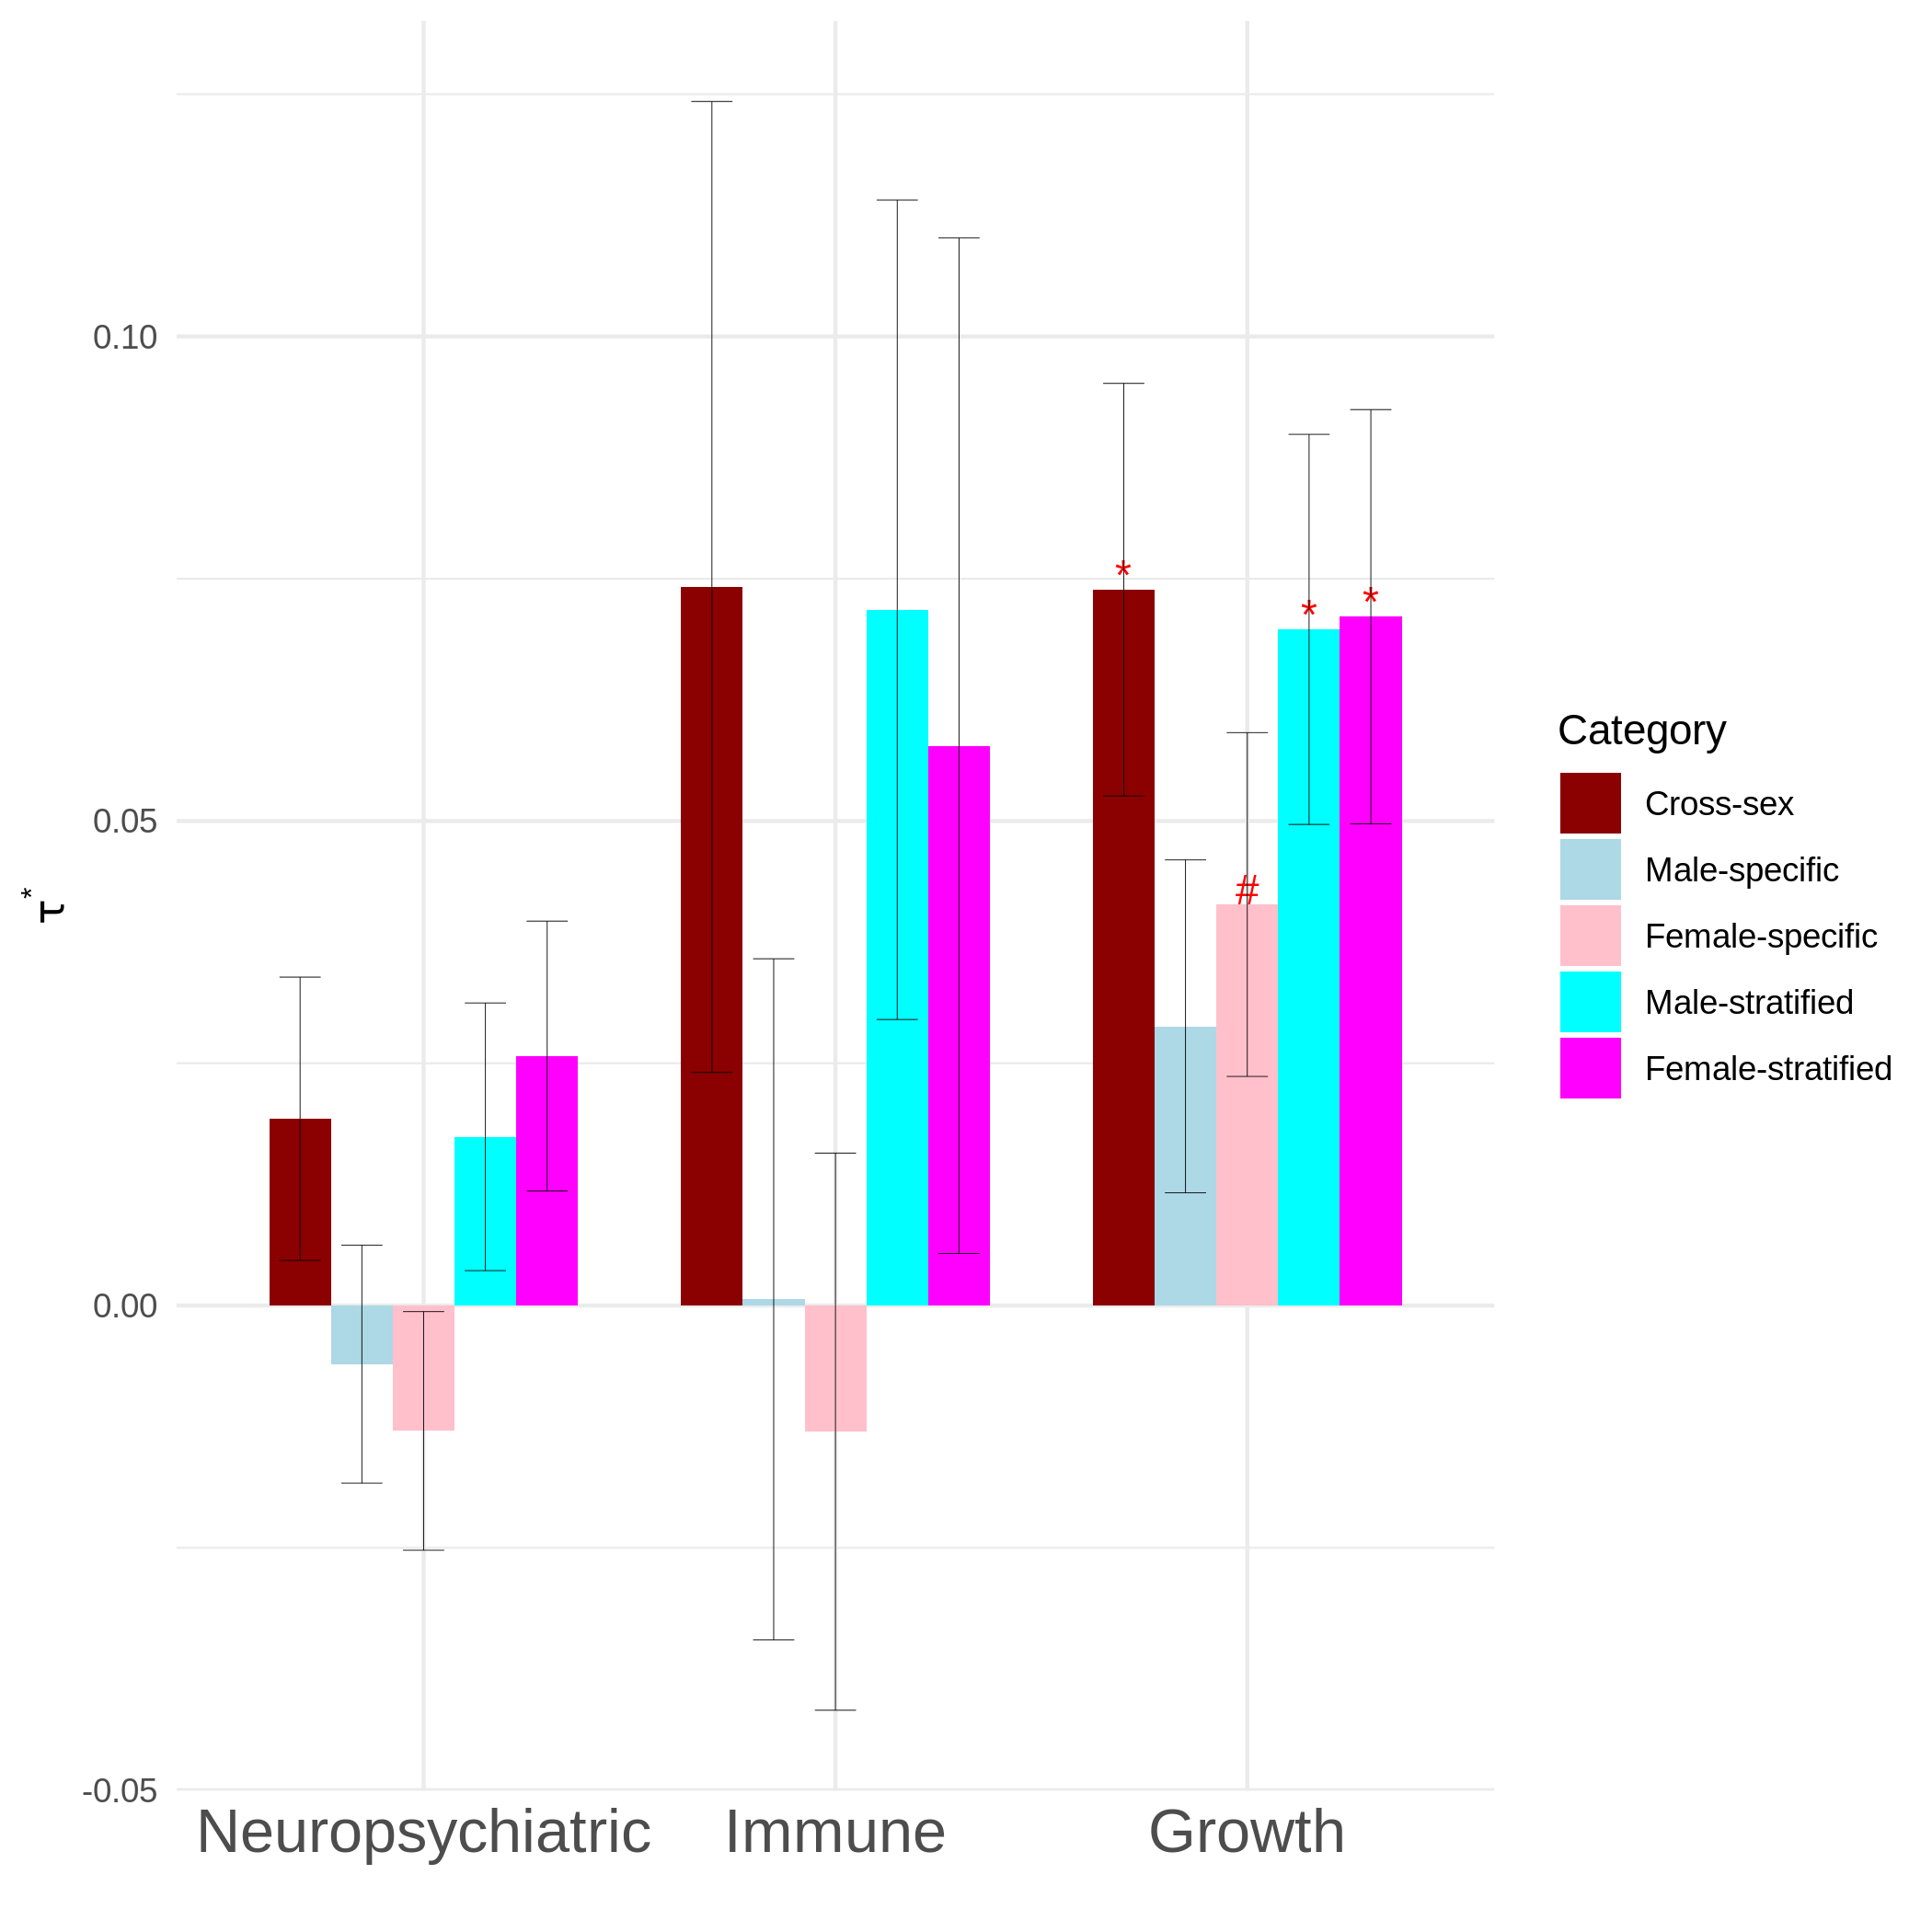

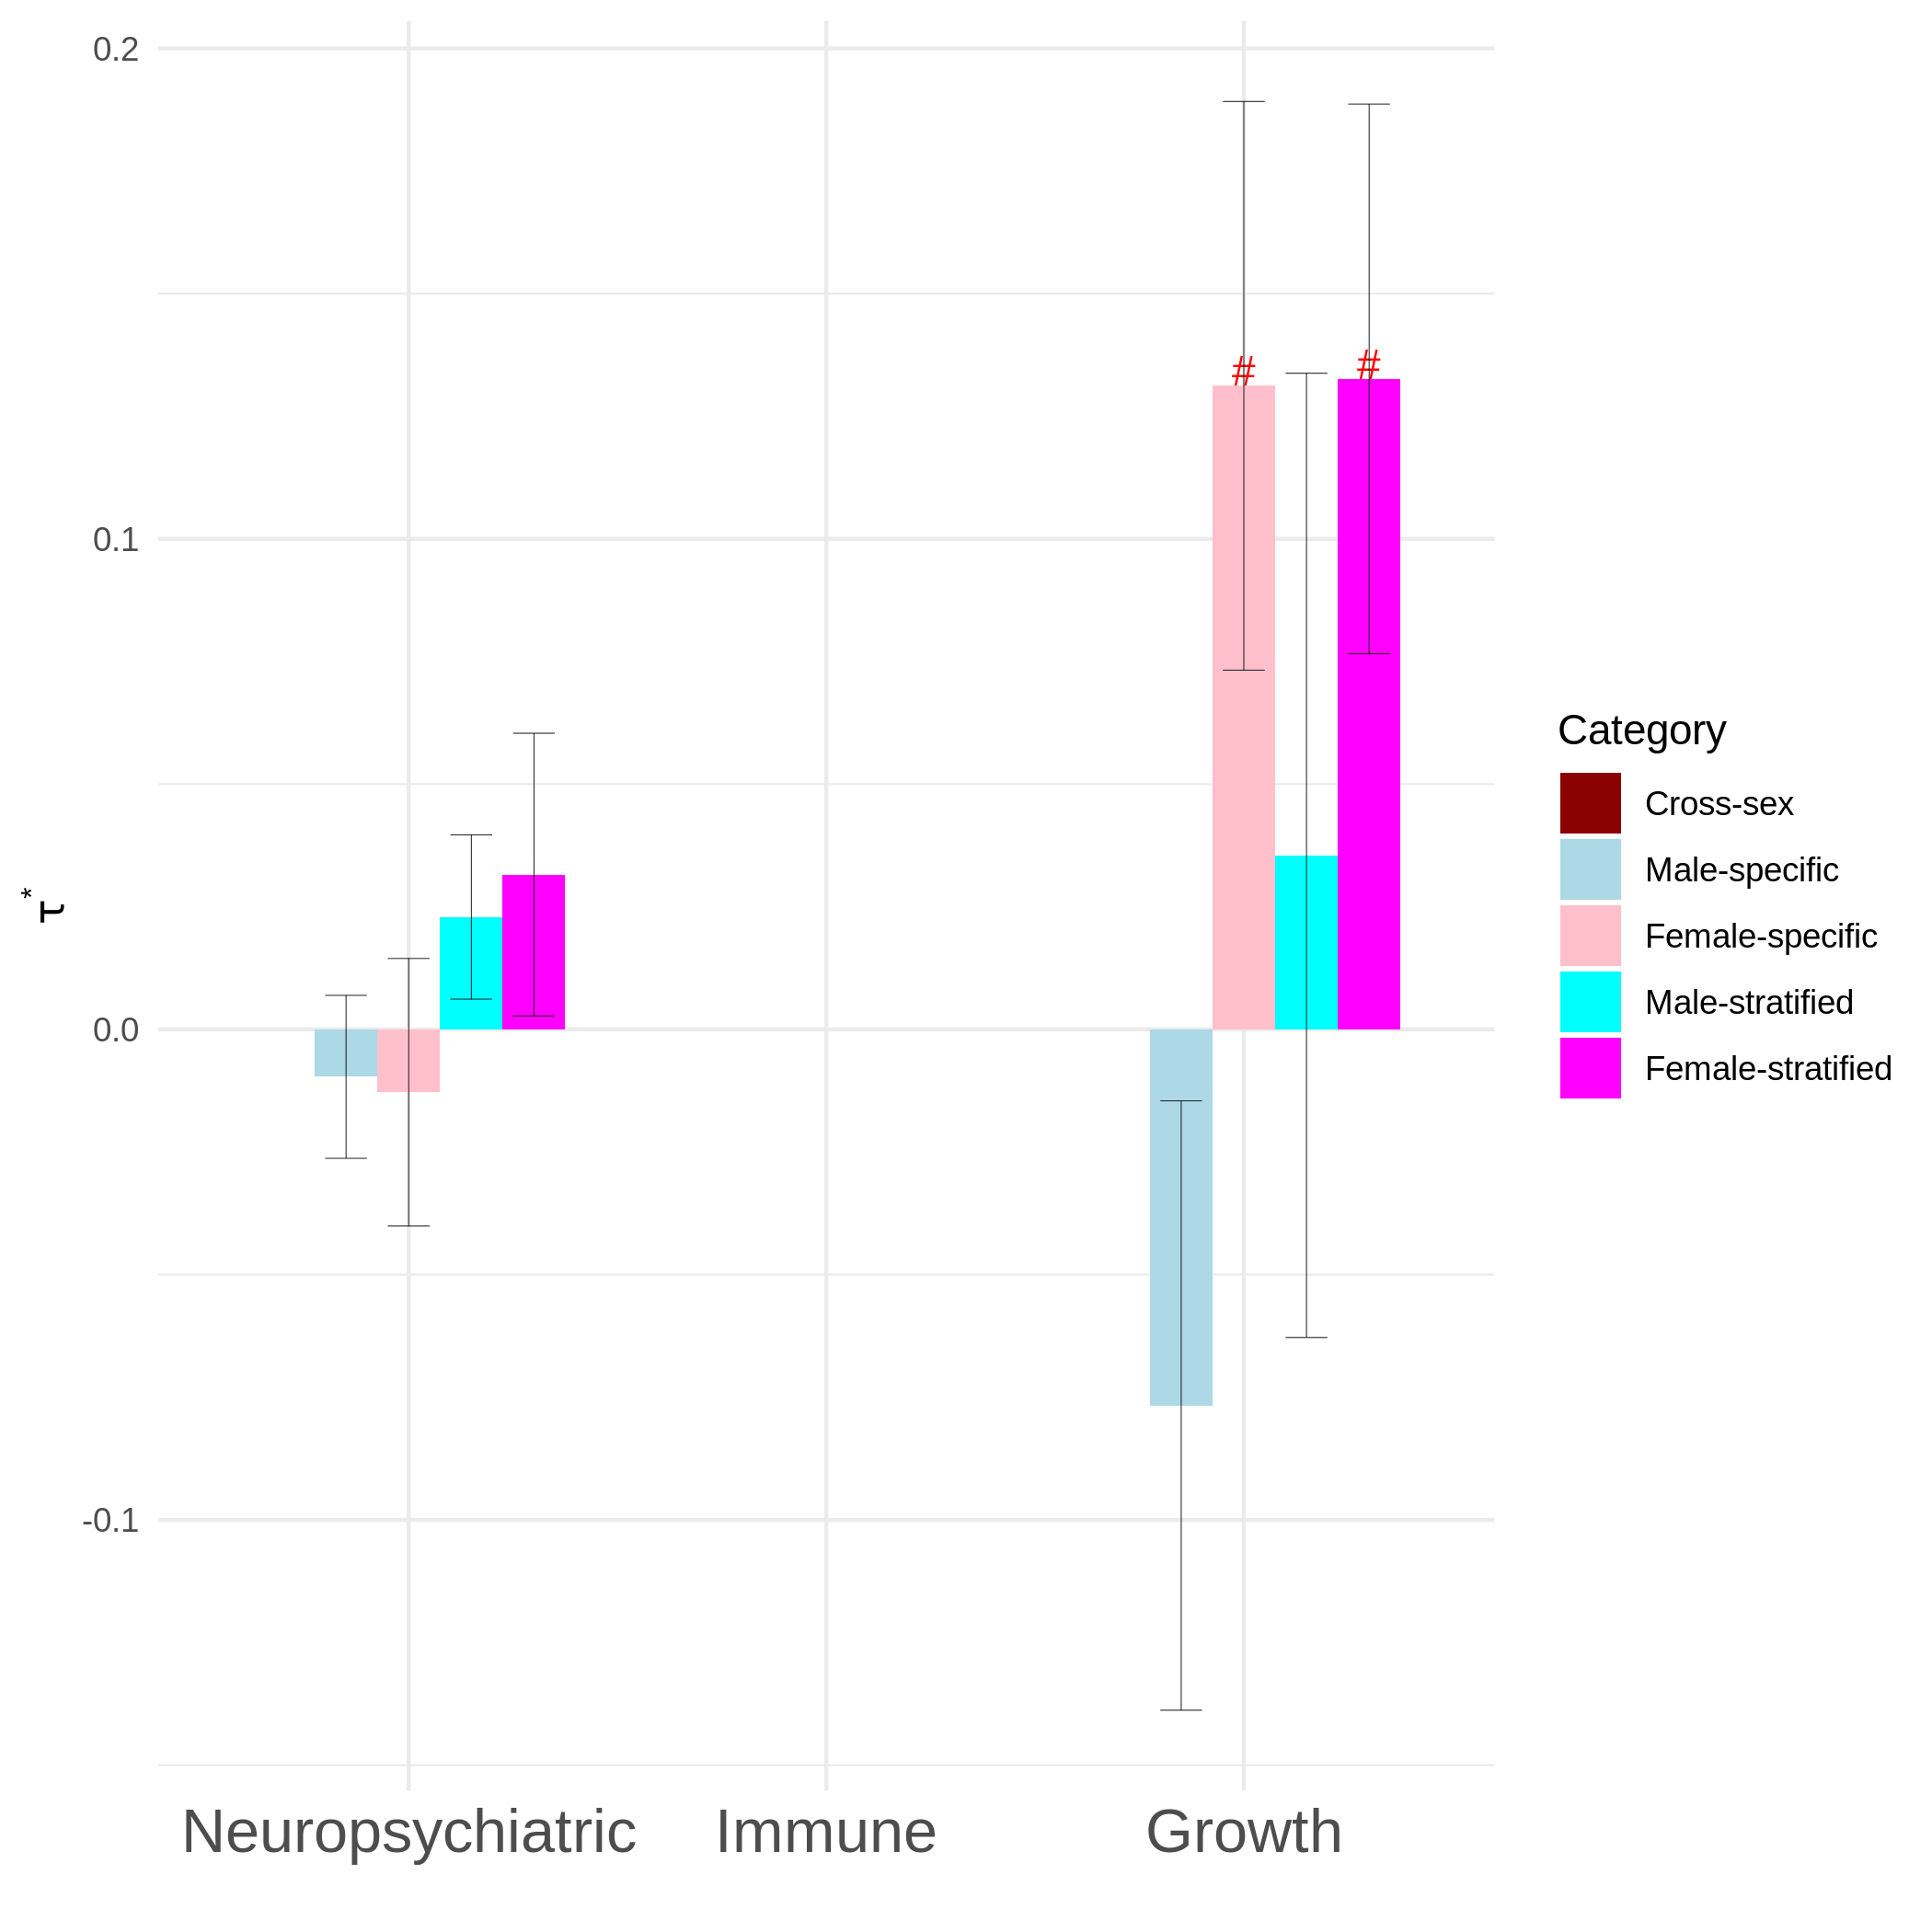

Warning message:
“Removed
19 rows
containing
missing
values
(geom_col).”


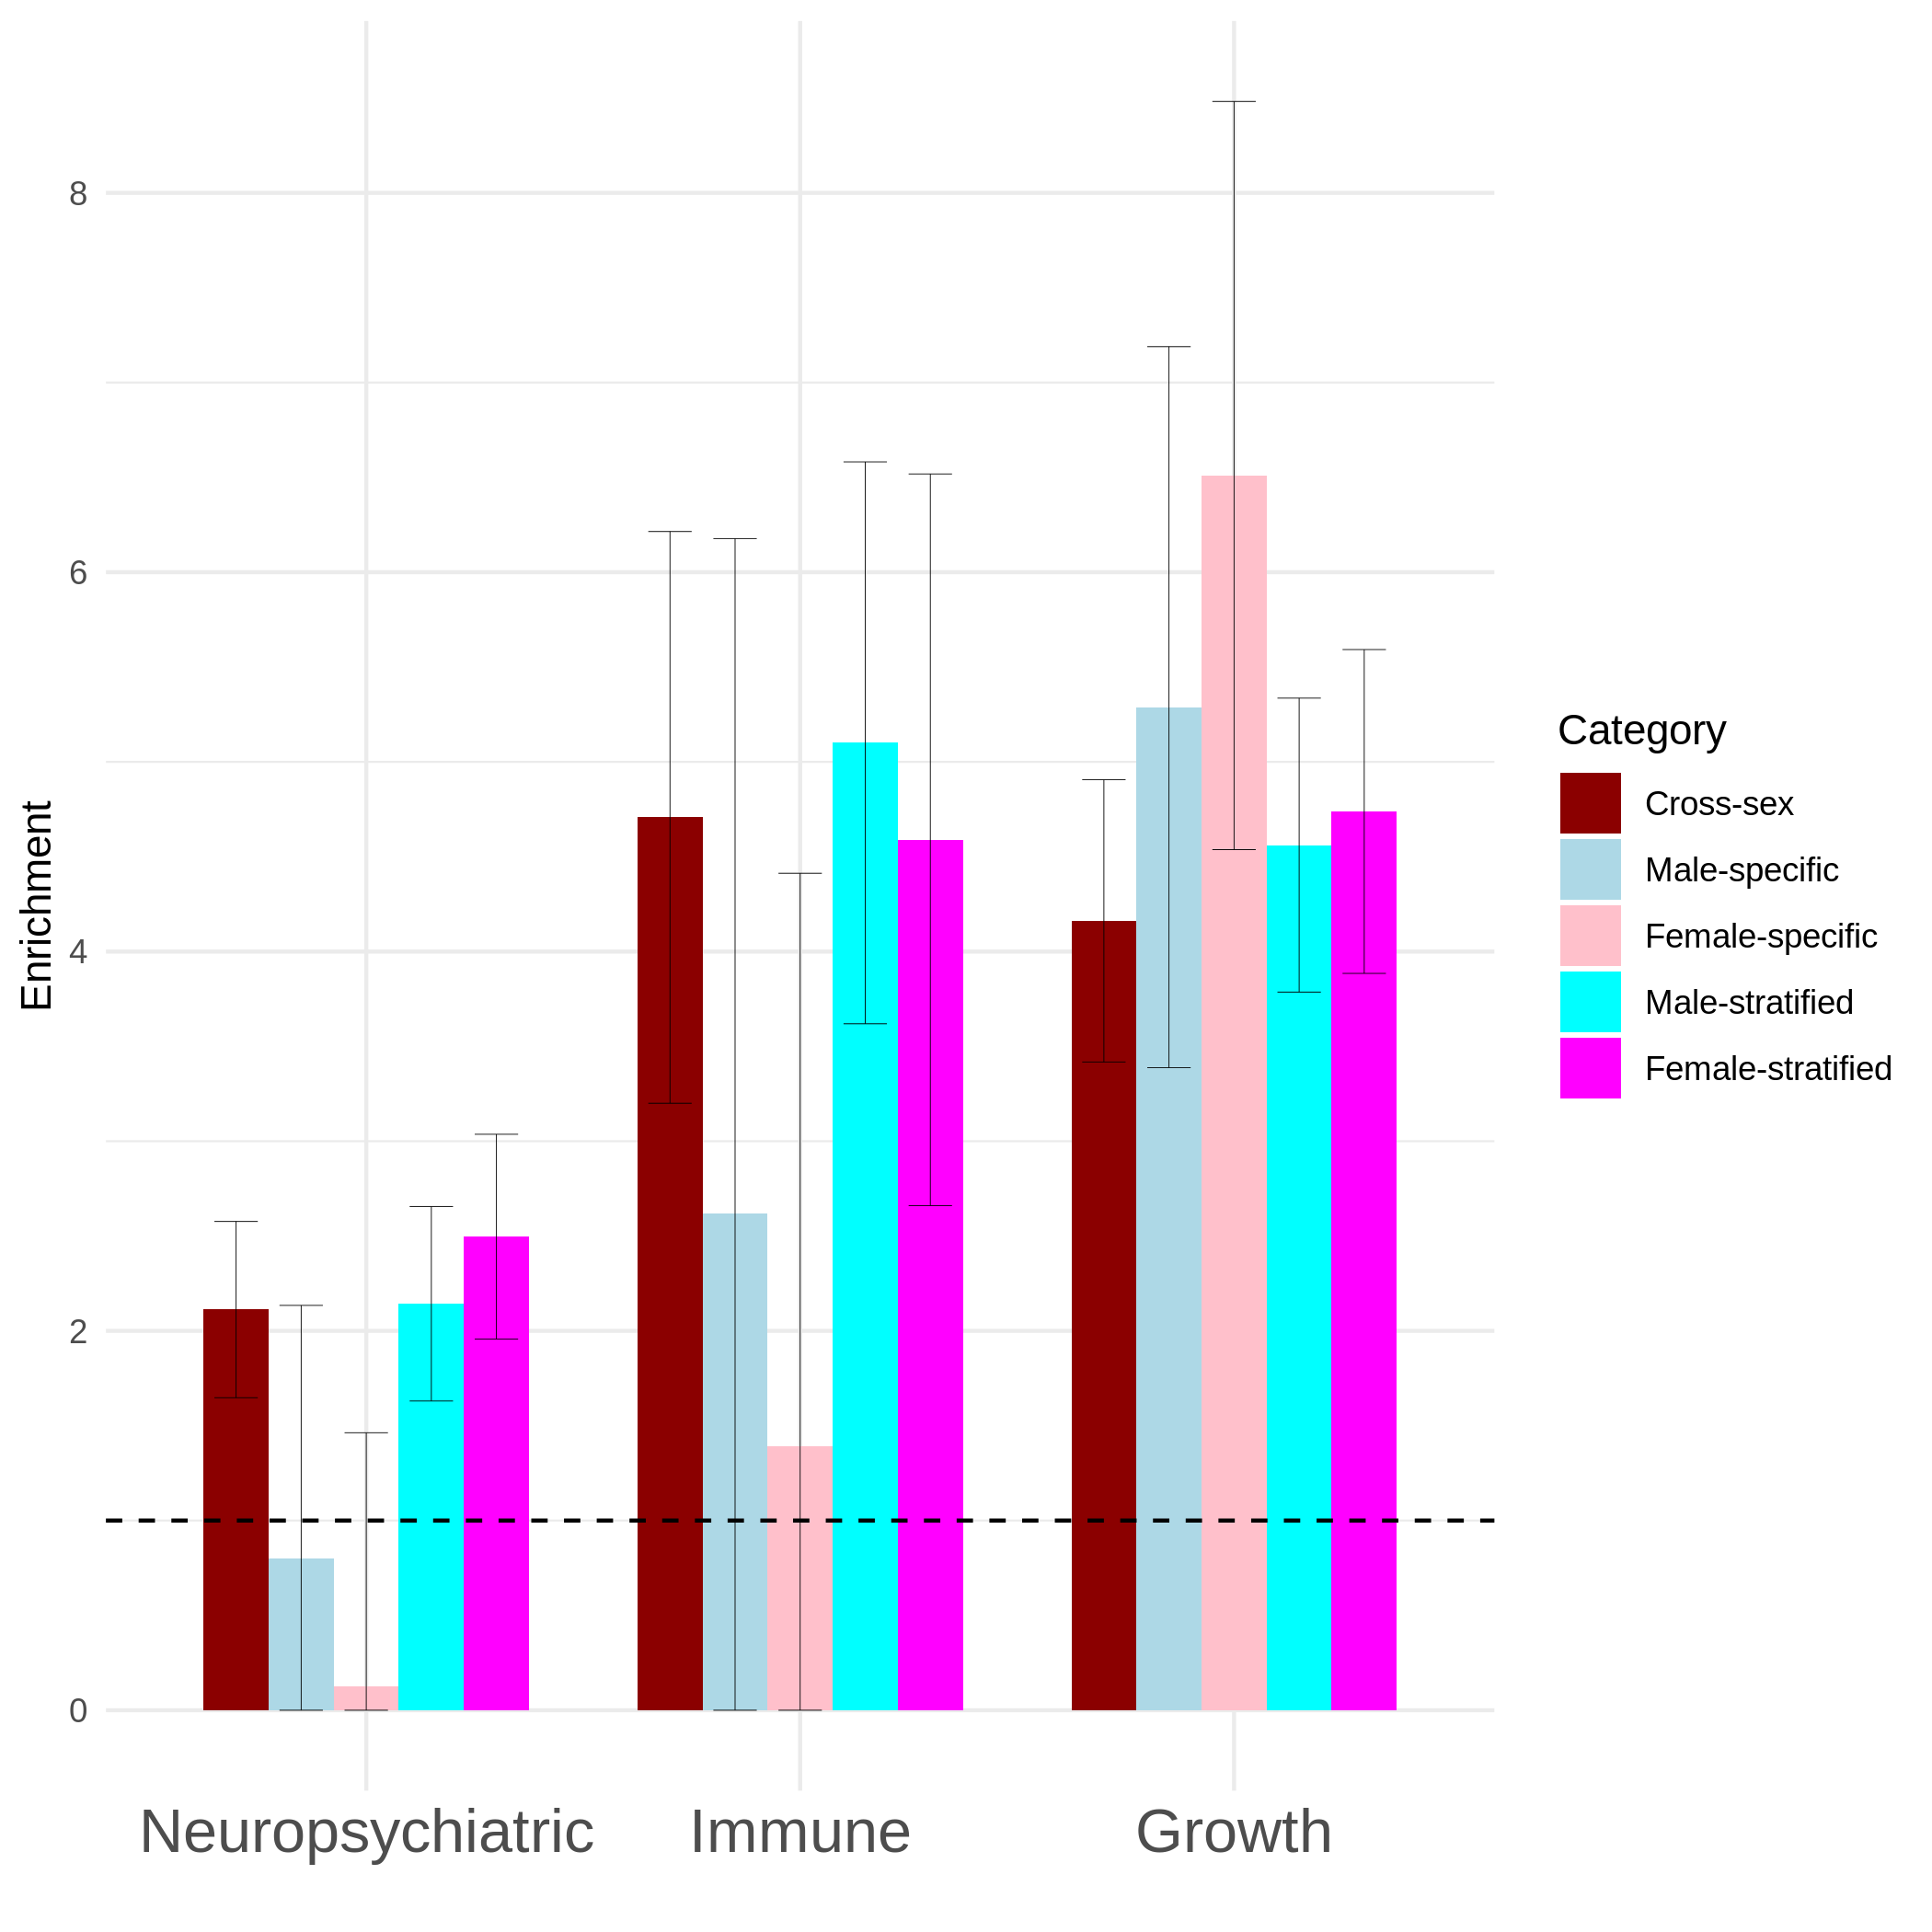

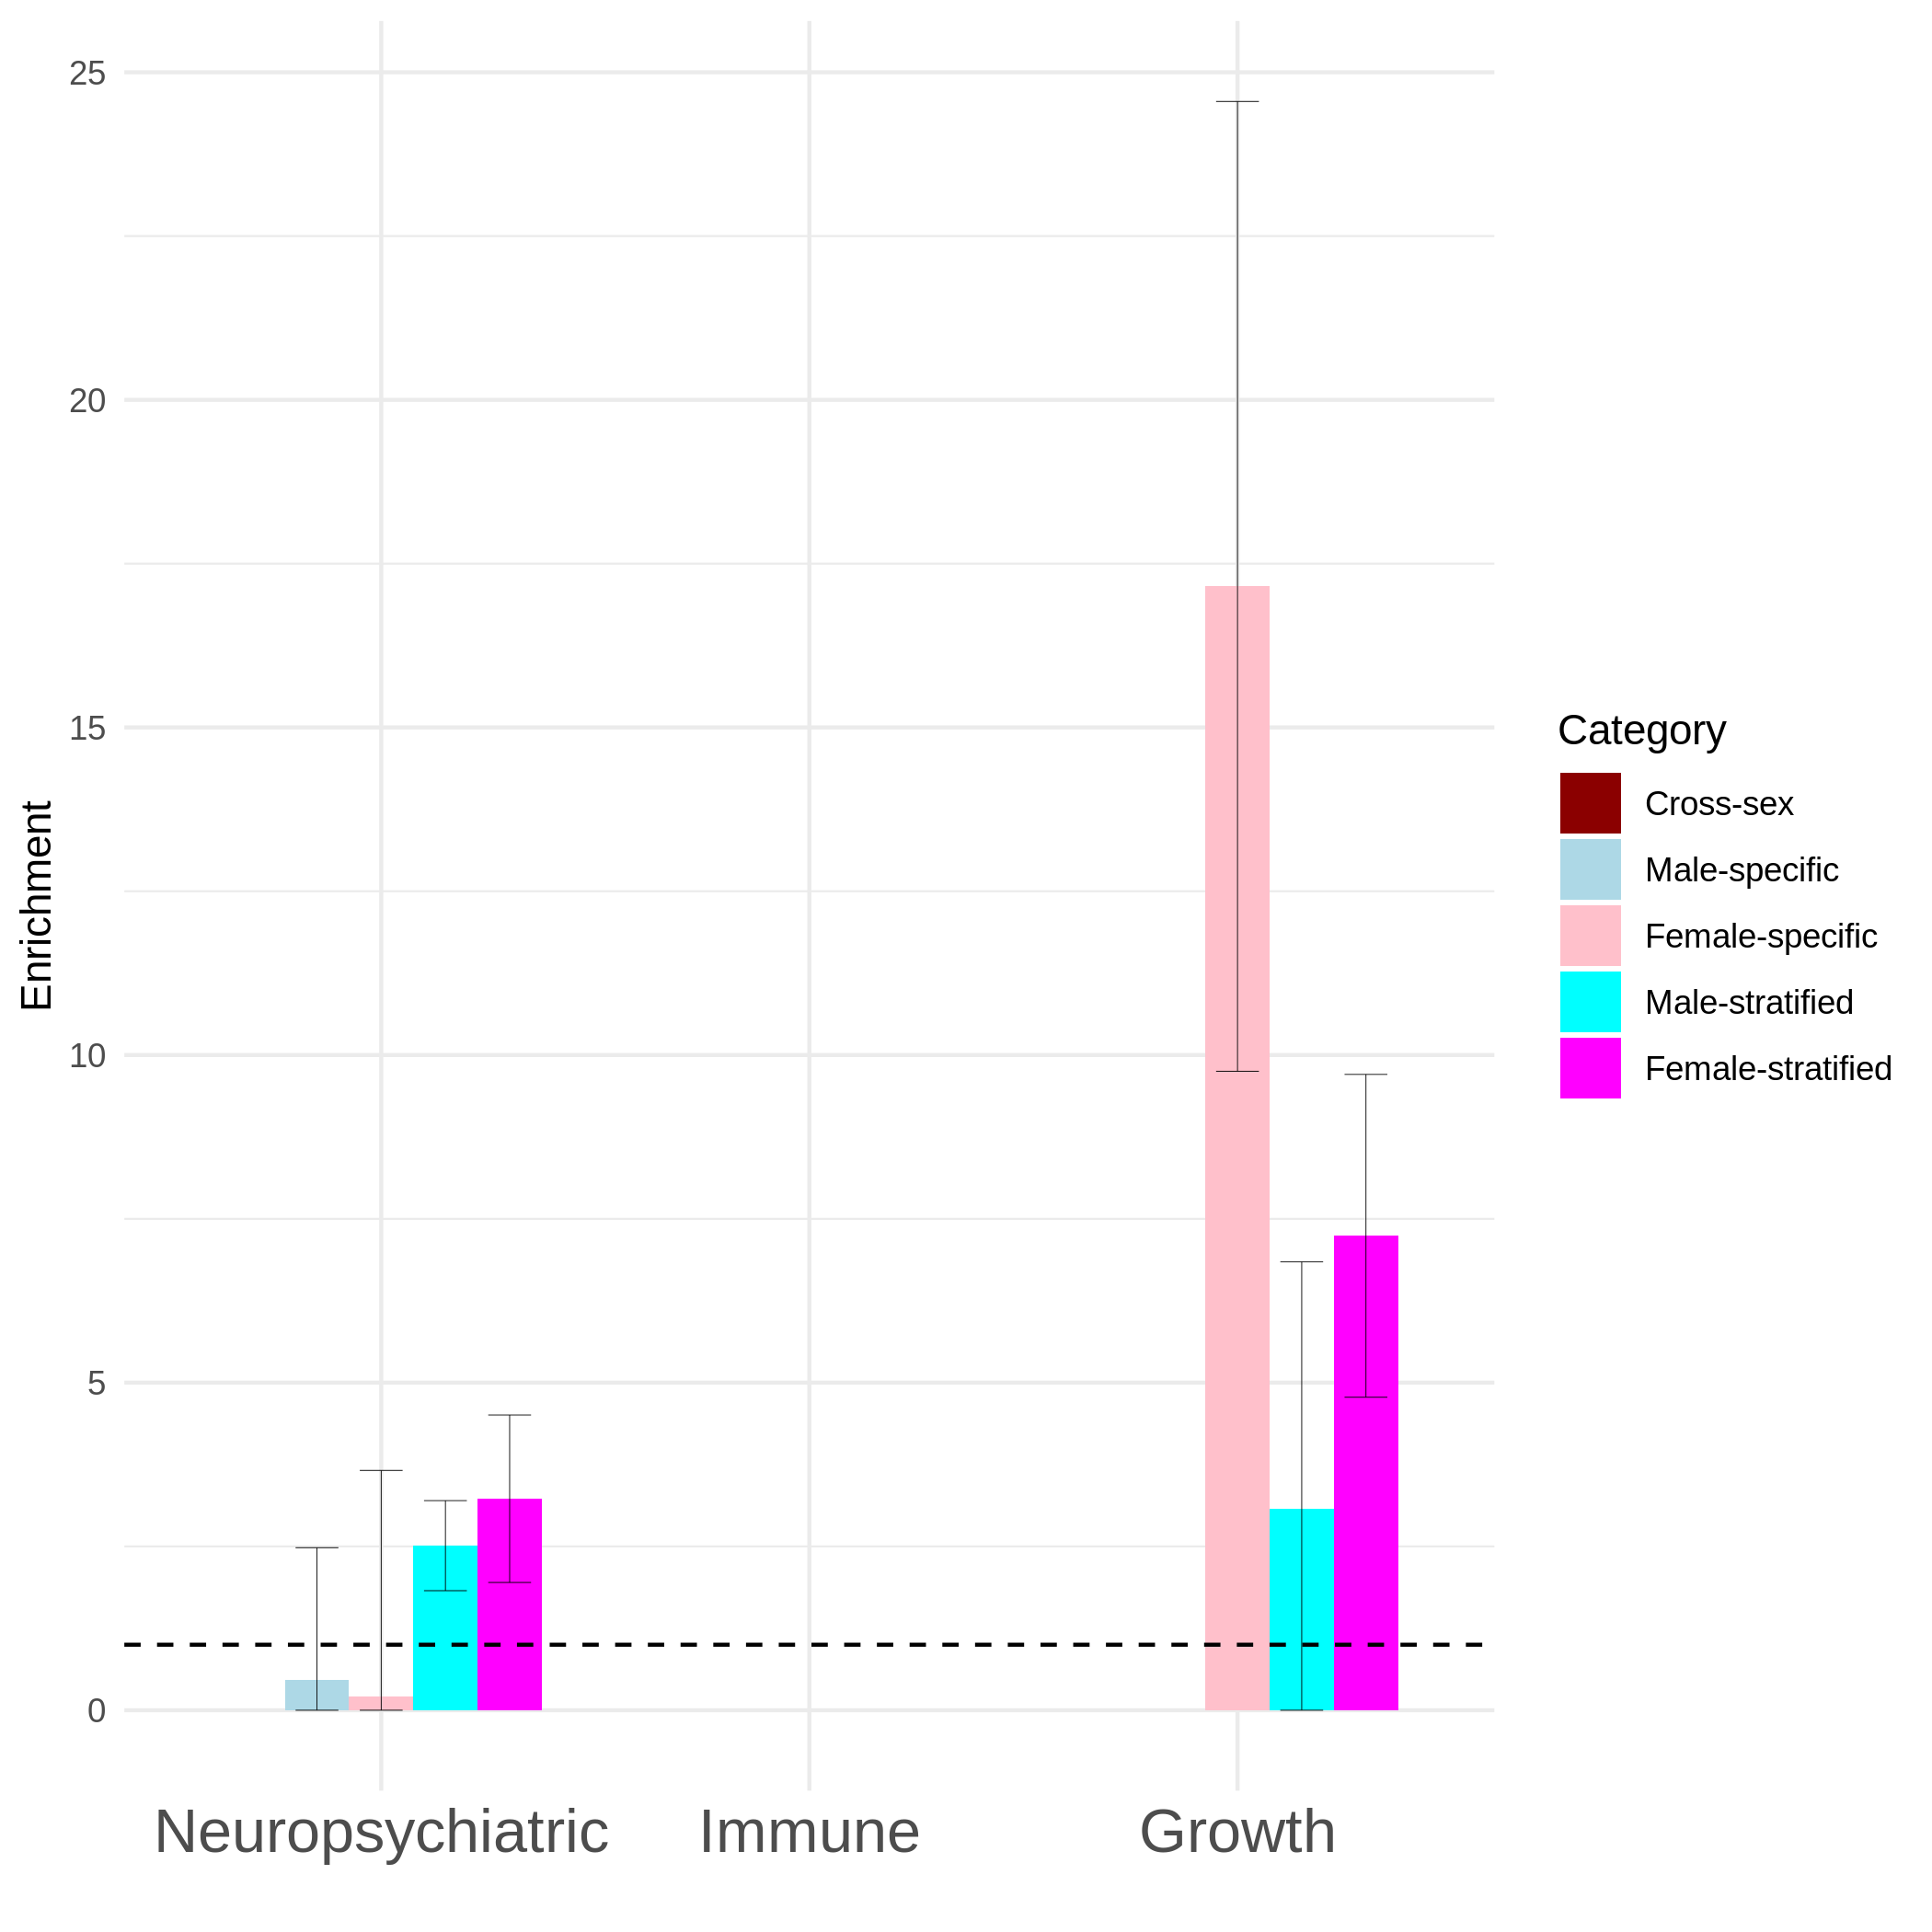

In [99]:
library(rmeta)
library(metaSEM)
# Establish categories
preeclampsia <- c( 
    "Maternal Pre-Eclampsia (UKBB)",
    "Fetal Pre-Eclampsia",
    "Maternal Pre-Eclampsia"
)
meta_manifest <- list(
    neuropsychiatric = c(
        "ADHD",
       # "PTSD", 
        "ASD", 
      #  "MDD",
        "OCD",
        "ANX",
     #   "UKBB-ANX",
       # "ANXFS", 
     #   "BIP",
        "SCZ",
        "AN",
        "TS"
       # "Cross Disorder",
        #"Alcohol (AUDIT)",
        #"ALC",
       # "CUD", 
      #  "Cigarettes Per Day"
    ),
    neuropsychiatric_male = c(
        "ADHD Males", 
        #"PTSD Males",
        "ASD Males",
        #"MDD Males",
       # "RMDD Males",
        "OCD Males",
     #   "UKBB-ANX Males",
      #  "BIP Males",
        "SCZ Males"
    ),
    neuropsychiatric_female = c(
        "ADHD Females",
        #"PTSD Females",
        "ASD Females",
        "MDD Females", 
      #  "RMDD Females",
        "OCD Females", 
       # "UKBB-ANX Females", 
       # "BIP Females",
        "SCZ Females"
    ),
    growth = c(
        "Child BMI",
        "Head Circumference",
        "Child Obesity",
       # "TANNER Stage",
        #"Gestational Weight Gain",
        "Pubertal Growth Start",
        "Total Pubertal Growth",
        "Late Pubertal Growth",
        "Birth Weight",
        "Birth Length"
    ),
    growth_male = c(
       # "TANNER Stage Males", 
        "Pubertal Growth Start Males",
        "Total Pubertal Growth Males",
        "Late Pubertal Growth Males"
    ),
    growth_female = c(
       # "TANNER Stage Females",
        "Pubertal Growth Start Females", 
        "Total Pubertal Growth Females", 
        "Late Pubertal Growth Females"
    ),
    immune = c(
#         "ASTHMA Age(norm)", 
#         "ASTHMA Age(raw)", 
        "DIABETES Age(norm)", 
        "DIABETES Age(raw)", 
        "Type 1 Diabetes", 
        "HAYFEVER Age(norm)",
        "Hayfever or Eczema Age",
        "Child Onset Asthma"
    ),
    immune_male = c(
        "ASTHMA Age(norm) Males", 
        "ASTHMA Age(raw) Males", 
        "DIABETES Age(norm) Males",
        "DIABETES Age(raw) Males",
        "HAYFEVER Age(norm) Males", 
        "HAYFEVER Age(raw) Males",
        "Hayfever or Eczema Age Males"

    ),
    immune_female=c(
        "ASTHMA Age(norm) Females",
        "ASTHMA Age(raw) Females",
        "DIABETES Age(norm) Females",
        "DIABETES Age(raw) Females",
        "HAYFEVER Age(norm) Females",
        "HAYFEVER Age(raw) Females",
        "Hayfever or Eczema Age Females"
    )
)


all_ldsc_data <- all_heritability[annotation == "maxCPPFDR"]
res_enrich <- list()
res_tau <- list()
enrich_struct <- list()
tau_struct <- list()
for(category in unique(all_ldsc_data$Category)){
    for(group in names(meta_manifest)){
        tmp_enrich <- meta.summaries(
            method="random",
            d=Enrichment,
            se=Enrichment_std_error,
            names=GWAS,
            data=all_ldsc_data[
                GWAS %in% meta_manifest[[group]] &
                GWAS %in% selected_GWAS &
                Category == category
            ]
        )
        tmp_tau <- meta.summaries(
            method="random",
            d=tau,
            se=tau_std_error,
            names=GWAS,
            data=all_ldsc_data[
                GWAS %in% meta_manifest[[group]] &
                GWAS %in% selected_GWAS &
                Category == category
            ]
        )
        meta_key <- paste(category,group)
        enrich_struct[[meta_key]] <- tmp_enrich
        tau_struct[[meta_key]] <- tmp_tau
        res_enrich[[meta_key]] <- data.table(
            Group = group,
            Category = category,
            Enrichment = tmp_enrich$summary,
            Enrichment_std_error = tmp_enrich$se.summary,
            Q_test = tmp_enrich$het[3]
        )
        res_tau[[meta_key]] <-  data.table(
            Group = group,
            Category = category,
            tau_star = tmp_tau$summary,
            tau_se = tmp_tau$se.summary,
            tau_p = 2 * pnorm(-abs(tmp_tau$summary / tmp_tau$se.summary)),
            Q_test = tmp_tau$het[3]
        )
    }
}
tau_meta <- rbindlist(res_tau)#[Q_test > 0.1]
enrich_meta <- rbindlist(res_enrich)#[Q_test > 0.1]

tau_male <-tau_meta[(grepl("_male",Group) & grepl("Male", Category))]
tau_female <-tau_meta[(grepl("_female",Group) & grepl("Female", Category))]
tau_plot <- rbind(tau_meta[Category != "Sex dependent" & !grepl("male",Group)],tau_male,tau_female)
tau_plot[,
    `:=`(
        Category =factor(tau_plot$Category,levels =c("Cross-sex", "Male-specific","Female-specific","Male-stratified", "Female-stratified")),
        sig_enrich = p.adjust(tau_p,method="BH") < 0.05,
        Group = str_to_title(Group)

    )
]
tau_plot[,`:=`(sig_enrich_GWAS = p.adjust(tau_p,method="BH") < 0.05),by="Group"]

ggplot(
    tau_plot[!grepl("_",Group) & grepl("Cross|Male|Female",Category)] %>% 
    mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
    group_by(Group) %>% complete(Category,tau_star=NA,tau_se=NA),
    
    aes(
        Group,
        tau_star,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= tau_star - tau_se,
        ymax=tau_star + tau_se
    )
)+
    geom_text(color="red",position=position_dodge(width=0.75),vjust=0)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    labs(y=bquote(tau^"*"))+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    scale_fill_manual(values = c("dark red", "light blue", "pink","cyan","magenta"))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x = element_text(size=16))

ggplot(
    tau_plot[grepl("_",Group)] %>% mutate(
        Sex = ifelse(grepl("_male",Group),"Male",ifelse(grepl("_female",Group),"Female","Cross-sex"))
        ) %>%
        mutate(Group = gsub("_.*","",Group))%>%
        filter((Sex == "Male" & grepl("Male",Category)) | (Sex == "Female" & grepl("Female",Category))) %>%
        mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
        group_by(Group) %>% complete(Category,tau_star=NA,tau_se=NA)
    ,
    aes(
        Group,
        tau_star,
        fill = Category,
        label=ifelse(sig_enrich,"*",ifelse(sig_enrich_GWAS,"#","")),
        ymin= tau_star - tau_se,
        ymax=tau_star + tau_se
    )
)+
    geom_text(color="red",position=position_dodge(width=0.75),vjust=0)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    labs(y=bquote(tau^"*"))+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    labs(x="")+
    scale_fill_manual(values = c("dark red", "light blue", "pink","cyan","magenta"))+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))



enrich_male <- enrich_meta[(grepl("_male",Group) & grepl("Male", Category))]
enrich_female <- enrich_meta[(grepl("_female",Group) & grepl("Female", Category))]
enrich_plot <- rbind(enrich_meta[Category != "Sex dependent" & !grepl("male",Group)],enrich_male,enrich_female)
enrich_plot[,
    `:=`(
        Category =factor(enrich_plot$Category,levels =c("Cross-sex", "Male-specific","Female-specific","Male-stratified", "Female-stratified")),
        Group = str_to_title(Group)
    )
]
enrich_plot[Enrichment < 0,c("Enrichment","Enrichment_std_error")] <- NA
ggplot(
    enrich_plot[!grepl("_",Group) & grepl("Cross-sex|Male|Female",Category)] %>%mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth"))),
    aes(
        Group,
        Enrichment,
        fill = Category,
        ymin= ifelse(Enrichment - Enrichment_std_error < 0, 0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    scale_fill_manual(values = c("dark red","light blue", "pink","cyan","magenta" ))+
    labs(x="")+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))

ggplot(
    enrich_plot[grepl("_",Group)] %>% mutate(
        Sex = ifelse(grepl("_male",Group),"Male",ifelse(grepl("_female",Group),"Female","Cross-sex"))
        ) %>%
        mutate(Group = gsub("_.*","",Group))%>%
        filter((Sex == "Male" & grepl("Male",Category)) | (Sex == "Female" & grepl("Female",Category))) %>%
        mutate(Group= factor(Group,levels=c("Neuropsychiatric","Immune","Growth")))%>% 
        group_by(Group) %>% complete(Category,Enrichment=NA,Enrichment_std_error=NA)
    ,
    aes(
        Group,
        Enrichment,
        fill = Category,
        ymin= ifelse(Enrichment - Enrichment_std_error < 0, 0,Enrichment - Enrichment_std_error),
        ymax=Enrichment + Enrichment_std_error
    )
)+
    geom_col(position=position_dodge(width=0.75),width=0.75)+
    geom_errorbar(width=0.5,size=0.1,position=position_dodge(width=0.75)) + 
    geom_hline(yintercept = 1,linetype="dashed")+
    labs(x="")+
    scale_fill_manual(values = c("dark red","light blue", "pink","cyan","magenta"))+
    scale_x_discrete(drop=FALSE)+
    theme_minimal()+
    theme(axis.text.x=element_text(size = 16))




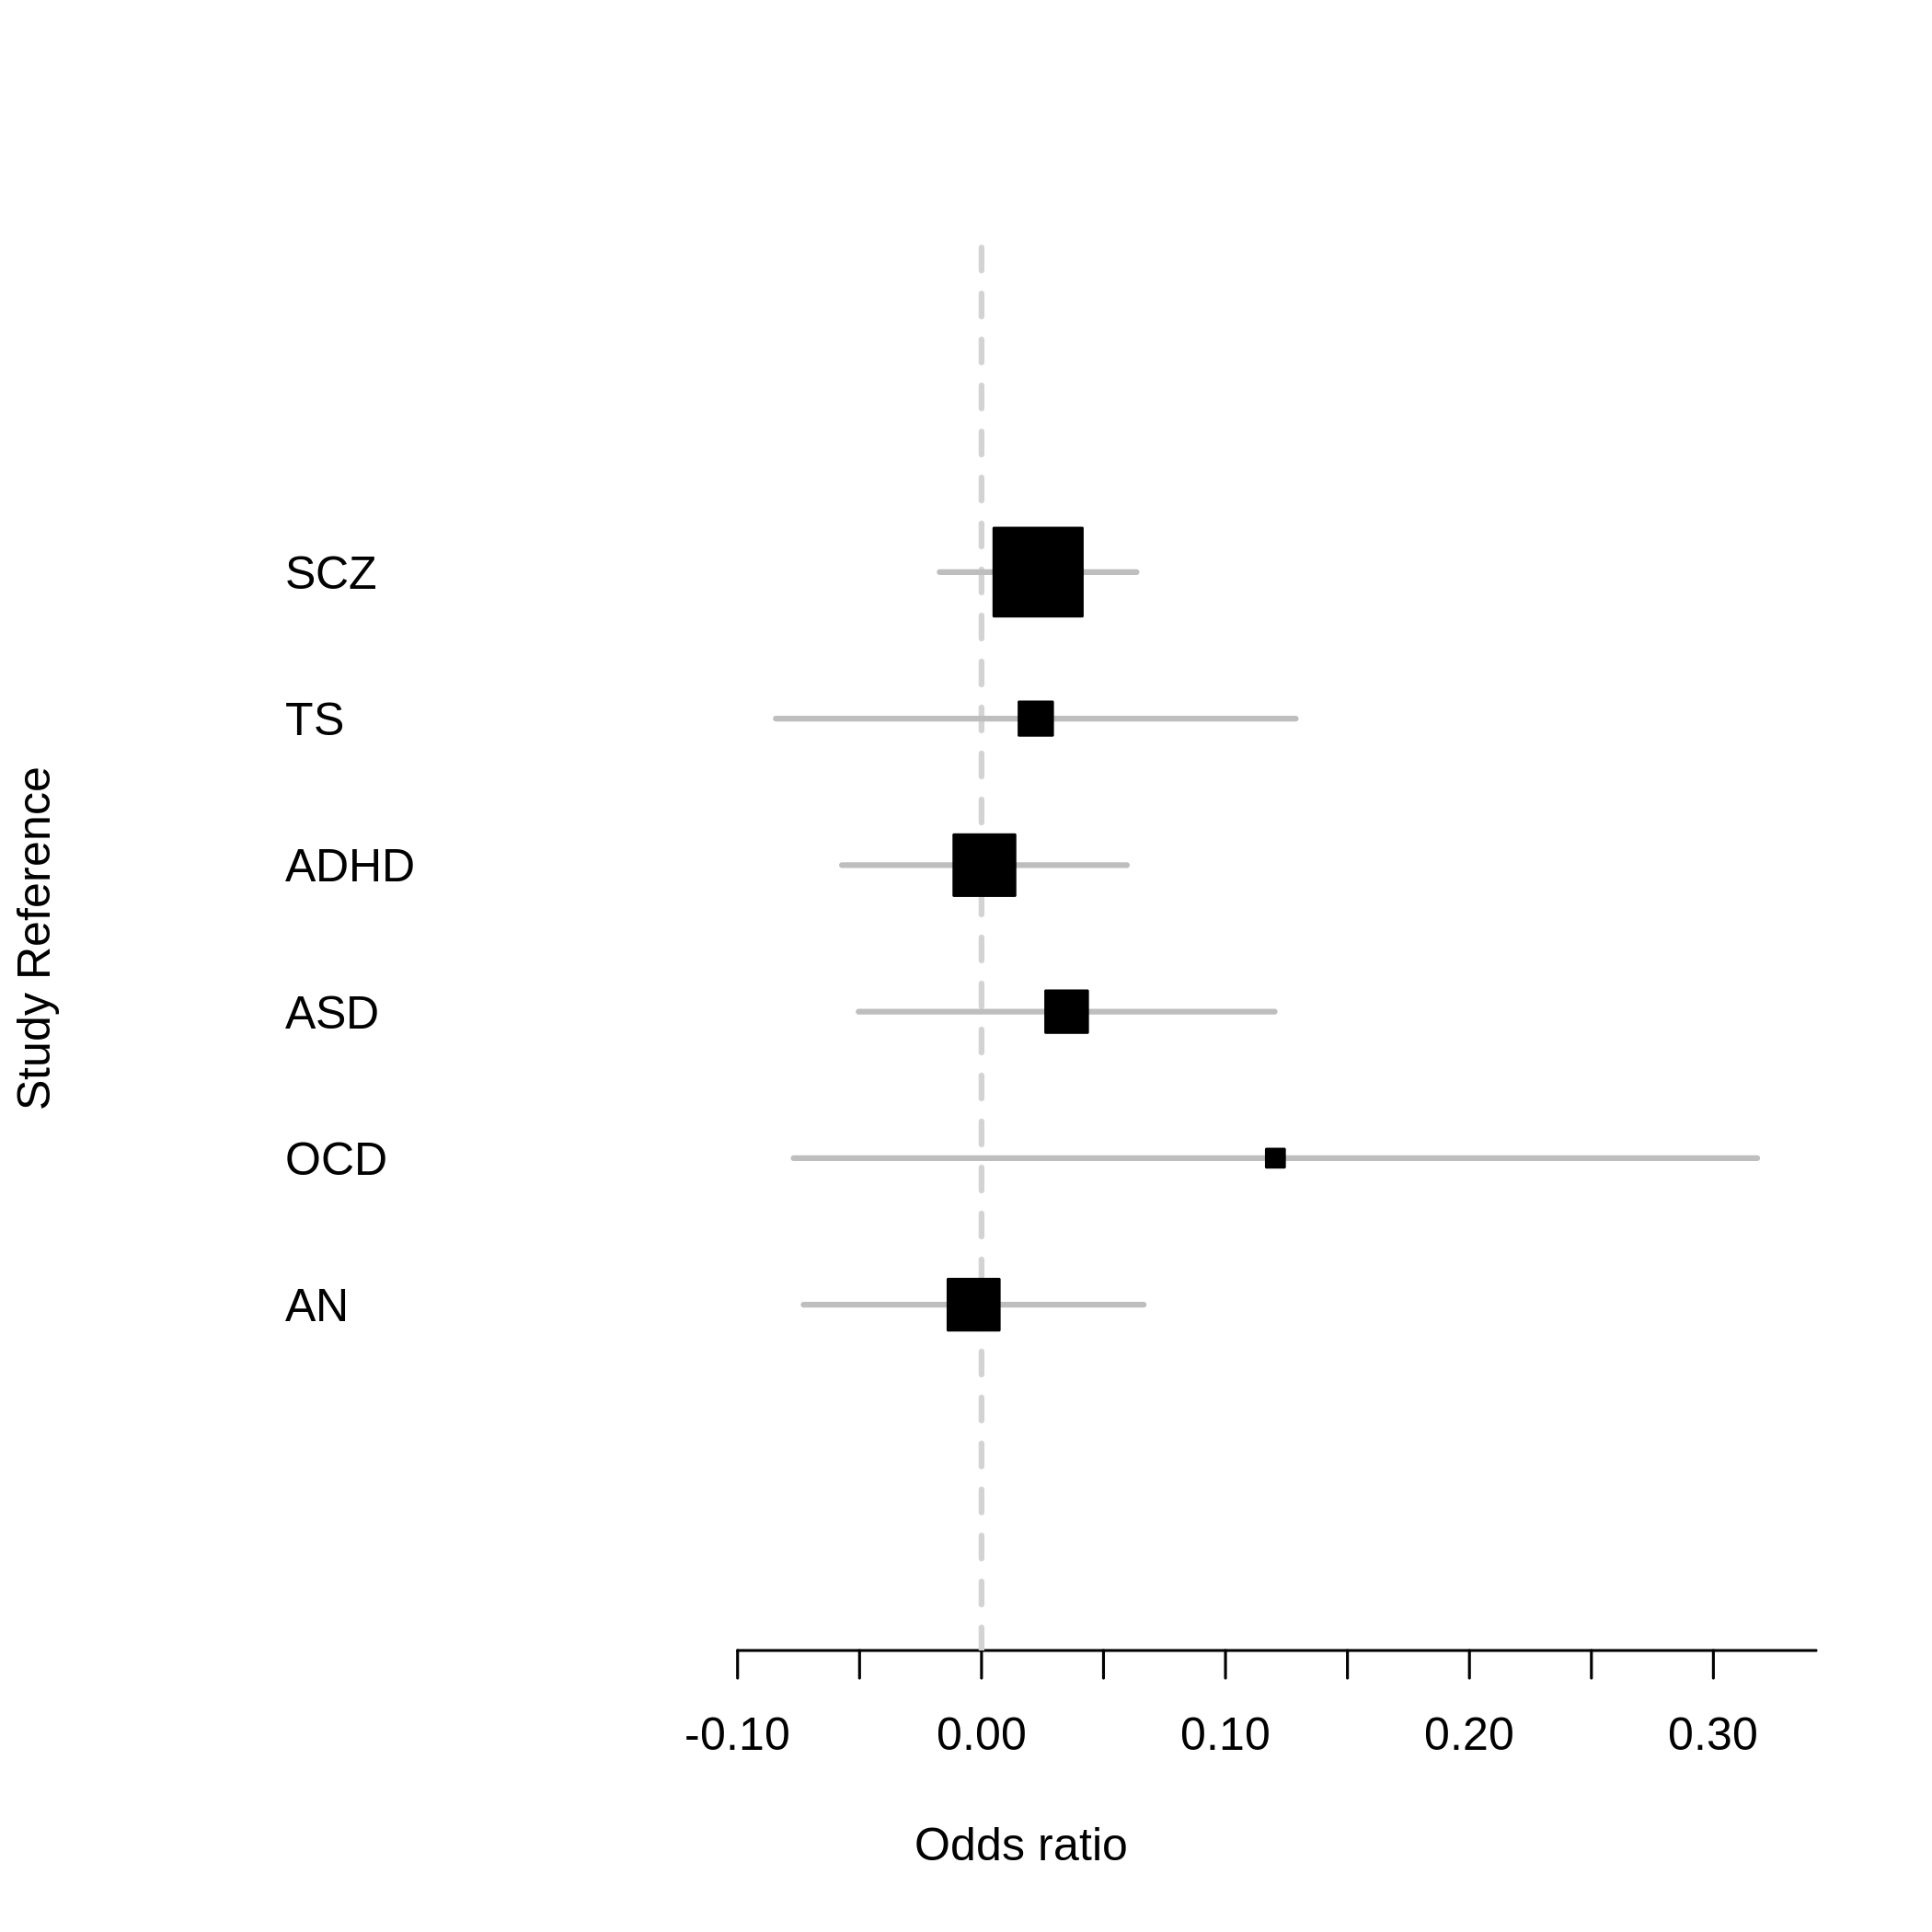

In [100]:
plot_meta_res(tau_struct$`Male-stratified neuropsychiatric`)

In [101]:
enrich_meta %>%
    select(-contains("Q")) %>%
    left_join(tau_meta %>% select(-contains("Q")),c("Group","Category")) %>%
    filter(
        !(grepl("male",Group) & !grepl("Male|Female",Category)),
        !(grepl("_male",Group) & grepl("Female",Category)),
        !(grepl("female",Group) & grepl("Male",Category))
    ) %>%
    mutate(Group = str_to_title(Group)) %>%
    write_csv(here("data","meta_analysis_maxCPP.csv"))